In [4]:
%run "C:/Users/ASUS/Desktop/DATA SCIENCE APU/BigData/Assignment 1/DictCatFinal.py"

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import DictCatFinal as dc
import numpy as np

In [6]:
#importing dataset
df = pd.read_csv('predict-student-dropout.csv')
df.head(10)

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   
5               2                39                  1    9991   
6               1                 1                  1    9500   
7               1                18                  4    9254   
8               1                 1                  3    9238   
9               1                 1                  1    9238   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   
5                             0                      19   
6                             1                       1   
7                             1                       1   
8                             1                       1   
9                             1                       1   

   Previous qualification (grade)  Nacionality  Mother qualification  \
0                           122.0            1                    19   
1                           160.0            1                     1   
2                           122.0            1                    37   
3                           122.0            1                    38   
4                           100.0            1                    37   
5                           133.1            1                    37   
6                           142.0            1                    19   
7                           119.0            1                    37   
8                           137.0           62                     1   
9                           138.0            1                     1   

   Father qualification  ...  Curricular units 2nd sem (credited)  \
0                    12  ...                                    0   
1                     3  ...                                    0   
2                    37  ...                                    0   
3                    37  ...                                    0   
4                    38  ...                                    0   
5                    37  ...                                    0   
6                    38  ...                                    0   
7                    37  ...                                    0   
8                     1  ...                                    0   
9                    19  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   
5                                    5   
6                                    8   
7                                    5   
8                                    6   
9                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   
5                                      17   
6                                       8   
7                                       5   
8                                       7   
9                                      14   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0

In [7]:
#brief summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother qualification                            4424 non-null   int64  
 9   Father qualification                     

In [8]:
null_counts = df.isnull().sum()
null_counts

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother qualification                              0
Father qualification                              0
Mother occupation                                 0
Father occupation                                 0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [9]:
#make list of categorical variables and its mapping
catVar = ['Marital status',
          'Application mode',
          'Application order',
          'Course',
          'Daytime/evening attendance\t',
          'Previous qualification',
          'Nacionality',
          'Mother qualification',
          'Father qualification',
          'Mother occupation',
          'Father occupation',
          'Displaced', 
          'Educational special needs',
          'Debtor',
          'Tuition fees up to date',
          'Gender', 
          'Scholarship holder',
          'International',
          'Target']
catVarMap = {
    'Marital status': dc.dictMarital,
    'Application mode': dc.dictAppMode,
    'Application order': dc.dictAppOrder,
    'Course': dc.dictCourse,
    'Daytime/evening attendance\t': dc.dictAtt,
    'Previous qualification': dc.dictQualification,
    'Nacionality': dc.dictNac,
    'Mother qualification': dc.dictQualification,
    'Father qualification': dc.dictQualification,
    'Mother occupation': dc.dictOcu,
    'Father occupation': dc.dictOcu,
    'Displaced': dc.dictYN,
    'Educational special needs': dc.dictYN,
    'Debtor': dc.dictYN,
    'Tuition fees up to date': dc.dictYN,
    'Gender': dc.dictGender,
    'Scholarship holder':dc.dictYN,
    'International':dc.dictYN
}
catVarMapNew = {
    'Marital status': dc.dictMarital,
    'Application mode': dc.dictAppMode,
    'Application order': dc.dictAppOrder,
    'Course': dc.dictCourse,
    'Daytime/evening attendance\t': dc.dictAtt,
    'Previous qualification': dc.dictQualificationNew,
    'Nacionality': dc.dictNacNew,
    'Mother qualification': dc.dictQualificationNew,
    'Father qualification': dc.dictQualificationNew,
    'Mother occupation': dc.dictOcuNew,
    'Father occupation': dc.dictOcuNew,
    'Displaced': dc.dictYN,
    'Educational special needs': dc.dictYN,
    'Debtor': dc.dictYN,
    'Tuition fees up to date': dc.dictYN,
    'Gender': dc.dictGender,
    'Scholarship holder':dc.dictYN,
    'International':dc.dictYN
}

#make list of continous variables
contVar = [i for i in df.columns if i not in catVar]

1. Exploratory Data Analysis

In [10]:
#create copy of df with only categorical variable and inputted label
dfLabel = df[catVar].copy()

for col in catVar:
    if col in catVarMap:
        dfLabel[col] = dfLabel[col].map(catVarMap[col])
dfLabel.head()

Marital status                  Application mode Application order  \
0         single    2nd phase - general contingent      sixth choice   
1         single  International student (bachelor)     second choice   
2         single    1st phase - general contingent      sixth choice   
3         single    2nd phase - general contingent      third choice   
4        married                 Over 23 years old     second choice   

                                Course Daytime/evening attendance\t  \
0      Animation and Multimedia Design                      daytime   
1                              Tourism                      daytime   
2                 Communication Design                      daytime   
3         Journalism and Communication                      daytime   
4  Social Service (evening attendance)                      evening   

                              Previous qualification Nacionality  \
0  Secondary Education - 12th Year of Schooling o...  Portuguese   
1  Secondary Education - 12th Year of Schooling o...  Portuguese   
2  Secondary Education - 12th Year of Schooling o...  Portuguese   
3  Secondary Education - 12th Year of Schooling o...  Portuguese   
4  Secondary Education - 12th Year of Schooling o...  Portuguese   

                                Mother qualification  \
0  Basic Education 3rd Cycle (9th/10th/11th Year)...   
1  Secondary Education - 12th Year of Schooling o...   
2  Basic Education 1st Cycle (4th/5th Year) or Eq...   
3  Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4  Basic Education 1st Cycle (4th/5th Year) or Eq...   

                                Father qualification  \
0                     Other - 11th Year of Schooling   
1                          Higher Education - Degree   
2  Basic Education 1st Cycle (4th/5th Year) or Eq...   
3  Basic Education 1st Cycle (4th/5th Year) or Eq...   
4  Basic Education 2nd Cycle (6th/7th/8th Year) o...   

                                   Mother occupation  \
0  Personal Services, Security and Safety Workers...   
1     Intermediate Level Technicians and Professions   
2                                  Unskilled Workers   
3  Personal Services, Security and Safety Workers...   
4                                  Unskilled Workers   

                                Father occupation Displaced  \
0                               Unskilled Workers       Yes   
1  Intermediate Level Technicians and Professions       Yes   
2                               Unskilled Workers       Yes   
3  Intermediate Level Technicians and Professions       Yes   
4                               Unskilled Workers        No   

  Educational special needs Debtor Tuition fees up to date  Gender  \
0                        No     No                     Yes    Male   
1                        No     No                      No    Male   
2                        No     No                      No    Male   
3                        No     No                     Yes  Female   
4                        No     No                     Yes  Female   

  Scholarship holder International    Target  
0                 No            No   Dropout  
1                 No            No  Graduate  
2                 No            No   Dropout  
3                 No            No  Graduate  
4                 No            No  Graduate

In [11]:
#print the unique value on each categorical columns
for col in dfLabel.columns:
    unique_values = dfLabel[col].unique()
    print(f"Unique values in {col}:\n{unique_values}\n")
    print(" ")

Unique values in Marital status:
['single' 'married' 'divorced' 'widower' 'facto union' 'legally separated']

 
Unique values in Application mode:
['2nd phase - general contingent' 'International student (bachelor)'
 '1st phase - general contingent' 'Over 23 years old'
 '3rd phase - general contingent' 'Short cycle diploma holders'
 'Technological specialization diploma holders'
 'Change of institution/course' 'Change of course'
 'Holders of other higher courses' 'Transfer'
 '1st phase - special contingent (Madeira Island)'
 '1st phase - special contingent (Azores Island)' 'Ordinance No. 612/93'
 'Ordinance No. 854-B/99' 'Change of institution/course (International)'
 'Ordinance No. 533-A/99, item b2) (Different Plan)'
 'Ordinance No. 533-A/99, item b3 (Other Institution)']

 
Unique values in Application order:
['sixth choice' 'second choice' 'third choice' 'fifth choice'
 'fourth choice' 'seventh choice' 'last choice' 'first choice']

 
Unique values in Course:
['Animation and Multim

1.1 Categorical Variables

In [12]:
#variables that may need modification
catVarMod = ['Previous qualification',
             'Nacionality', 'Mother qualification', 'Father qualification',
             'Mother occupation', 'Father occupation']

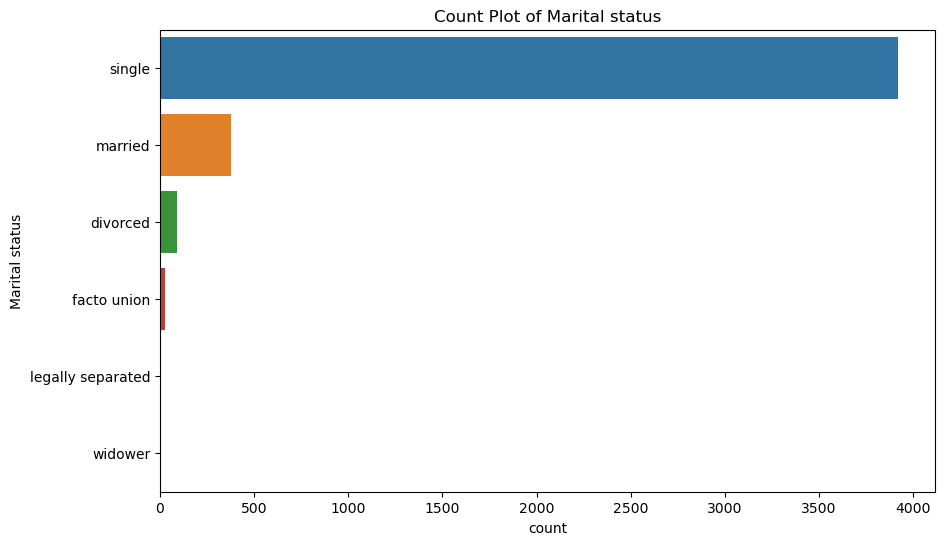

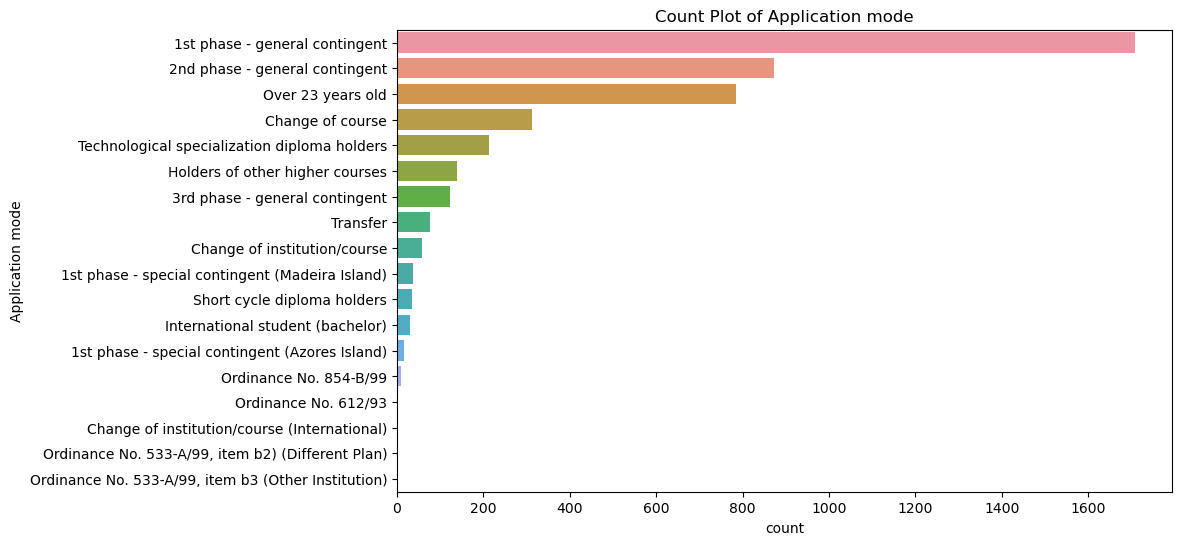

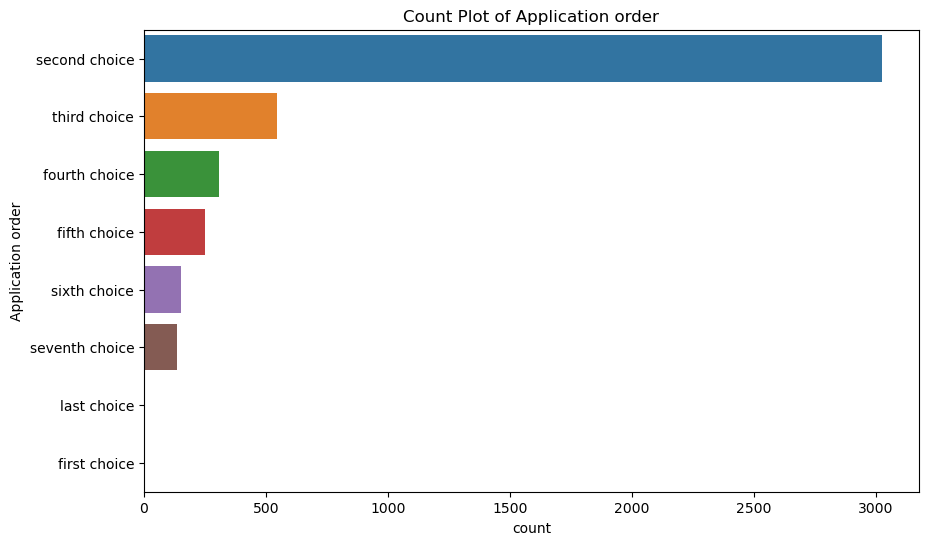

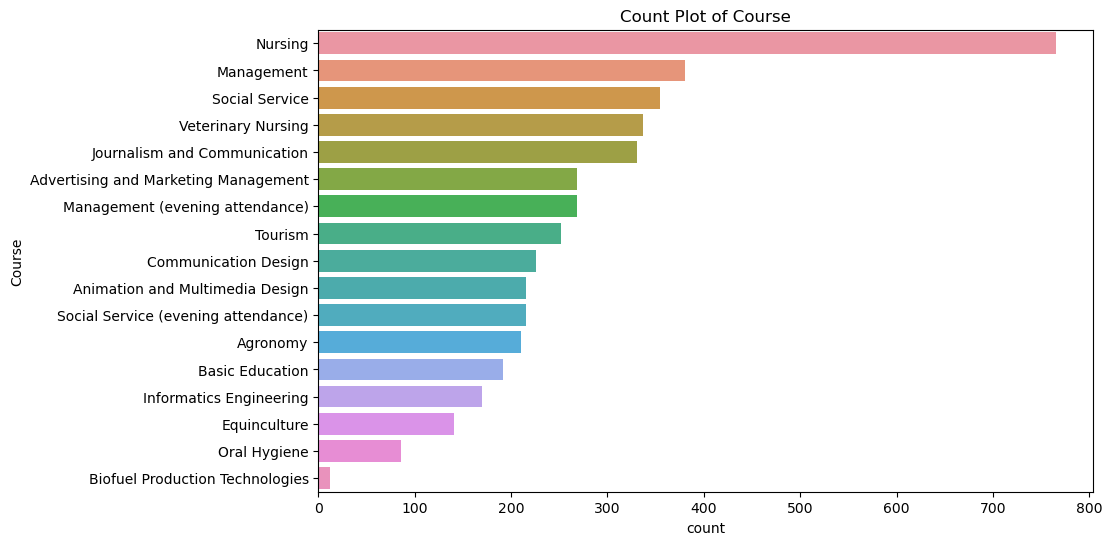

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


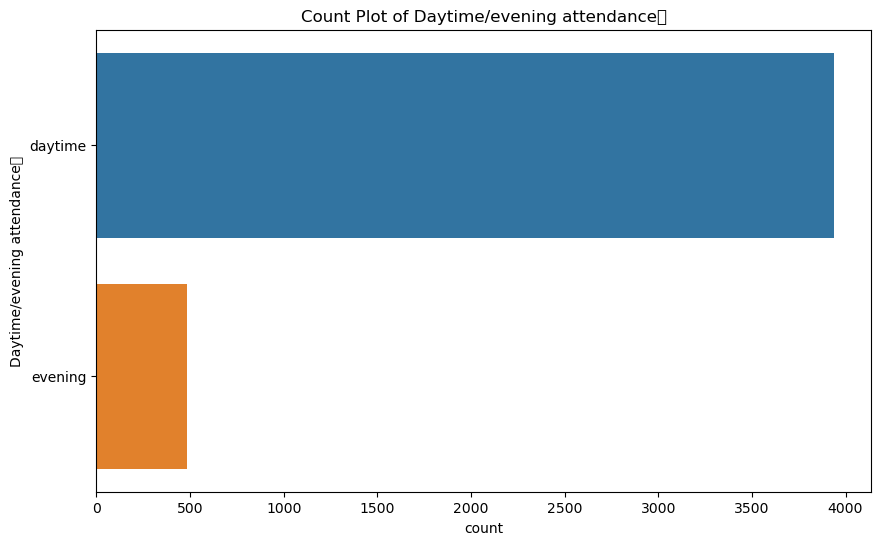

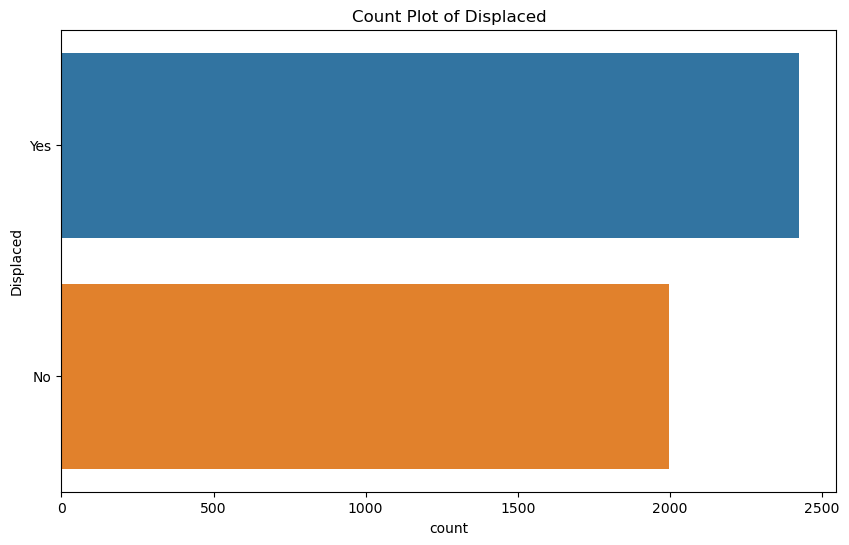

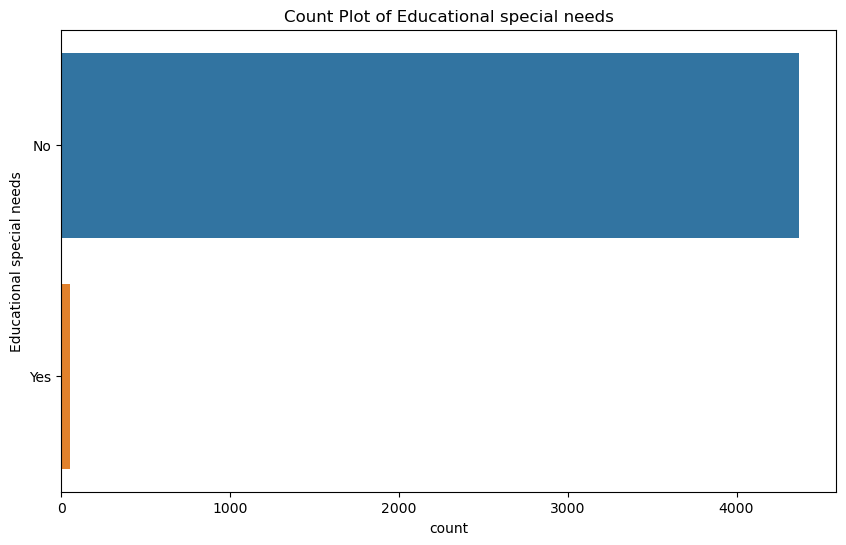

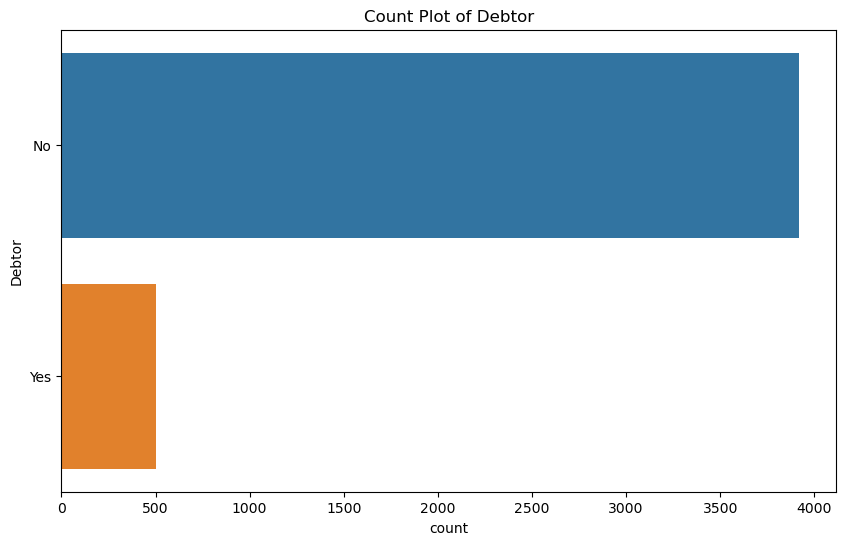

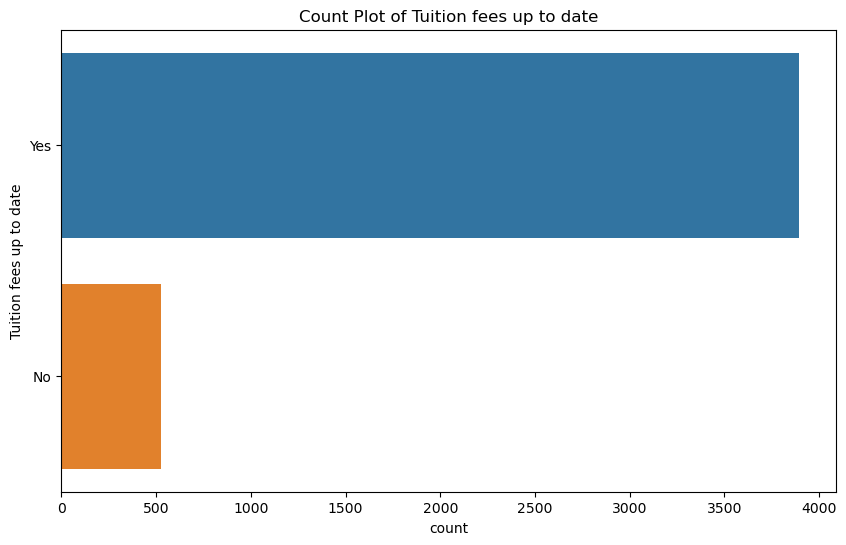

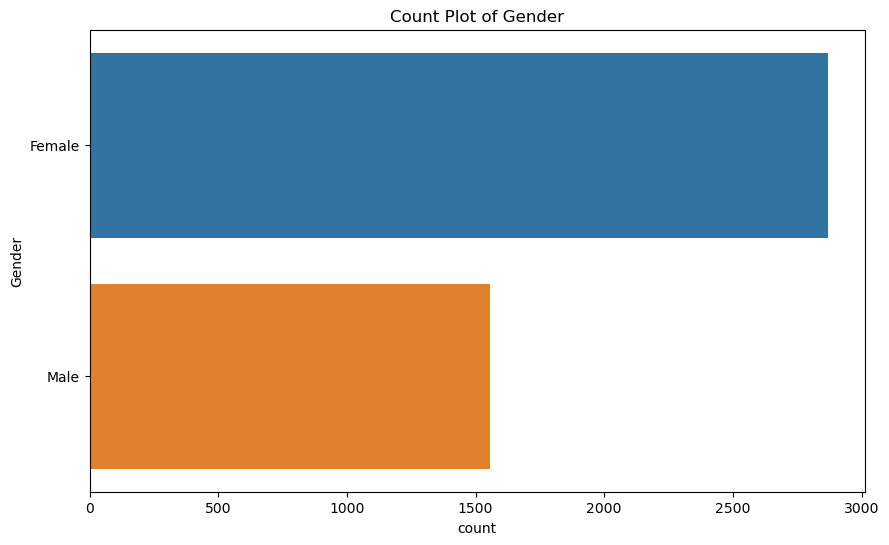

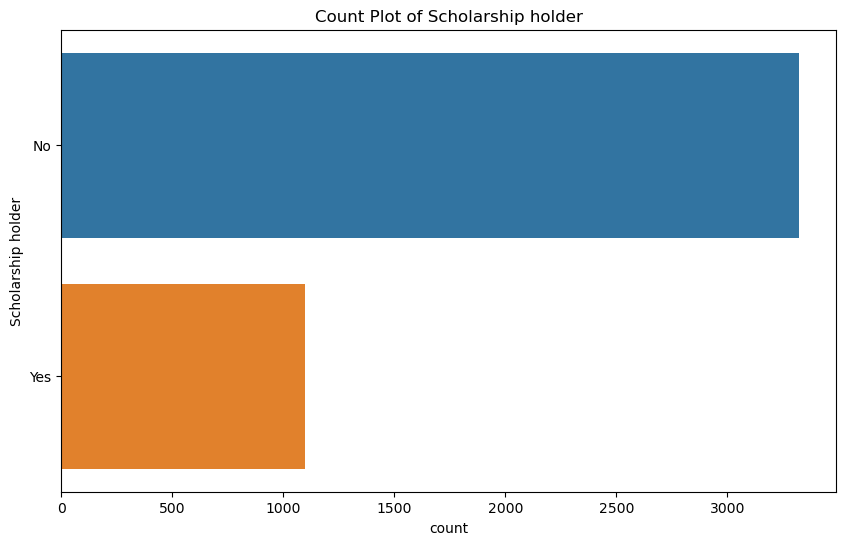

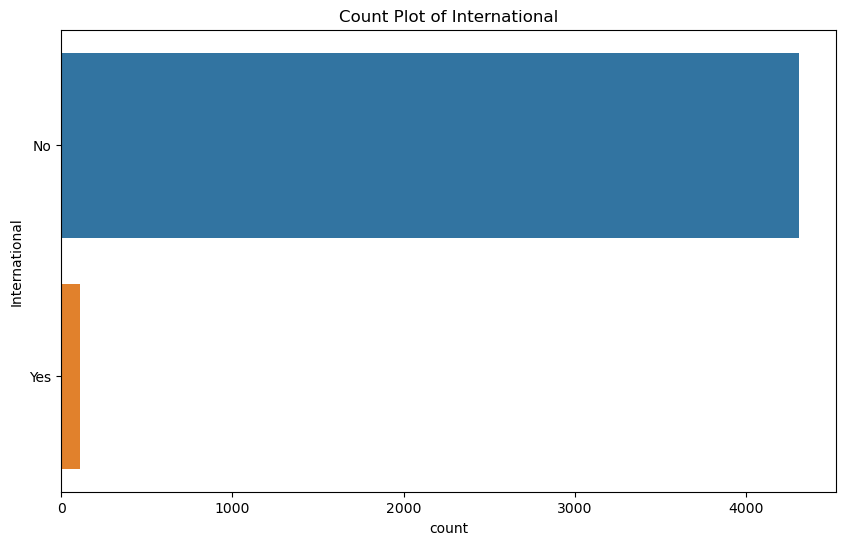

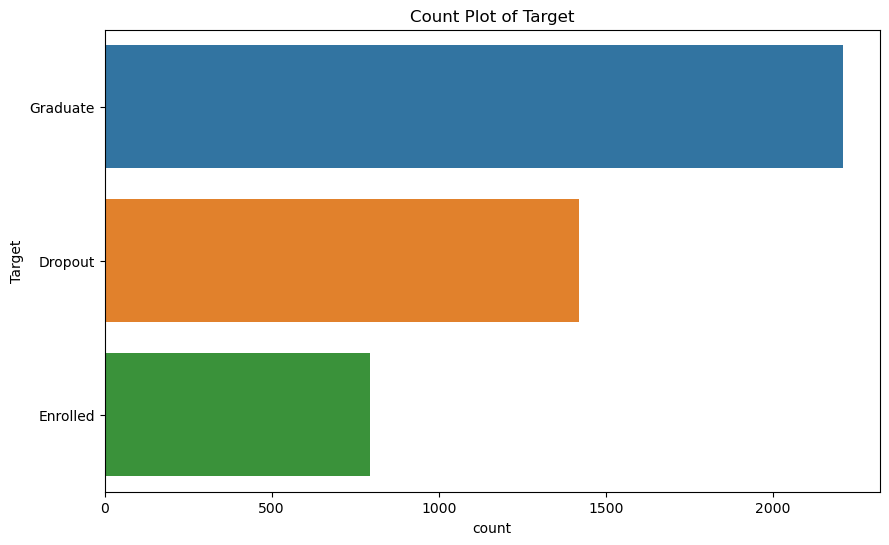

In [13]:
#accepted variables
for cat_column in catVar:
    if cat_column not in catVarMod:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=dfLabel, y=cat_column, order=dfLabel[cat_column].value_counts().index)
        plt.xticks(rotation=0)
        plt.title(f"Count Plot of {cat_column}")
        plt.show()

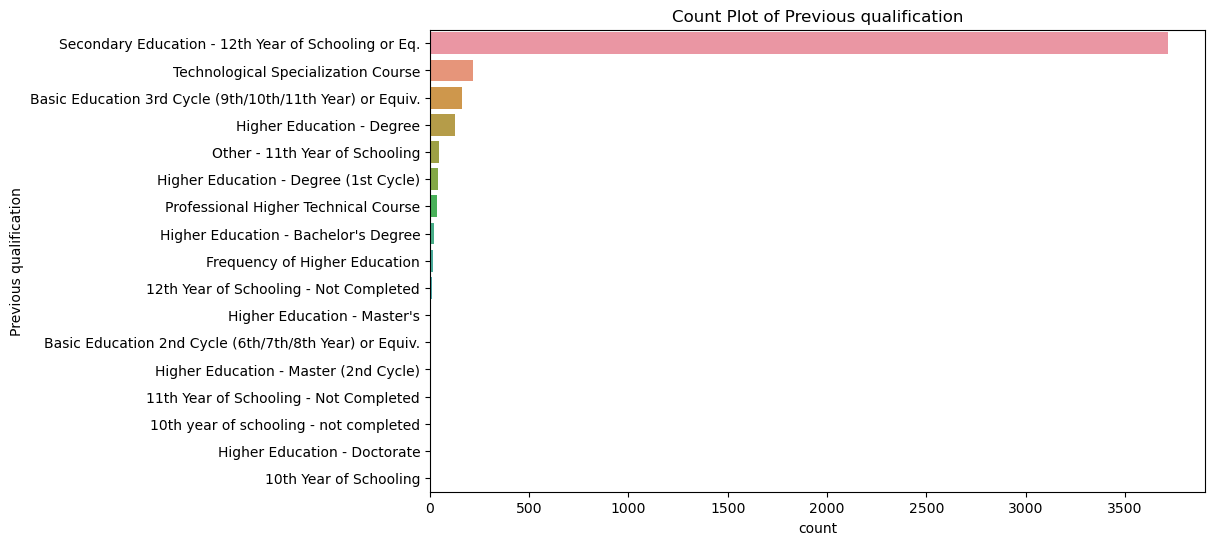

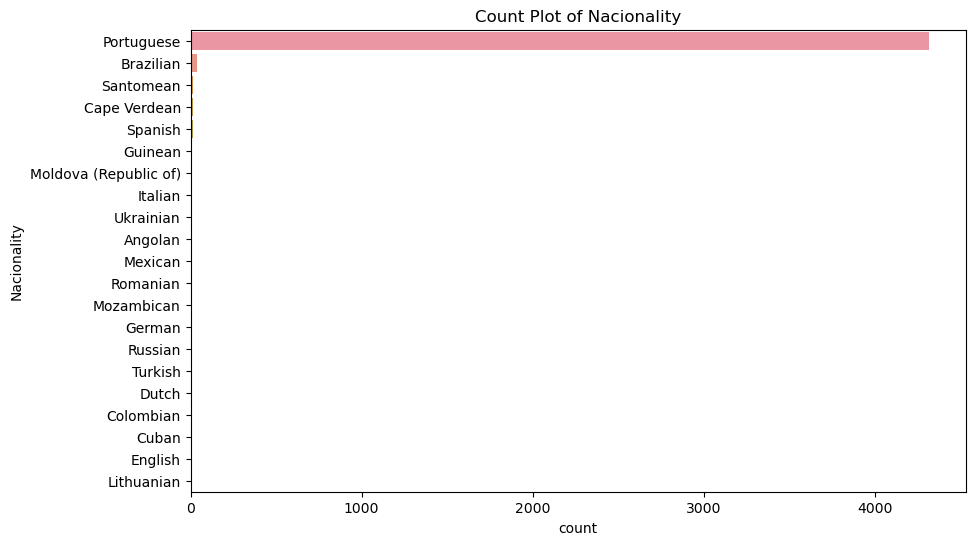

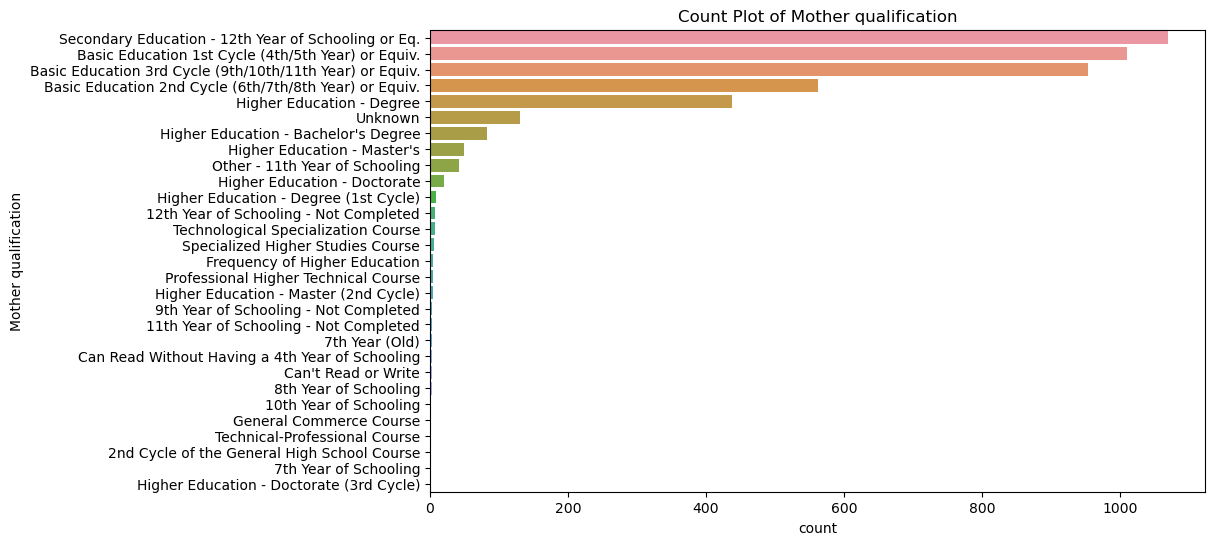

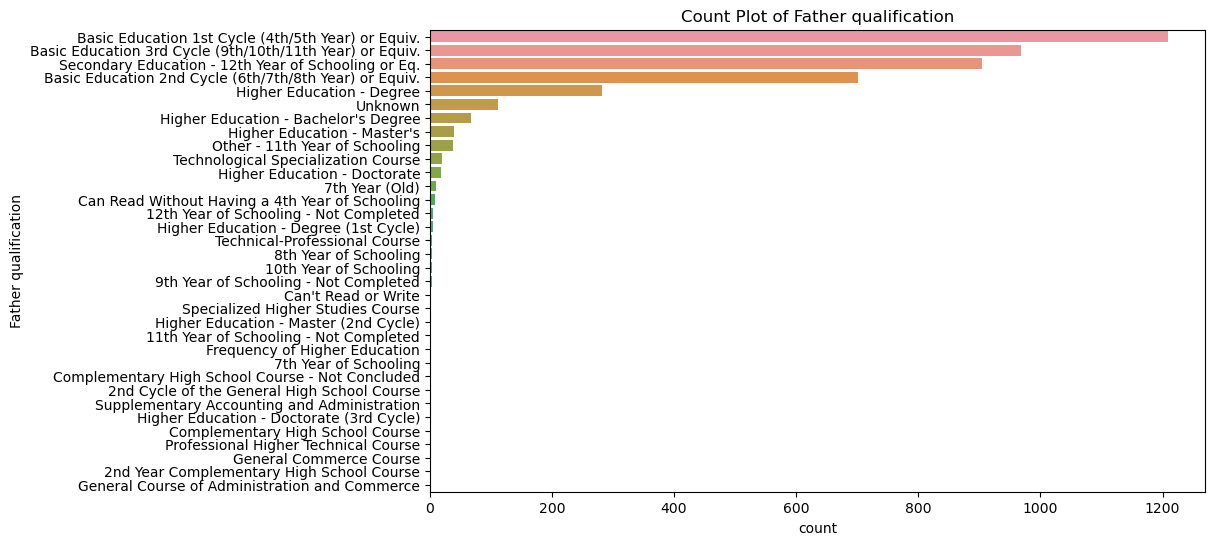

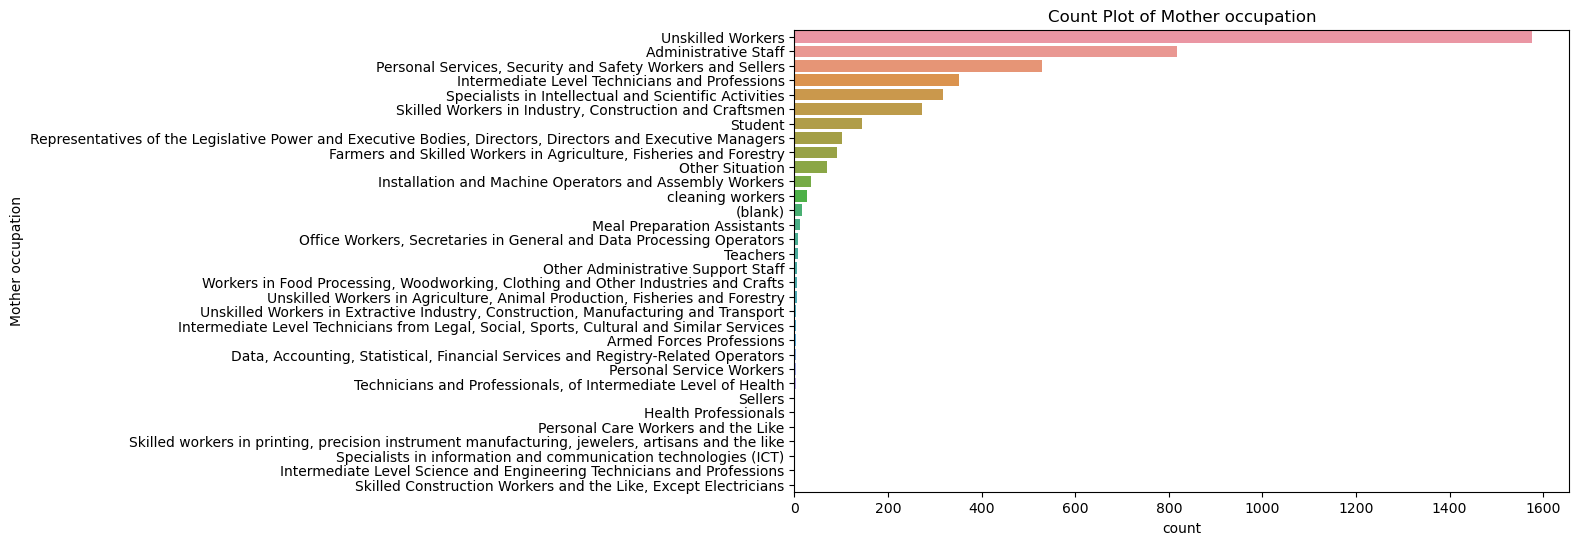

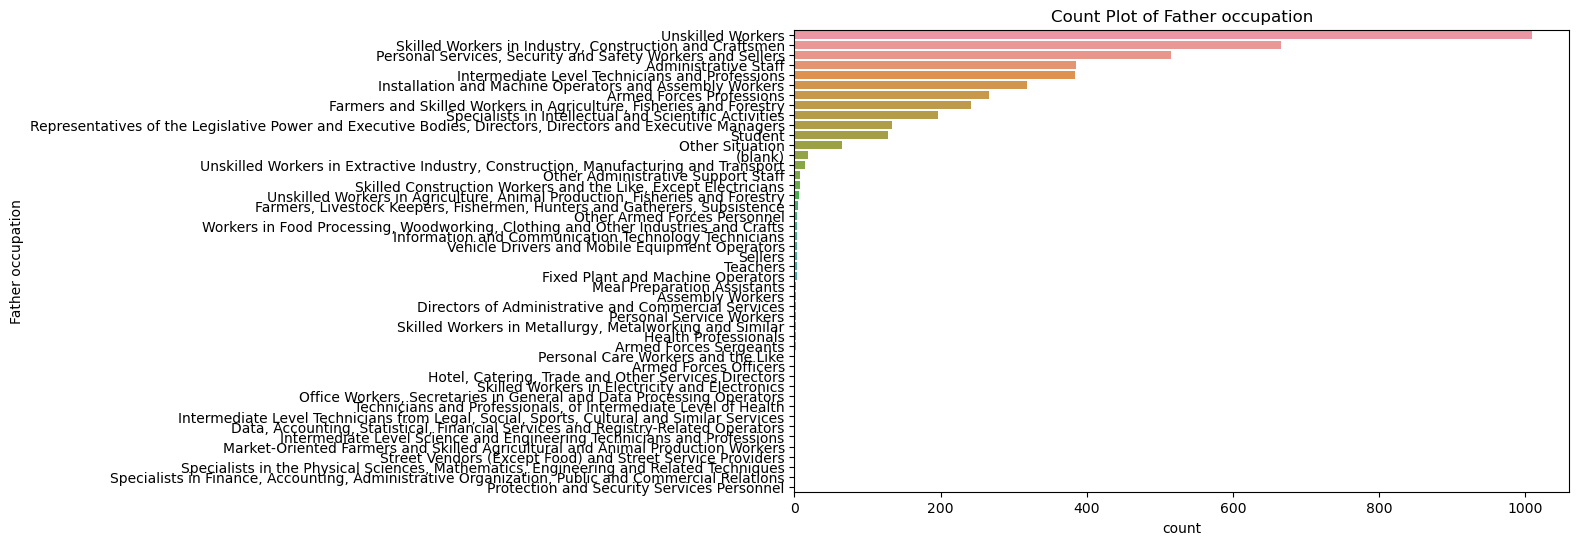

In [14]:
for cat_column in catVarMod:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dfLabel, y=cat_column, order=dfLabel[cat_column].value_counts().index)
    plt.xticks(rotation=0)
    plt.title(f"Count Plot of {cat_column}")
    plt.show()

Mapping New Value

In [15]:
def valueMapper(mapping, values):
    final_list = []
    
    for value in values:
        category = -1  # Default category if not found
        for key, mapped_values in mapping.items():
            if value in mapped_values:
                category = key
                break
        final_list.append(category)
    return final_list

In [16]:
motherOcu = list(df['Mother occupation'])
motherOcuMapped = valueMapper(dc.dictOcuMapper,motherOcu)
fatherOcu = list(df['Father occupation'])
fatherOcuMapped = valueMapper(dc.dictOcuMapper,fatherOcu)
nac = list(df['Nacionality'])
nacMapped = valueMapper(dc.dictNacMapper,nac)
motherQua = list(df['Mother qualification'])
motherQuaMapped = valueMapper(dc.dictQualificationMapper,motherQua)
fatherQua = list(df['Father qualification'])
fatherQuaMapped = valueMapper(dc.dictQualificationMapper,fatherQua)
prevQua = list(df['Previous qualification'])
prevQuaMapped = valueMapper(dc.dictQualificationMapper,prevQua)

In [17]:
#create new dataframe with mapped value
dfMapped = df.copy()
dfMapped['Mother occupation'] = motherOcuMapped
dfMapped['Father occupation'] = fatherOcuMapped
dfMapped['Nacionality'] = nacMapped
dfMapped['Mother qualification'] = motherQuaMapped
dfMapped['Father qualification'] = fatherQuaMapped
dfMapped['Previous qualification'] = prevQuaMapped

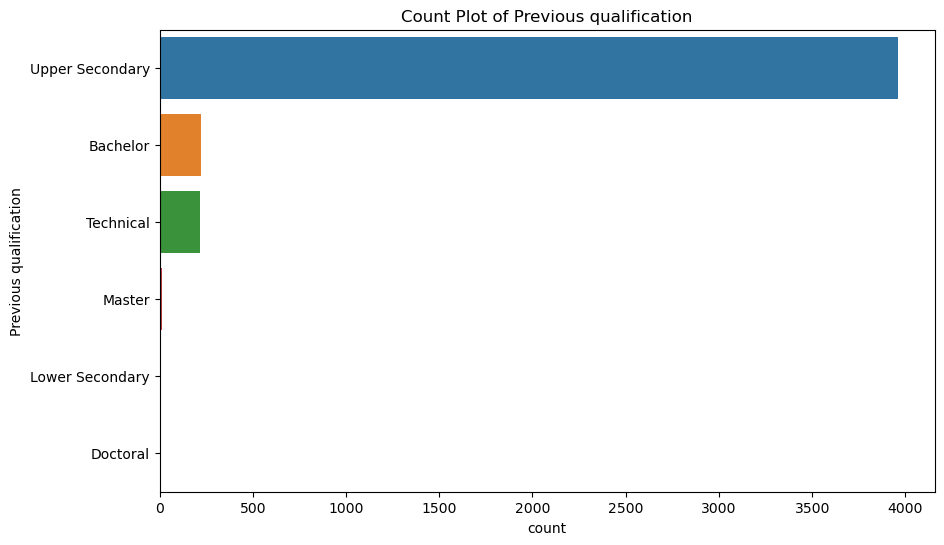

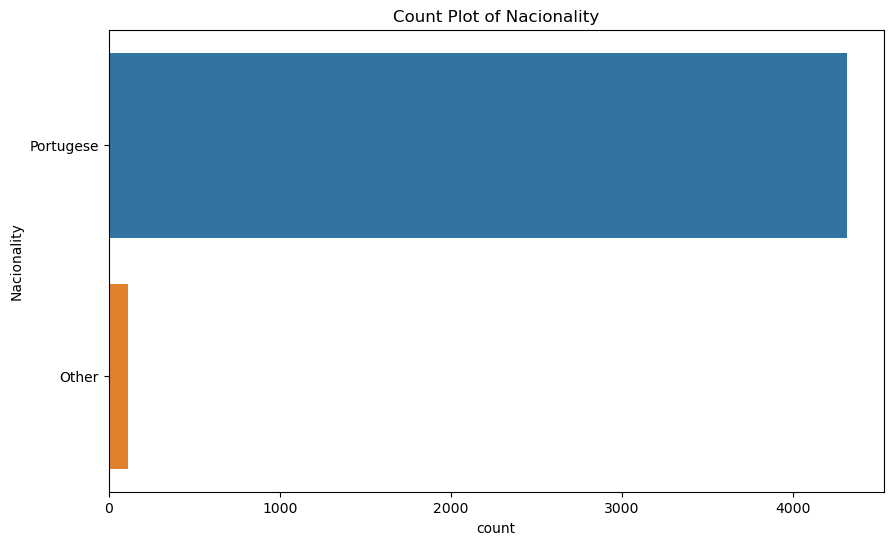

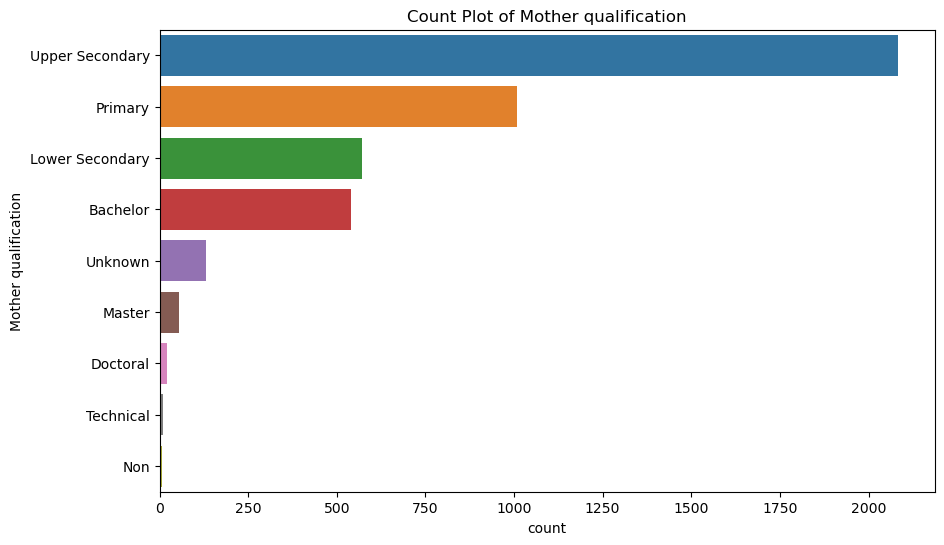

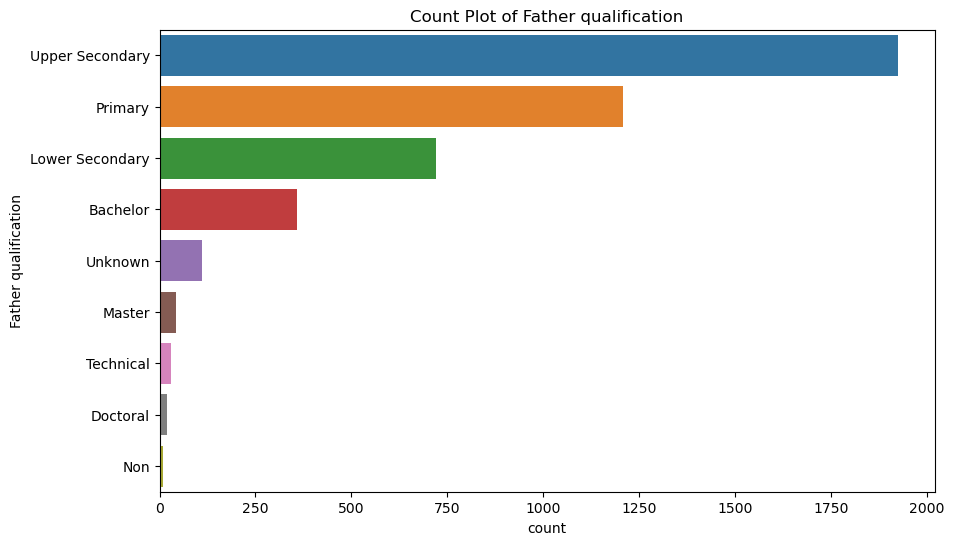

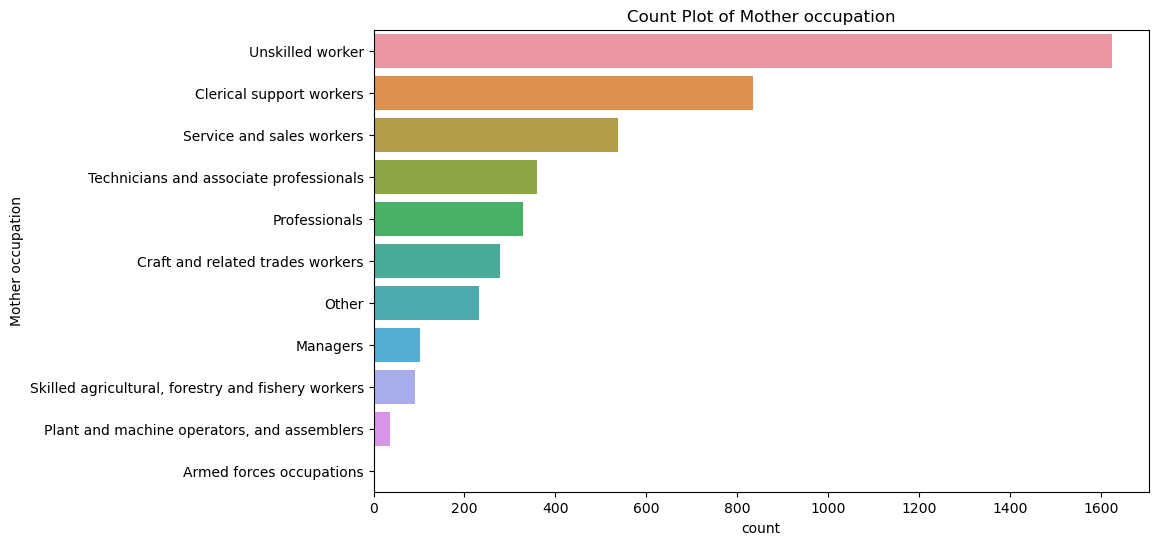

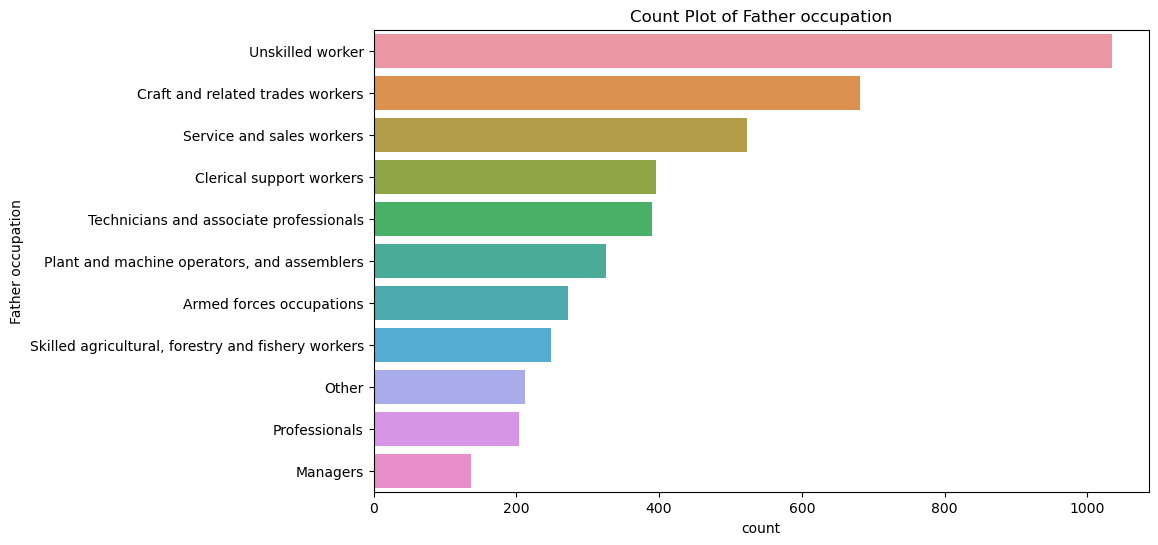

In [18]:
#visualize new mapped categories
dfMappedLabel = dfMapped[catVar].copy()
for col in catVar:
    if col in catVarMapNew:
        dfMappedLabel[col] = dfMappedLabel[col].map(catVarMapNew[col])
dfMappedLabel.head()


for cat_column in catVarMod:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dfMappedLabel, y=cat_column, order=dfMappedLabel[cat_column].value_counts().index)
    plt.xticks(rotation=0)
    plt.title(f"Count Plot of {cat_column}")
    plt.show()

1.2 Numerical Variables

In [19]:
numVar = [col for col in dfMapped.columns if col not in catVar]
dfNum = dfMapped[numVar]

In [20]:
dfNum

Previous qualification (grade)  Admission grade  Age at enrollment  \
0                              122.0            127.3                 20   
1                              160.0            142.5                 19   
2                              122.0            124.8                 19   
3                              122.0            119.6                 20   
4                              100.0            141.5                 45   
...                              ...              ...                ...   
4419                           125.0            122.2                 19   
4420                           120.0            119.0                 18   
4421                           154.0            149.5                 30   
4422                           180.0            153.8                 20   
4423                           152.0            152.0                 22   

      Curricular units 1st sem (credited)  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
4419                                    0   
4420                                    0   
4421                                    0   
4422                                    0   
4423                                    0   

      Curricular units 1st sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    7   
4422                                    5   
4423                                    6   

      Curricular units 1st sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                          8   
4                                          9   
...                                      ...   
4419                                       7   
4420                                       6   
4421                                       8   
4422                                       5   
4423                                       8   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                       0                          0.000000   
1                                       6                         14.000000   
2                                       0                          0.000000   
3                                       6                         13.428571   
4                                       5                         12.333333   
...                                   ...                               ...   
4419                                    5                         13.600000   
4420                                    6                         12.000000   
4421                                    7                         14.912500   
4422                                    5                         13.800000   
4423                                    6                         11.666667   

      Curricular units 1st sem (without evaluations)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
4419                                               0   
4420                                 

In [21]:
dfNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Previous qualification (grade)                  4424 non-null   float64
 1   Admission grade                                 4424 non-null   float64
 2   Age at enrollment                               4424 non-null   int64  
 3   Curricular units 1st sem (credited)             4424 non-null   int64  
 4   Curricular units 1st sem (enrolled)             4424 non-null   int64  
 5   Curricular units 1st sem (evaluations)          4424 non-null   int64  
 6   Curricular units 1st sem (approved)             4424 non-null   int64  
 7   Curricular units 1st sem (grade)                4424 non-null   float64
 8   Curricular units 1st sem (without evaluations)  4424 non-null   int64  
 9   Curricular units 2nd sem (credited)      

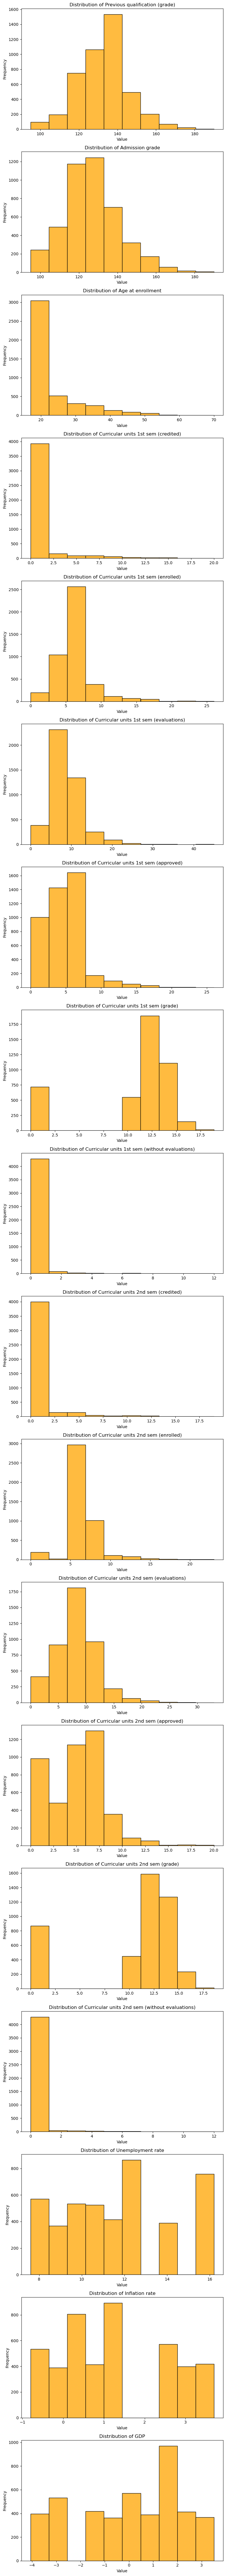

In [22]:
# Get the list of numerical column names
numerical_columns = numVar  # Assuming numVar contains your numerical column names

# Set up subplots
num_plots = len(numerical_columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 5 * num_plots))

# Create distributions for each numerical column using Seaborn without KDE
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(data=dfNum, x=col, bins=10, kde=False, color='orange', edgecolor='black', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

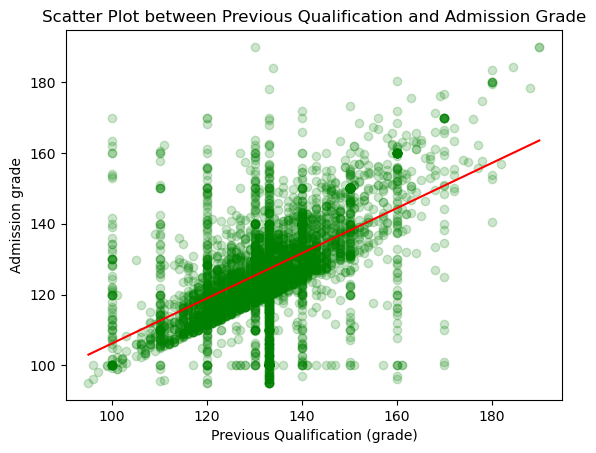

In [23]:
# Scatter plot between 'Previous qualification (grade)' and 'Admission grade'
plt.scatter(dfNum['Previous qualification (grade)'], dfNum['Admission grade'], color='green', alpha=0.2)
plt.title('Scatter Plot between Previous Qualification and Admission Grade')
plt.xlabel('Previous Qualification (grade)')
plt.ylabel('Admission grade')

# Calculate regression line parameters
x = dfNum['Previous qualification (grade)']
y = dfNum['Admission grade']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(x), max(x), num=100)
plt.plot(x_range, polynomial(x_range), color='red')

plt.show()

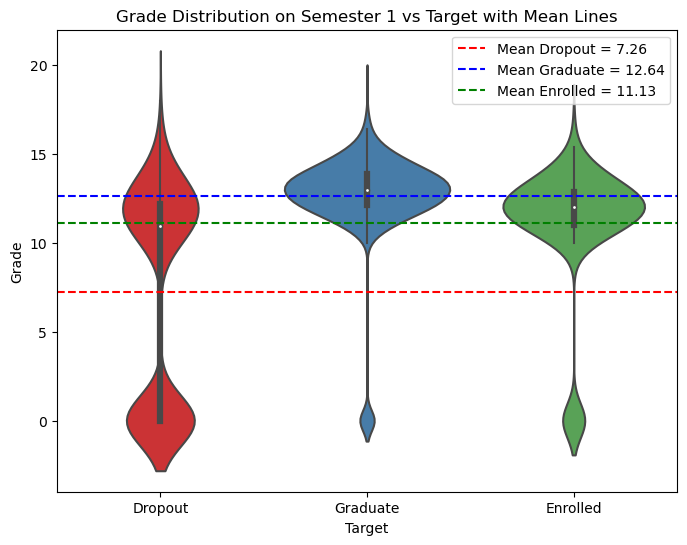

In [24]:
plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=dfMapped, x='Target', y='Curricular units 1st sem (grade)', palette='Set1')

# Calculate means
means = dfMapped.groupby('Target')['Curricular units 1st sem (grade)'].mean()

# Add horizontal mean lines with colors and labels
for i, target in enumerate(dfMapped['Target'].unique()):
    color = 'red' if target == 'Dropout' else 'blue' if target == 'Graduate' else 'green'
    ax.axhline(y=means[target], color=color, linestyle='--', label=f'Mean {target} = {means[target]:.2f}')

plt.title('Grade Distribution on Semester 1 vs Target with Mean Lines')
plt.xlabel('Target')
plt.ylabel('Grade')
plt.legend()
plt.show()


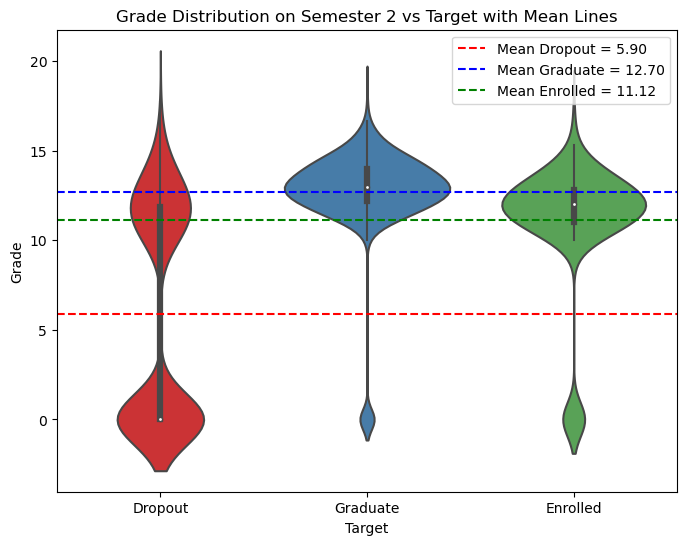

In [25]:
plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=dfMapped, x='Target', y='Curricular units 2nd sem (grade)', palette='Set1')

# Calculate means
means = dfMapped.groupby('Target')['Curricular units 2nd sem (grade)'].mean()

# Add horizontal mean lines with colors and labels
for i, target in enumerate(dfMapped['Target'].unique()):
    color = 'red' if target == 'Dropout' else 'blue' if target == 'Graduate' else 'green'
    ax.axhline(y=means[target], color=color, linestyle='--', label=f'Mean {target} = {means[target]:.2f}')

plt.title('Grade Distribution on Semester 2 vs Target with Mean Lines')
plt.xlabel('Target')
plt.ylabel('Grade')
plt.legend()
plt.show()

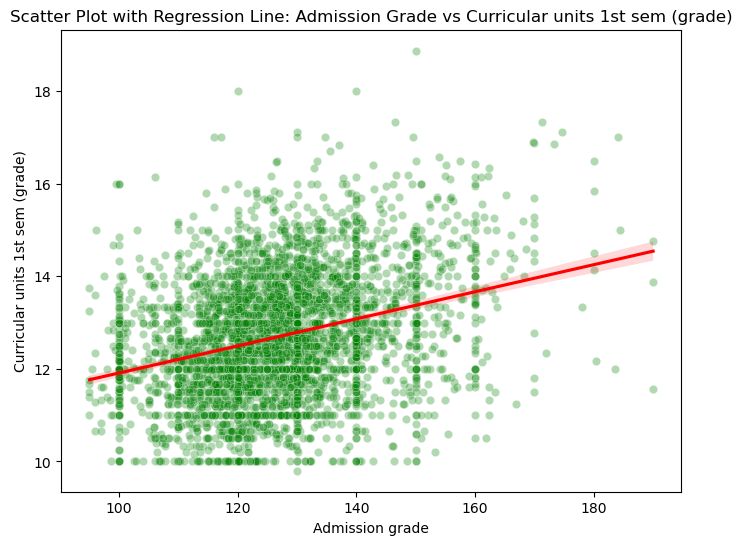

In [26]:
plt.figure(figsize=(8, 6))

# Filter the DataFrame to exclude rows with y=0
filtered_df = dfMapped[dfMapped['Curricular units 1st sem (grade)'] != 0]

sns.scatterplot(data=filtered_df, x='Admission grade', y='Curricular units 1st sem (grade)', alpha=0.3, color='green')
sns.regplot(data=filtered_df, x='Admission grade', y='Curricular units 1st sem (grade)', scatter=False, color='red')
plt.title('Scatter Plot with Regression Line: Admission Grade vs Curricular units 1st sem (grade)')
plt.xlabel('Admission grade')
plt.ylabel('Curricular units 1st sem (grade)')

plt.show()

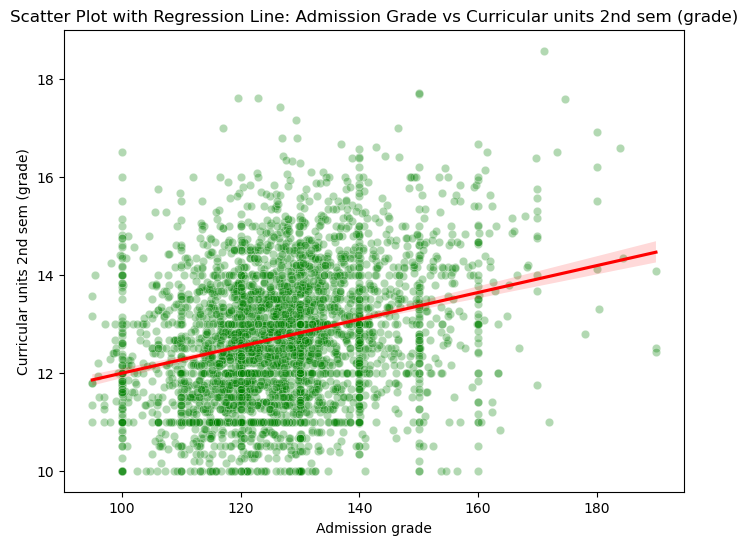

In [27]:
plt.figure(figsize=(8, 6))

# Filter the DataFrame to exclude rows with y=0
filtered_df = dfMapped[dfMapped['Curricular units 2nd sem (grade)'] != 0]

sns.scatterplot(data=filtered_df, x='Admission grade', y='Curricular units 2nd sem (grade)', alpha=0.3, color='green')
sns.regplot(data=filtered_df, x='Admission grade', y='Curricular units 2nd sem (grade)', scatter=False, color='red')
plt.title('Scatter Plot with Regression Line: Admission Grade vs Curricular units 2nd sem (grade)')
plt.xlabel('Admission grade')
plt.ylabel('Curricular units 2nd sem (grade)')

plt.show()

1.3 Map Target into Numerical Representation and Make copy for Balanced Dataset

In [28]:
from collections import Counter

dfFinal = dfMapped.copy()
# Mapping dictionary
target_mapping = {'Dropout': 0, 'Enrolled': 2, 'Graduate': 1}

# Replace the values in the 'Target' column using the mapping dictionary
dfFinal['Target'] = dfFinal['Target'].replace(target_mapping)

In [29]:
#Scaling numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfFinal[numVar])

dfFinal[numVar] = scaled_data

In [30]:
#Feature and Target variables
X = dfFinal.drop(['Target'], axis=1)
y = dfFinal['Target']
print(f'Class distribution before SMOTE: {Counter(y)}')

Class distribution before SMOTE: Counter({1: 2209, 0: 1421, 2: 794})


In [31]:
#SMOTENC for balancing dataset
from imblearn.over_sampling import SMOTENC

categorical_feature_indices = [dfFinal.columns.get_loc(col) for col in dfFinal[catVar].columns][:-1]
categorical_feature_indices

smote_nc = SMOTENC(sampling_strategy='auto', categorical_features=categorical_feature_indices, random_state=123)

XBal, yBal = smote_nc.fit_resample(X, y)
print(f'Class distribution after SMOTE: {Counter(yBal)}')

Class distribution after SMOTE: Counter({0: 2209, 1: 2209, 2: 2209})


2 Model Building

2.1 Train-Test split (not needed if used k-fold)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)

print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (3539, 36)
y_train shape (3539,)
X_test shape (885, 36)
y_test shape (885,)


In [33]:
XBal_train, XBal_test, yBal_train, yBal_test = train_test_split(XBal, yBal, test_size=0.2, random_state=123)


2.2 Random Forest Classfier

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [184]:
# Create a Random Forest model
randFor = RandomForestClassifier(random_state=123)

# Define hyperparameters to search over
param_grid = {
    'n_estimators': [145,150,160],
    'max_depth': [None,10,20],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1,2]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=randFor, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to your data
grid_search.fit(XBal_train, yBal_train)  # Use your training data here

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on your test data
yBal_pred = best_model.predict(XBal_test)  # Use your test data here
accuracy = accuracy_score(yBal_test, yBal_pred)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Test Accuracy: 0.8273001508295625


In [185]:
# Create a Random Forest model on unbalanced Data
randFor = RandomForestClassifier(random_state=123, **best_params)

# Define the number of folds
num_folds = 5  # You can adjust this value as needed

# Create a StratifiedKFold object for k-fold cross-validation
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Initialize empty lists to store confusion matrices and accuracies for each fold
confusion_matrices = []
accuracies = []

# Perform k-fold cross-validation and compute confusion matrices and accuracies
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model using the training data
    randFor.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = randFor.predict(X_test)
    
    # Calculate confusion matrix and append to the list
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print confusion matrix and accuracy for each fold
for fold_num, (conf_matrix, accuracy) in enumerate(zip(confusion_matrices, accuracies), start=1):
    print(f'Fold {fold_num}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Accuracy: {accuracy:.2f}\n')


# Calculate and print the mean and standard deviation of accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation Accuracy: {std_accuracy:.4f}')

sensitivity_dropout = []
sensitivity_graduate = []
precision_dropout = []
precision_graduate = []

for i in range(len(confusion_matrices)):
    sensitivity_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i][0]))
    sensitivity_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i][1]))
    precision_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i].T[0]))
    precision_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i].T[1]))

print(f'Mean sensitivity (Dropout): {np.mean(sensitivity_dropout):.4f}')
print(f'Mean sensitivity (Graduate): {np.mean(sensitivity_graduate):.4f}')
print(f'Mean precision (Dropout): {np.mean(precision_dropout):.4f}')
print(f'Mean precision (Graduate): {np.mean(precision_graduate):.4f}')



Fold 1
Confusion Matrix:
[[213  56  16]
 [ 21 399  21]
 [ 43  70  46]]
Accuracy: 0.74

Fold 2
Confusion Matrix:
[[216  42  26]
 [  8 418  16]
 [ 26  79  54]]
Accuracy: 0.78

Fold 3
Confusion Matrix:
[[214  48  22]
 [ 10 412  20]
 [ 30  73  56]]
Accuracy: 0.77

Fold 4
Confusion Matrix:
[[220  39  25]
 [ 16 405  21]
 [ 42  58  59]]
Accuracy: 0.77

Fold 5
Confusion Matrix:
[[223  38  23]
 [  6 427   9]
 [ 47  53  58]]
Accuracy: 0.80

Mean Accuracy: 0.7731
Standard Deviation Accuracy: 0.0183
Mean sensitivity (Dropout): 0.7643
Mean sensitivity (Graduate): 0.9330
Mean precision (Dropout): 0.8150
Mean precision (Graduate): 0.7879


In [186]:
# Create a Random Forest model on balanced Data
randFor = RandomForestClassifier(random_state=123, **best_params)

# Define the number of folds

num_folds = 5  # You can adjust this value as needed

# Create a StratifiedKFold object for k-fold cross-validation
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Initialize empty lists to store confusion matrices and accuracies for each fold
confusion_matrices = []
accuracies = []

# Perform k-fold cross-validation and compute confusion matrices and accuracies
for train_index, test_index in kfold.split(XBal, yBal):
    X_train, X_test = XBal.iloc[train_index], XBal.iloc[test_index]
    y_train, y_test = yBal.iloc[train_index], yBal.iloc[test_index]
    
    # Train the model using the training data
    randFor.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = randFor.predict(X_test)
    
    # Calculate confusion matrix and append to the list
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print confusion matrix and accuracy for each fold
for fold_num, (conf_matrix, accuracy) in enumerate(zip(confusion_matrices, accuracies), start=1):
    print(f'Fold {fold_num}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Accuracy: {accuracy:.2f}\n')


# Calculate and print the mean and standard deviation of accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation Accuracy: {std_accuracy:.4f}')

sensitivity_dropout = []
sensitivity_graduate = []
precision_dropout = []
precision_graduate = []

for i in range(len(confusion_matrices)):
    sensitivity_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i][0]))
    sensitivity_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i][1]))
    precision_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i].T[0]))
    precision_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i].T[1]))

print(f'Mean sensitivity (Dropout): {np.mean(sensitivity_dropout):.4f}')
print(f'Mean sensitivity (Graduate): {np.mean(sensitivity_graduate):.4f}')
print(f'Mean precision (Dropout): {np.mean(precision_dropout):.4f}')
print(f'Mean precision (Graduate): {np.mean(precision_graduate):.4f}')


Fold 1
Confusion Matrix:
[[347  39  56]
 [ 17 389  36]
 [ 24  46 372]]
Accuracy: 0.84

Fold 2
Confusion Matrix:
[[343  41  58]
 [ 12 398  32]
 [ 34  44 364]]
Accuracy: 0.83

Fold 3
Confusion Matrix:
[[340  38  64]
 [ 14 400  28]
 [ 33  41 367]]
Accuracy: 0.84

Fold 4
Confusion Matrix:
[[350  37  55]
 [ 15 378  48]
 [ 34  50 358]]
Accuracy: 0.82

Fold 5
Confusion Matrix:
[[362  46  33]
 [ 12 386  44]
 [ 31  34 377]]
Accuracy: 0.85

Mean Accuracy: 0.8346
Standard Deviation Accuracy: 0.0093
Mean sensitivity (Dropout): 0.7886
Mean sensitivity (Graduate): 0.8832
Mean precision (Dropout): 0.8851
Mean precision (Graduate): 0.8242


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10500\622864152.py:31: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


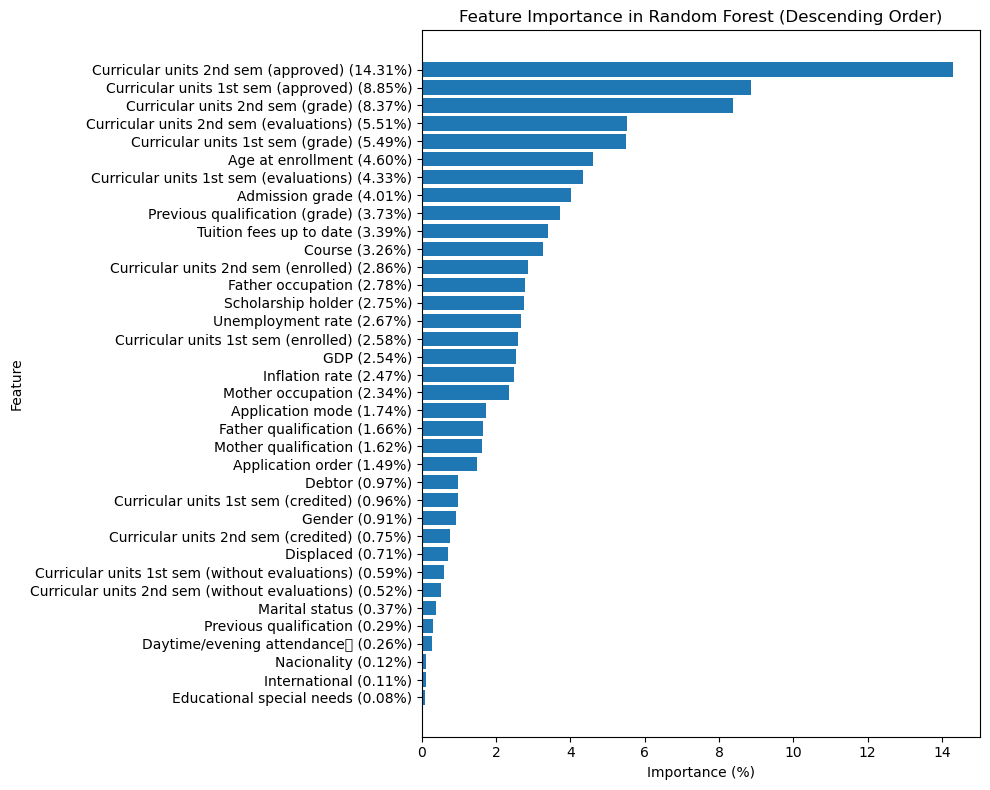

In [198]:
# Create a Random Forest model
randFor = RandomForestClassifier(random_state=123, **best_params)

# Fit the model to your data
randFor.fit(XBal_train, yBal_train)  # Use your training data here

# Get feature importances
feature_importances = randFor.feature_importances_

# Get the corresponding feature names
feature_names = XBal_train.columns  # Use the column names from your feature matrix

# Calculate the total sum of feature importances
total_importance = np.sum(feature_importances)

# Calculate the percentage of importance for each feature
percentage_importances = (feature_importances / total_importance) * 100

# Create a sorted list of feature importance scores and their corresponding names in ascending order
sorted_indices = np.argsort(percentage_importances)
sorted_percentages = percentage_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances as a horizontal bar chart (ascending order) with percentages
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_percentages)), sorted_percentages)
plt.yticks(range(len(sorted_percentages)), [f'{name} ({percentage:.2f}%)' for name, percentage in zip(sorted_feature_names, sorted_percentages)])
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest (Descending Order)')
plt.tight_layout()
plt.show()




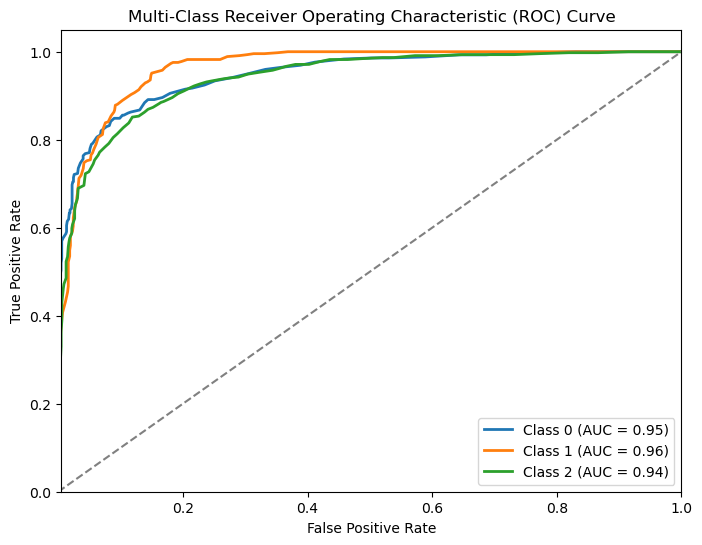

In [188]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create a Random Forest model
randFor = RandomForestClassifier(random_state=123)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(XBal, yBal, test_size=0.2, random_state=123)

# Train the model
randFor.fit(X_train, y_train)

# Get predicted probabilities for each class
y_probs = randFor.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming you have 3 classes: 0, 1, and 2
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.005, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


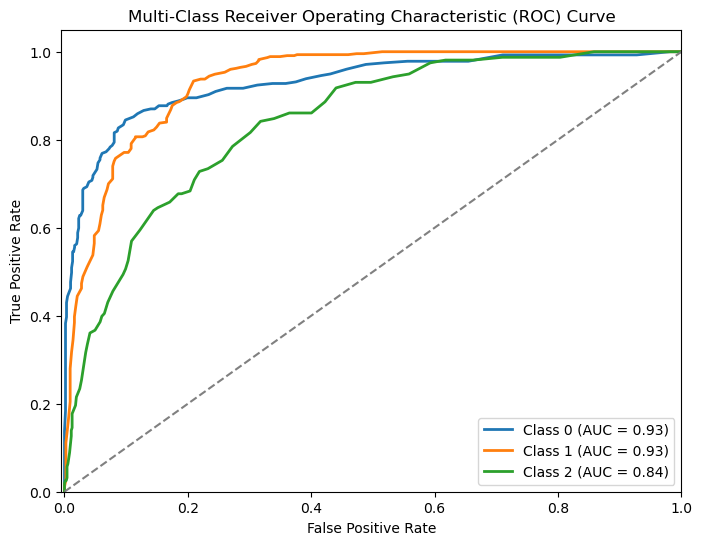

In [189]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create a Random Forest model
randFor = RandomForestClassifier(random_state=123)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train the model
randFor.fit(X_train, y_train)

# Get predicted probabilities for each class
y_probs = randFor.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming you have 3 classes: 0, 1, and 2
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([-0.005, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


2.3 CatBoost

In [190]:
import catboost
from catboost import CatBoostClassifier

In [191]:
categorical_indices = [X.columns.get_loc(column) for column in catVar[:-1]]

In [192]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Create a CatBoost model on unbalanced Data
catboost = CatBoostClassifier(random_state=123, cat_features=categorical_indices)

# Define the number of folds
num_folds = 5  # You can adjust this value as needed

# Create a StratifiedKFold object for k-fold cross-validation
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Initialize empty lists to store confusion matrices and accuracies for each fold
confusion_matrices = []
accuracies = []

# Perform k-fold cross-validation and compute confusion matrices and accuracies
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model using the training data
    catboost.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = catboost.predict(X_test)
    
    # Calculate confusion matrix and append to the list
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print confusion matrix and accuracy for each fold
for fold_num, (conf_matrix, accuracy) in enumerate(zip(confusion_matrices, accuracies), start=1):
    print(f'Fold {fold_num}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Accuracy: {accuracy:.2f}\n')

# Calculate and print the mean and standard deviation of accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation Accuracy: {std_accuracy:.4f}')

sensitivity_dropout = []
sensitivity_graduate = []
precision_dropout = []
precision_graduate = []

for i in range(len(confusion_matrices)):
    sensitivity_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i][0]))
    sensitivity_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i][1]))
    precision_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i].T[0]))
    precision_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i].T[1]))

print(f'Mean sensitivity (Dropout): {np.mean(sensitivity_dropout):.4f}')
print(f'Mean sensitivity (Graduate): {np.mean(sensitivity_graduate):.4f}')
print(f'Mean precision (Dropout): {np.mean(precision_dropout):.4f}')
print(f'Mean precision (Graduate): {np.mean(precision_graduate):.4f}')

Learning rate set to 0.084395
0:	learn: 1.0354616	total: 75.9ms	remaining: 1m 15s
1:	learn: 0.9787931	total: 164ms	remaining: 1m 21s
2:	learn: 0.9372703	total: 260ms	remaining: 1m 26s
3:	learn: 0.8957647	total: 361ms	remaining: 1m 29s
4:	learn: 0.8638864	total: 461ms	remaining: 1m 31s
5:	learn: 0.8330274	total: 563ms	remaining: 1m 33s
6:	learn: 0.8047405	total: 665ms	remaining: 1m 34s
7:	learn: 0.7823494	total: 762ms	remaining: 1m 34s
8:	learn: 0.7643870	total: 858ms	remaining: 1m 34s
9:	learn: 0.7461016	total: 953ms	remaining: 1m 34s
10:	learn: 0.7332577	total: 1.06s	remaining: 1m 35s
11:	learn: 0.7191473	total: 1.15s	remaining: 1m 35s
12:	learn: 0.7066343	total: 1.25s	remaining: 1m 34s
13:	learn: 0.6942567	total: 1.35s	remaining: 1m 34s
14:	learn: 0.6852655	total: 1.44s	remaining: 1m 34s
15:	learn: 0.6764139	total: 1.53s	remaining: 1m 34s
16:	learn: 0.6693886	total: 1.63s	remaining: 1m 34s
17:	learn: 0.6625382	total: 1.73s	remaining: 1m 34s
18:	learn: 0.6552541	total: 1.81s	remaining

158:	learn: 0.4468423	total: 15.3s	remaining: 1m 20s
159:	learn: 0.4463906	total: 15.4s	remaining: 1m 20s
160:	learn: 0.4451398	total: 15.5s	remaining: 1m 20s
161:	learn: 0.4440469	total: 15.6s	remaining: 1m 20s
162:	learn: 0.4433036	total: 15.7s	remaining: 1m 20s
163:	learn: 0.4426047	total: 15.8s	remaining: 1m 20s
164:	learn: 0.4419003	total: 15.9s	remaining: 1m 20s
165:	learn: 0.4413573	total: 16s	remaining: 1m 20s
166:	learn: 0.4406916	total: 16.1s	remaining: 1m 20s
167:	learn: 0.4401369	total: 16.2s	remaining: 1m 20s
168:	learn: 0.4390436	total: 16.3s	remaining: 1m 20s
169:	learn: 0.4388320	total: 16.4s	remaining: 1m 20s
170:	learn: 0.4380142	total: 16.5s	remaining: 1m 19s
171:	learn: 0.4372119	total: 16.6s	remaining: 1m 19s
172:	learn: 0.4362534	total: 16.7s	remaining: 1m 19s
173:	learn: 0.4357321	total: 16.8s	remaining: 1m 19s
174:	learn: 0.4351840	total: 16.9s	remaining: 1m 19s
175:	learn: 0.4349099	total: 17s	remaining: 1m 19s
176:	learn: 0.4342248	total: 17.1s	remaining: 1m 1

314:	learn: 0.3639830	total: 30.6s	remaining: 1m 6s
315:	learn: 0.3635476	total: 30.7s	remaining: 1m 6s
316:	learn: 0.3631546	total: 30.8s	remaining: 1m 6s
317:	learn: 0.3630701	total: 30.9s	remaining: 1m 6s
318:	learn: 0.3624939	total: 31s	remaining: 1m 6s
319:	learn: 0.3622334	total: 31.1s	remaining: 1m 5s
320:	learn: 0.3621422	total: 31.2s	remaining: 1m 5s
321:	learn: 0.3614385	total: 31.2s	remaining: 1m 5s
322:	learn: 0.3611159	total: 31.3s	remaining: 1m 5s
323:	learn: 0.3608040	total: 31.4s	remaining: 1m 5s
324:	learn: 0.3603545	total: 31.5s	remaining: 1m 5s
325:	learn: 0.3602960	total: 31.6s	remaining: 1m 5s
326:	learn: 0.3598259	total: 31.7s	remaining: 1m 5s
327:	learn: 0.3594970	total: 31.8s	remaining: 1m 5s
328:	learn: 0.3586313	total: 31.9s	remaining: 1m 5s
329:	learn: 0.3583364	total: 32s	remaining: 1m 4s
330:	learn: 0.3579075	total: 32.1s	remaining: 1m 4s
331:	learn: 0.3575028	total: 32.2s	remaining: 1m 4s
332:	learn: 0.3568103	total: 32.3s	remaining: 1m 4s
333:	learn: 0.35

475:	learn: 0.3048761	total: 46s	remaining: 50.7s
476:	learn: 0.3046422	total: 46.1s	remaining: 50.6s
477:	learn: 0.3044654	total: 46.2s	remaining: 50.5s
478:	learn: 0.3039208	total: 46.3s	remaining: 50.4s
479:	learn: 0.3035831	total: 46.4s	remaining: 50.3s
480:	learn: 0.3032886	total: 46.5s	remaining: 50.2s
481:	learn: 0.3028574	total: 46.6s	remaining: 50.1s
482:	learn: 0.3025578	total: 46.7s	remaining: 50s
483:	learn: 0.3022979	total: 46.8s	remaining: 49.9s
484:	learn: 0.3017323	total: 46.9s	remaining: 49.8s
485:	learn: 0.3015540	total: 47s	remaining: 49.7s
486:	learn: 0.3014875	total: 47.1s	remaining: 49.6s
487:	learn: 0.3013305	total: 47.2s	remaining: 49.5s
488:	learn: 0.3008505	total: 47.3s	remaining: 49.4s
489:	learn: 0.3003069	total: 47.4s	remaining: 49.3s
490:	learn: 0.3000163	total: 47.5s	remaining: 49.2s
491:	learn: 0.2998149	total: 47.6s	remaining: 49.1s
492:	learn: 0.2993304	total: 47.7s	remaining: 49s
493:	learn: 0.2990657	total: 47.8s	remaining: 48.9s
494:	learn: 0.298853

635:	learn: 0.2546890	total: 1m 1s	remaining: 35.3s
636:	learn: 0.2542043	total: 1m 1s	remaining: 35.2s
637:	learn: 0.2541095	total: 1m 1s	remaining: 35.1s
638:	learn: 0.2539964	total: 1m 1s	remaining: 35s
639:	learn: 0.2536294	total: 1m 2s	remaining: 34.9s
640:	learn: 0.2530564	total: 1m 2s	remaining: 34.8s
641:	learn: 0.2529185	total: 1m 2s	remaining: 34.7s
642:	learn: 0.2527913	total: 1m 2s	remaining: 34.6s
643:	learn: 0.2526087	total: 1m 2s	remaining: 34.5s
644:	learn: 0.2523673	total: 1m 2s	remaining: 34.4s
645:	learn: 0.2521598	total: 1m 2s	remaining: 34.3s
646:	learn: 0.2519903	total: 1m 2s	remaining: 34.2s
647:	learn: 0.2517271	total: 1m 2s	remaining: 34.1s
648:	learn: 0.2514190	total: 1m 2s	remaining: 34s
649:	learn: 0.2512892	total: 1m 2s	remaining: 33.9s
650:	learn: 0.2507075	total: 1m 3s	remaining: 33.8s
651:	learn: 0.2504475	total: 1m 3s	remaining: 33.7s
652:	learn: 0.2501672	total: 1m 3s	remaining: 33.6s
653:	learn: 0.2500061	total: 1m 3s	remaining: 33.5s
654:	learn: 0.24

792:	learn: 0.2141039	total: 1m 16s	remaining: 20.1s
793:	learn: 0.2137968	total: 1m 16s	remaining: 20s
794:	learn: 0.2133635	total: 1m 17s	remaining: 19.9s
795:	learn: 0.2131739	total: 1m 17s	remaining: 19.8s
796:	learn: 0.2130675	total: 1m 17s	remaining: 19.7s
797:	learn: 0.2130112	total: 1m 17s	remaining: 19.6s
798:	learn: 0.2125935	total: 1m 17s	remaining: 19.5s
799:	learn: 0.2123685	total: 1m 17s	remaining: 19.4s
800:	learn: 0.2119918	total: 1m 17s	remaining: 19.3s
801:	learn: 0.2119572	total: 1m 17s	remaining: 19.2s
802:	learn: 0.2115807	total: 1m 17s	remaining: 19.1s
803:	learn: 0.2112847	total: 1m 17s	remaining: 19s
804:	learn: 0.2111875	total: 1m 17s	remaining: 18.9s
805:	learn: 0.2109968	total: 1m 18s	remaining: 18.8s
806:	learn: 0.2108117	total: 1m 18s	remaining: 18.7s
807:	learn: 0.2105173	total: 1m 18s	remaining: 18.6s
808:	learn: 0.2103357	total: 1m 18s	remaining: 18.5s
809:	learn: 0.2102788	total: 1m 18s	remaining: 18.4s
810:	learn: 0.2098628	total: 1m 18s	remaining: 18.

948:	learn: 0.1814830	total: 1m 31s	remaining: 4.94s
949:	learn: 0.1811836	total: 1m 31s	remaining: 4.84s
950:	learn: 0.1807326	total: 1m 32s	remaining: 4.74s
951:	learn: 0.1806449	total: 1m 32s	remaining: 4.65s
952:	learn: 0.1804514	total: 1m 32s	remaining: 4.55s
953:	learn: 0.1801169	total: 1m 32s	remaining: 4.45s
954:	learn: 0.1797480	total: 1m 32s	remaining: 4.36s
955:	learn: 0.1795409	total: 1m 32s	remaining: 4.26s
956:	learn: 0.1794813	total: 1m 32s	remaining: 4.16s
957:	learn: 0.1792044	total: 1m 32s	remaining: 4.07s
958:	learn: 0.1790232	total: 1m 32s	remaining: 3.97s
959:	learn: 0.1788981	total: 1m 32s	remaining: 3.87s
960:	learn: 0.1786394	total: 1m 33s	remaining: 3.77s
961:	learn: 0.1784111	total: 1m 33s	remaining: 3.68s
962:	learn: 0.1782050	total: 1m 33s	remaining: 3.58s
963:	learn: 0.1779932	total: 1m 33s	remaining: 3.48s
964:	learn: 0.1779108	total: 1m 33s	remaining: 3.39s
965:	learn: 0.1776783	total: 1m 33s	remaining: 3.29s
966:	learn: 0.1773686	total: 1m 33s	remaining:

105:	learn: 0.5148657	total: 10.1s	remaining: 1m 25s
106:	learn: 0.5137817	total: 10.2s	remaining: 1m 25s
107:	learn: 0.5121261	total: 10.3s	remaining: 1m 25s
108:	learn: 0.5106116	total: 10.4s	remaining: 1m 25s
109:	learn: 0.5103098	total: 10.5s	remaining: 1m 25s
110:	learn: 0.5097512	total: 10.6s	remaining: 1m 25s
111:	learn: 0.5081881	total: 10.7s	remaining: 1m 24s
112:	learn: 0.5079349	total: 10.8s	remaining: 1m 24s
113:	learn: 0.5067575	total: 10.9s	remaining: 1m 24s
114:	learn: 0.5053698	total: 11s	remaining: 1m 24s
115:	learn: 0.5042970	total: 11.1s	remaining: 1m 24s
116:	learn: 0.5034818	total: 11.2s	remaining: 1m 24s
117:	learn: 0.5030322	total: 11.3s	remaining: 1m 24s
118:	learn: 0.5026708	total: 11.4s	remaining: 1m 24s
119:	learn: 0.5012696	total: 11.5s	remaining: 1m 24s
120:	learn: 0.5005919	total: 11.6s	remaining: 1m 24s
121:	learn: 0.5000229	total: 11.7s	remaining: 1m 23s
122:	learn: 0.4995536	total: 11.8s	remaining: 1m 23s
123:	learn: 0.4977808	total: 11.8s	remaining: 1m

262:	learn: 0.4094687	total: 25.2s	remaining: 1m 10s
263:	learn: 0.4092630	total: 25.3s	remaining: 1m 10s
264:	learn: 0.4089415	total: 25.4s	remaining: 1m 10s
265:	learn: 0.4080869	total: 25.5s	remaining: 1m 10s
266:	learn: 0.4077829	total: 25.6s	remaining: 1m 10s
267:	learn: 0.4076325	total: 25.7s	remaining: 1m 10s
268:	learn: 0.4073442	total: 25.8s	remaining: 1m 10s
269:	learn: 0.4066388	total: 25.9s	remaining: 1m 10s
270:	learn: 0.4062851	total: 26s	remaining: 1m 9s
271:	learn: 0.4059844	total: 26.1s	remaining: 1m 9s
272:	learn: 0.4058377	total: 26.2s	remaining: 1m 9s
273:	learn: 0.4052409	total: 26.3s	remaining: 1m 9s
274:	learn: 0.4049677	total: 26.4s	remaining: 1m 9s
275:	learn: 0.4043897	total: 26.5s	remaining: 1m 9s
276:	learn: 0.4039192	total: 26.6s	remaining: 1m 9s
277:	learn: 0.4037489	total: 26.7s	remaining: 1m 9s
278:	learn: 0.4036979	total: 26.8s	remaining: 1m 9s
279:	learn: 0.4033590	total: 26.9s	remaining: 1m 9s
280:	learn: 0.4028330	total: 27s	remaining: 1m 8s
281:	lea

423:	learn: 0.3449197	total: 40.8s	remaining: 55.5s
424:	learn: 0.3448054	total: 40.9s	remaining: 55.4s
425:	learn: 0.3447047	total: 41s	remaining: 55.3s
426:	learn: 0.3446390	total: 41.1s	remaining: 55.2s
427:	learn: 0.3440725	total: 41.2s	remaining: 55.1s
428:	learn: 0.3439578	total: 41.3s	remaining: 55s
429:	learn: 0.3437442	total: 41.4s	remaining: 54.9s
430:	learn: 0.3434206	total: 41.5s	remaining: 54.8s
431:	learn: 0.3431669	total: 41.6s	remaining: 54.7s
432:	learn: 0.3430098	total: 41.7s	remaining: 54.6s
433:	learn: 0.3427223	total: 41.8s	remaining: 54.5s
434:	learn: 0.3424756	total: 41.9s	remaining: 54.4s
435:	learn: 0.3424276	total: 42s	remaining: 54.3s
436:	learn: 0.3422211	total: 42.1s	remaining: 54.2s
437:	learn: 0.3419279	total: 42.2s	remaining: 54.1s
438:	learn: 0.3418602	total: 42.3s	remaining: 54s
439:	learn: 0.3416817	total: 42.4s	remaining: 53.9s
440:	learn: 0.3415795	total: 42.5s	remaining: 53.8s
441:	learn: 0.3412600	total: 42.6s	remaining: 53.7s
442:	learn: 0.340847

582:	learn: 0.2941055	total: 57.1s	remaining: 40.8s
583:	learn: 0.2939868	total: 57.2s	remaining: 40.7s
584:	learn: 0.2938202	total: 57.3s	remaining: 40.6s
585:	learn: 0.2936297	total: 57.4s	remaining: 40.5s
586:	learn: 0.2933641	total: 57.5s	remaining: 40.5s
587:	learn: 0.2931849	total: 57.6s	remaining: 40.3s
588:	learn: 0.2929421	total: 57.7s	remaining: 40.3s
589:	learn: 0.2926144	total: 57.8s	remaining: 40.2s
590:	learn: 0.2924300	total: 57.9s	remaining: 40.1s
591:	learn: 0.2922500	total: 58s	remaining: 40s
592:	learn: 0.2918809	total: 58.1s	remaining: 39.9s
593:	learn: 0.2916871	total: 58.2s	remaining: 39.8s
594:	learn: 0.2916117	total: 58.3s	remaining: 39.7s
595:	learn: 0.2914446	total: 58.4s	remaining: 39.6s
596:	learn: 0.2909614	total: 58.5s	remaining: 39.5s
597:	learn: 0.2908663	total: 58.6s	remaining: 39.4s
598:	learn: 0.2902552	total: 58.7s	remaining: 39.3s
599:	learn: 0.2899613	total: 58.8s	remaining: 39.2s
600:	learn: 0.2897306	total: 58.9s	remaining: 39.1s
601:	learn: 0.28

741:	learn: 0.2531408	total: 1m 13s	remaining: 25.5s
742:	learn: 0.2527963	total: 1m 13s	remaining: 25.4s
743:	learn: 0.2525584	total: 1m 13s	remaining: 25.3s
744:	learn: 0.2523551	total: 1m 13s	remaining: 25.2s
745:	learn: 0.2522353	total: 1m 13s	remaining: 25.1s
746:	learn: 0.2520569	total: 1m 13s	remaining: 25s
747:	learn: 0.2518327	total: 1m 13s	remaining: 24.9s
748:	learn: 0.2515966	total: 1m 14s	remaining: 24.8s
749:	learn: 0.2515343	total: 1m 14s	remaining: 24.7s
750:	learn: 0.2512149	total: 1m 14s	remaining: 24.6s
751:	learn: 0.2510815	total: 1m 14s	remaining: 24.5s
752:	learn: 0.2506824	total: 1m 14s	remaining: 24.4s
753:	learn: 0.2503709	total: 1m 14s	remaining: 24.3s
754:	learn: 0.2501546	total: 1m 14s	remaining: 24.2s
755:	learn: 0.2497129	total: 1m 14s	remaining: 24.1s
756:	learn: 0.2495505	total: 1m 14s	remaining: 24s
757:	learn: 0.2494501	total: 1m 14s	remaining: 23.9s
758:	learn: 0.2493084	total: 1m 15s	remaining: 23.8s
759:	learn: 0.2490644	total: 1m 15s	remaining: 23.

897:	learn: 0.2154052	total: 1m 28s	remaining: 10.1s
898:	learn: 0.2148377	total: 1m 28s	remaining: 9.99s
899:	learn: 0.2143578	total: 1m 29s	remaining: 9.89s
900:	learn: 0.2142541	total: 1m 29s	remaining: 9.79s
901:	learn: 0.2141635	total: 1m 29s	remaining: 9.7s
902:	learn: 0.2140392	total: 1m 29s	remaining: 9.6s
903:	learn: 0.2138127	total: 1m 29s	remaining: 9.5s
904:	learn: 0.2136282	total: 1m 29s	remaining: 9.4s
905:	learn: 0.2134393	total: 1m 29s	remaining: 9.3s
906:	learn: 0.2133047	total: 1m 29s	remaining: 9.2s
907:	learn: 0.2128913	total: 1m 29s	remaining: 9.1s
908:	learn: 0.2126912	total: 1m 29s	remaining: 9s
909:	learn: 0.2125704	total: 1m 30s	remaining: 8.9s
910:	learn: 0.2123092	total: 1m 30s	remaining: 8.8s
911:	learn: 0.2121151	total: 1m 30s	remaining: 8.71s
912:	learn: 0.2120287	total: 1m 30s	remaining: 8.61s
913:	learn: 0.2117092	total: 1m 30s	remaining: 8.51s
914:	learn: 0.2115623	total: 1m 30s	remaining: 8.41s
915:	learn: 0.2113828	total: 1m 30s	remaining: 8.31s
916:	

54:	learn: 0.5511224	total: 5.07s	remaining: 1m 27s
55:	learn: 0.5494039	total: 5.18s	remaining: 1m 27s
56:	learn: 0.5490559	total: 5.28s	remaining: 1m 27s
57:	learn: 0.5476686	total: 5.37s	remaining: 1m 27s
58:	learn: 0.5468271	total: 5.47s	remaining: 1m 27s
59:	learn: 0.5460847	total: 5.56s	remaining: 1m 27s
60:	learn: 0.5453356	total: 5.66s	remaining: 1m 27s
61:	learn: 0.5446801	total: 5.75s	remaining: 1m 27s
62:	learn: 0.5435796	total: 5.84s	remaining: 1m 26s
63:	learn: 0.5427563	total: 5.95s	remaining: 1m 26s
64:	learn: 0.5415982	total: 6.04s	remaining: 1m 26s
65:	learn: 0.5407361	total: 6.13s	remaining: 1m 26s
66:	learn: 0.5394816	total: 6.24s	remaining: 1m 26s
67:	learn: 0.5376747	total: 6.35s	remaining: 1m 26s
68:	learn: 0.5367649	total: 6.44s	remaining: 1m 26s
69:	learn: 0.5357201	total: 6.53s	remaining: 1m 26s
70:	learn: 0.5348454	total: 6.63s	remaining: 1m 26s
71:	learn: 0.5336082	total: 6.72s	remaining: 1m 26s
72:	learn: 0.5329016	total: 6.81s	remaining: 1m 26s
73:	learn: 0

211:	learn: 0.4275701	total: 20.6s	remaining: 1m 16s
212:	learn: 0.4268782	total: 20.7s	remaining: 1m 16s
213:	learn: 0.4258838	total: 20.8s	remaining: 1m 16s
214:	learn: 0.4254732	total: 20.9s	remaining: 1m 16s
215:	learn: 0.4246535	total: 21s	remaining: 1m 16s
216:	learn: 0.4236196	total: 21.1s	remaining: 1m 16s
217:	learn: 0.4234959	total: 21.2s	remaining: 1m 16s
218:	learn: 0.4231361	total: 21.3s	remaining: 1m 15s
219:	learn: 0.4226595	total: 21.4s	remaining: 1m 15s
220:	learn: 0.4216706	total: 21.5s	remaining: 1m 15s
221:	learn: 0.4214678	total: 21.6s	remaining: 1m 15s
222:	learn: 0.4210771	total: 21.7s	remaining: 1m 15s
223:	learn: 0.4205282	total: 21.8s	remaining: 1m 15s
224:	learn: 0.4204437	total: 21.9s	remaining: 1m 15s
225:	learn: 0.4197044	total: 22s	remaining: 1m 15s
226:	learn: 0.4188715	total: 22.1s	remaining: 1m 15s
227:	learn: 0.4184469	total: 22.2s	remaining: 1m 15s
228:	learn: 0.4180746	total: 22.3s	remaining: 1m 14s
229:	learn: 0.4176006	total: 22.4s	remaining: 1m 1

368:	learn: 0.3574522	total: 36.2s	remaining: 1m 1s
369:	learn: 0.3565453	total: 36.2s	remaining: 1m 1s
370:	learn: 0.3563760	total: 36.3s	remaining: 1m 1s
371:	learn: 0.3561984	total: 36.4s	remaining: 1m 1s
372:	learn: 0.3555569	total: 36.5s	remaining: 1m 1s
373:	learn: 0.3552350	total: 36.6s	remaining: 1m 1s
374:	learn: 0.3545374	total: 36.7s	remaining: 1m 1s
375:	learn: 0.3539759	total: 36.9s	remaining: 1m 1s
376:	learn: 0.3537120	total: 37s	remaining: 1m 1s
377:	learn: 0.3532907	total: 37.1s	remaining: 1m
378:	learn: 0.3529129	total: 37.2s	remaining: 1m
379:	learn: 0.3526528	total: 37.3s	remaining: 1m
380:	learn: 0.3524297	total: 37.4s	remaining: 1m
381:	learn: 0.3520977	total: 37.5s	remaining: 1m
382:	learn: 0.3517451	total: 37.6s	remaining: 1m
383:	learn: 0.3515150	total: 37.7s	remaining: 1m
384:	learn: 0.3511106	total: 37.8s	remaining: 1m
385:	learn: 0.3510303	total: 37.9s	remaining: 1m
386:	learn: 0.3503067	total: 38s	remaining: 1m
387:	learn: 0.3501009	total: 38.1s	remaining: 

529:	learn: 0.3005508	total: 52s	remaining: 46.1s
530:	learn: 0.3003818	total: 52.1s	remaining: 46s
531:	learn: 0.2999046	total: 52.2s	remaining: 45.9s
532:	learn: 0.2995818	total: 52.3s	remaining: 45.8s
533:	learn: 0.2993502	total: 52.4s	remaining: 45.7s
534:	learn: 0.2990618	total: 52.5s	remaining: 45.6s
535:	learn: 0.2982696	total: 52.6s	remaining: 45.5s
536:	learn: 0.2978527	total: 52.7s	remaining: 45.4s
537:	learn: 0.2975750	total: 52.8s	remaining: 45.3s
538:	learn: 0.2974779	total: 52.9s	remaining: 45.3s
539:	learn: 0.2967953	total: 53.1s	remaining: 45.2s
540:	learn: 0.2965150	total: 53.2s	remaining: 45.1s
541:	learn: 0.2956837	total: 53.3s	remaining: 45s
542:	learn: 0.2954096	total: 53.4s	remaining: 44.9s
543:	learn: 0.2952161	total: 53.5s	remaining: 44.8s
544:	learn: 0.2948189	total: 53.6s	remaining: 44.7s
545:	learn: 0.2944513	total: 53.7s	remaining: 44.7s
546:	learn: 0.2941803	total: 53.8s	remaining: 44.6s
547:	learn: 0.2939105	total: 53.9s	remaining: 44.5s
548:	learn: 0.2936

691:	learn: 0.2525270	total: 1m 8s	remaining: 30.3s
692:	learn: 0.2522766	total: 1m 8s	remaining: 30.2s
693:	learn: 0.2522398	total: 1m 8s	remaining: 30.1s
694:	learn: 0.2520979	total: 1m 8s	remaining: 30s
695:	learn: 0.2519103	total: 1m 8s	remaining: 29.9s
696:	learn: 0.2516830	total: 1m 8s	remaining: 29.8s
697:	learn: 0.2514672	total: 1m 8s	remaining: 29.7s
698:	learn: 0.2511310	total: 1m 8s	remaining: 29.6s
699:	learn: 0.2508452	total: 1m 8s	remaining: 29.5s
700:	learn: 0.2505211	total: 1m 8s	remaining: 29.4s
701:	learn: 0.2504142	total: 1m 9s	remaining: 29.3s
702:	learn: 0.2502282	total: 1m 9s	remaining: 29.2s
703:	learn: 0.2499325	total: 1m 9s	remaining: 29.1s
704:	learn: 0.2498011	total: 1m 9s	remaining: 29s
705:	learn: 0.2495994	total: 1m 9s	remaining: 28.9s
706:	learn: 0.2493506	total: 1m 9s	remaining: 28.8s
707:	learn: 0.2492521	total: 1m 9s	remaining: 28.7s
708:	learn: 0.2489383	total: 1m 9s	remaining: 28.6s
709:	learn: 0.2486674	total: 1m 9s	remaining: 28.5s
710:	learn: 0.24

847:	learn: 0.2128332	total: 1m 24s	remaining: 15.2s
848:	learn: 0.2127228	total: 1m 24s	remaining: 15.1s
849:	learn: 0.2124569	total: 1m 24s	remaining: 15s
850:	learn: 0.2123349	total: 1m 24s	remaining: 14.9s
851:	learn: 0.2120243	total: 1m 25s	remaining: 14.8s
852:	learn: 0.2117524	total: 1m 25s	remaining: 14.7s
853:	learn: 0.2110578	total: 1m 25s	remaining: 14.6s
854:	learn: 0.2107287	total: 1m 25s	remaining: 14.5s
855:	learn: 0.2104549	total: 1m 25s	remaining: 14.4s
856:	learn: 0.2100319	total: 1m 25s	remaining: 14.3s
857:	learn: 0.2098199	total: 1m 25s	remaining: 14.2s
858:	learn: 0.2097511	total: 1m 25s	remaining: 14.1s
859:	learn: 0.2095959	total: 1m 25s	remaining: 14s
860:	learn: 0.2093121	total: 1m 26s	remaining: 13.9s
861:	learn: 0.2090877	total: 1m 26s	remaining: 13.8s
862:	learn: 0.2089511	total: 1m 26s	remaining: 13.7s
863:	learn: 0.2088624	total: 1m 26s	remaining: 13.6s
864:	learn: 0.2086048	total: 1m 26s	remaining: 13.5s
865:	learn: 0.2083878	total: 1m 26s	remaining: 13.

2:	learn: 0.9417628	total: 285ms	remaining: 1m 34s
3:	learn: 0.9010637	total: 376ms	remaining: 1m 33s
4:	learn: 0.8699654	total: 470ms	remaining: 1m 33s
5:	learn: 0.8456297	total: 546ms	remaining: 1m 30s
6:	learn: 0.8206017	total: 648ms	remaining: 1m 31s
7:	learn: 0.8004306	total: 765ms	remaining: 1m 34s
8:	learn: 0.7788947	total: 900ms	remaining: 1m 39s
9:	learn: 0.7605723	total: 996ms	remaining: 1m 38s
10:	learn: 0.7477215	total: 1.1s	remaining: 1m 39s
11:	learn: 0.7363252	total: 1.22s	remaining: 1m 40s
12:	learn: 0.7232262	total: 1.32s	remaining: 1m 40s
13:	learn: 0.7112926	total: 1.43s	remaining: 1m 40s
14:	learn: 0.7014813	total: 1.55s	remaining: 1m 41s
15:	learn: 0.6917720	total: 1.66s	remaining: 1m 42s
16:	learn: 0.6832440	total: 1.76s	remaining: 1m 41s
17:	learn: 0.6759720	total: 1.85s	remaining: 1m 40s
18:	learn: 0.6694356	total: 1.94s	remaining: 1m 40s
19:	learn: 0.6629024	total: 2.06s	remaining: 1m 40s
20:	learn: 0.6561915	total: 2.17s	remaining: 1m 41s
21:	learn: 0.6471680	

161:	learn: 0.4582016	total: 15.9s	remaining: 1m 22s
162:	learn: 0.4575997	total: 16s	remaining: 1m 22s
163:	learn: 0.4571028	total: 16.1s	remaining: 1m 22s
164:	learn: 0.4567376	total: 16.2s	remaining: 1m 21s
165:	learn: 0.4553928	total: 16.3s	remaining: 1m 21s
166:	learn: 0.4545817	total: 16.3s	remaining: 1m 21s
167:	learn: 0.4539205	total: 16.4s	remaining: 1m 21s
168:	learn: 0.4530589	total: 16.5s	remaining: 1m 21s
169:	learn: 0.4523695	total: 16.6s	remaining: 1m 21s
170:	learn: 0.4515945	total: 16.7s	remaining: 1m 20s
171:	learn: 0.4504996	total: 16.8s	remaining: 1m 20s
172:	learn: 0.4499942	total: 16.9s	remaining: 1m 20s
173:	learn: 0.4484422	total: 17s	remaining: 1m 20s
174:	learn: 0.4480085	total: 17.1s	remaining: 1m 20s
175:	learn: 0.4476672	total: 17.1s	remaining: 1m 20s
176:	learn: 0.4466165	total: 17.2s	remaining: 1m 20s
177:	learn: 0.4460584	total: 17.3s	remaining: 1m 20s
178:	learn: 0.4453195	total: 17.4s	remaining: 1m 19s
179:	learn: 0.4451495	total: 17.5s	remaining: 1m 1

320:	learn: 0.3714130	total: 30.1s	remaining: 1m 3s
321:	learn: 0.3709981	total: 30.2s	remaining: 1m 3s
322:	learn: 0.3704778	total: 30.2s	remaining: 1m 3s
323:	learn: 0.3695989	total: 30.3s	remaining: 1m 3s
324:	learn: 0.3689847	total: 30.4s	remaining: 1m 3s
325:	learn: 0.3682772	total: 30.5s	remaining: 1m 3s
326:	learn: 0.3679672	total: 30.6s	remaining: 1m 2s
327:	learn: 0.3678749	total: 30.7s	remaining: 1m 2s
328:	learn: 0.3674267	total: 30.8s	remaining: 1m 2s
329:	learn: 0.3668281	total: 30.9s	remaining: 1m 2s
330:	learn: 0.3663885	total: 30.9s	remaining: 1m 2s
331:	learn: 0.3662496	total: 31s	remaining: 1m 2s
332:	learn: 0.3658786	total: 31.1s	remaining: 1m 2s
333:	learn: 0.3655746	total: 31.2s	remaining: 1m 2s
334:	learn: 0.3651028	total: 31.3s	remaining: 1m 2s
335:	learn: 0.3647986	total: 31.5s	remaining: 1m 2s
336:	learn: 0.3643784	total: 31.6s	remaining: 1m 2s
337:	learn: 0.3640805	total: 31.7s	remaining: 1m 2s
338:	learn: 0.3636987	total: 31.8s	remaining: 1m 1s
339:	learn: 0.

482:	learn: 0.3047402	total: 45.3s	remaining: 48.4s
483:	learn: 0.3044773	total: 45.3s	remaining: 48.3s
484:	learn: 0.3044137	total: 45.4s	remaining: 48.3s
485:	learn: 0.3041613	total: 45.5s	remaining: 48.2s
486:	learn: 0.3036564	total: 45.6s	remaining: 48.1s
487:	learn: 0.3034027	total: 45.7s	remaining: 48s
488:	learn: 0.3030992	total: 45.8s	remaining: 47.9s
489:	learn: 0.3026261	total: 45.9s	remaining: 47.8s
490:	learn: 0.3020206	total: 46s	remaining: 47.7s
491:	learn: 0.3016139	total: 46.1s	remaining: 47.6s
492:	learn: 0.3010912	total: 46.2s	remaining: 47.5s
493:	learn: 0.3006727	total: 46.3s	remaining: 47.4s
494:	learn: 0.3002413	total: 46.4s	remaining: 47.3s
495:	learn: 0.2996801	total: 46.5s	remaining: 47.2s
496:	learn: 0.2992442	total: 46.5s	remaining: 47.1s
497:	learn: 0.2990987	total: 46.6s	remaining: 47s
498:	learn: 0.2984239	total: 46.7s	remaining: 46.9s
499:	learn: 0.2982048	total: 46.8s	remaining: 46.8s
500:	learn: 0.2979918	total: 46.9s	remaining: 46.7s
501:	learn: 0.2978

643:	learn: 0.2546582	total: 1m 1s	remaining: 33.8s
644:	learn: 0.2543931	total: 1m 1s	remaining: 33.7s
645:	learn: 0.2540788	total: 1m 1s	remaining: 33.6s
646:	learn: 0.2538378	total: 1m 1s	remaining: 33.6s
647:	learn: 0.2534386	total: 1m 1s	remaining: 33.5s
648:	learn: 0.2531173	total: 1m 1s	remaining: 33.4s
649:	learn: 0.2528436	total: 1m 1s	remaining: 33.3s
650:	learn: 0.2525628	total: 1m 1s	remaining: 33.2s
651:	learn: 0.2520203	total: 1m 2s	remaining: 33.1s
652:	learn: 0.2516058	total: 1m 2s	remaining: 33s
653:	learn: 0.2509949	total: 1m 2s	remaining: 32.9s
654:	learn: 0.2508646	total: 1m 2s	remaining: 32.8s
655:	learn: 0.2504554	total: 1m 2s	remaining: 32.7s
656:	learn: 0.2502582	total: 1m 2s	remaining: 32.6s
657:	learn: 0.2501076	total: 1m 2s	remaining: 32.5s
658:	learn: 0.2496188	total: 1m 2s	remaining: 32.5s
659:	learn: 0.2494299	total: 1m 2s	remaining: 32.4s
660:	learn: 0.2491762	total: 1m 2s	remaining: 32.3s
661:	learn: 0.2487764	total: 1m 3s	remaining: 32.2s
662:	learn: 0.

801:	learn: 0.2117790	total: 1m 16s	remaining: 19s
802:	learn: 0.2113707	total: 1m 17s	remaining: 18.9s
803:	learn: 0.2112336	total: 1m 17s	remaining: 18.8s
804:	learn: 0.2110674	total: 1m 17s	remaining: 18.7s
805:	learn: 0.2108536	total: 1m 17s	remaining: 18.6s
806:	learn: 0.2106654	total: 1m 17s	remaining: 18.5s
807:	learn: 0.2105576	total: 1m 17s	remaining: 18.4s
808:	learn: 0.2103810	total: 1m 17s	remaining: 18.3s
809:	learn: 0.2102863	total: 1m 17s	remaining: 18.2s
810:	learn: 0.2098977	total: 1m 17s	remaining: 18.1s
811:	learn: 0.2096442	total: 1m 17s	remaining: 18s
812:	learn: 0.2093318	total: 1m 17s	remaining: 17.9s
813:	learn: 0.2089506	total: 1m 18s	remaining: 17.8s
814:	learn: 0.2088775	total: 1m 18s	remaining: 17.7s
815:	learn: 0.2086966	total: 1m 18s	remaining: 17.6s
816:	learn: 0.2084070	total: 1m 18s	remaining: 17.5s
817:	learn: 0.2082855	total: 1m 18s	remaining: 17.5s
818:	learn: 0.2081105	total: 1m 18s	remaining: 17.4s
819:	learn: 0.2080192	total: 1m 18s	remaining: 17.

958:	learn: 0.1789224	total: 1m 31s	remaining: 3.93s
959:	learn: 0.1788607	total: 1m 31s	remaining: 3.83s
960:	learn: 0.1787849	total: 1m 32s	remaining: 3.73s
961:	learn: 0.1784571	total: 1m 32s	remaining: 3.64s
962:	learn: 0.1782762	total: 1m 32s	remaining: 3.54s
963:	learn: 0.1780676	total: 1m 32s	remaining: 3.45s
964:	learn: 0.1779149	total: 1m 32s	remaining: 3.35s
965:	learn: 0.1778734	total: 1m 32s	remaining: 3.25s
966:	learn: 0.1778042	total: 1m 32s	remaining: 3.16s
967:	learn: 0.1777418	total: 1m 32s	remaining: 3.06s
968:	learn: 0.1774275	total: 1m 32s	remaining: 2.97s
969:	learn: 0.1773129	total: 1m 32s	remaining: 2.87s
970:	learn: 0.1771205	total: 1m 32s	remaining: 2.77s
971:	learn: 0.1770581	total: 1m 33s	remaining: 2.68s
972:	learn: 0.1768953	total: 1m 33s	remaining: 2.58s
973:	learn: 0.1766187	total: 1m 33s	remaining: 2.49s
974:	learn: 0.1764930	total: 1m 33s	remaining: 2.39s
975:	learn: 0.1762367	total: 1m 33s	remaining: 2.3s
976:	learn: 0.1760967	total: 1m 33s	remaining: 

116:	learn: 0.5104535	total: 10.3s	remaining: 1m 17s
117:	learn: 0.5097341	total: 10.4s	remaining: 1m 17s
118:	learn: 0.5091106	total: 10.5s	remaining: 1m 17s
119:	learn: 0.5083757	total: 10.6s	remaining: 1m 17s
120:	learn: 0.5074151	total: 10.7s	remaining: 1m 17s
121:	learn: 0.5063851	total: 10.7s	remaining: 1m 17s
122:	learn: 0.5051170	total: 10.8s	remaining: 1m 17s
123:	learn: 0.5044069	total: 10.9s	remaining: 1m 17s
124:	learn: 0.5036874	total: 11s	remaining: 1m 17s
125:	learn: 0.5029831	total: 11.1s	remaining: 1m 16s
126:	learn: 0.5027876	total: 11.2s	remaining: 1m 16s
127:	learn: 0.5020462	total: 11.3s	remaining: 1m 16s
128:	learn: 0.5014145	total: 11.4s	remaining: 1m 16s
129:	learn: 0.5001980	total: 11.4s	remaining: 1m 16s
130:	learn: 0.4992856	total: 11.5s	remaining: 1m 16s
131:	learn: 0.4975596	total: 11.6s	remaining: 1m 16s
132:	learn: 0.4966584	total: 11.7s	remaining: 1m 16s
133:	learn: 0.4954278	total: 11.8s	remaining: 1m 16s
134:	learn: 0.4949797	total: 11.9s	remaining: 1m

275:	learn: 0.4180042	total: 24.6s	remaining: 1m 4s
276:	learn: 0.4178960	total: 24.7s	remaining: 1m 4s
277:	learn: 0.4173373	total: 24.8s	remaining: 1m 4s
278:	learn: 0.4169399	total: 24.9s	remaining: 1m 4s
279:	learn: 0.4163749	total: 25s	remaining: 1m 4s
280:	learn: 0.4159210	total: 25.1s	remaining: 1m 4s
281:	learn: 0.4156286	total: 25.2s	remaining: 1m 4s
282:	learn: 0.4154083	total: 25.3s	remaining: 1m 4s
283:	learn: 0.4147839	total: 25.4s	remaining: 1m 3s
284:	learn: 0.4143681	total: 25.5s	remaining: 1m 3s
285:	learn: 0.4143171	total: 25.6s	remaining: 1m 3s
286:	learn: 0.4139000	total: 25.6s	remaining: 1m 3s
287:	learn: 0.4137051	total: 25.7s	remaining: 1m 3s
288:	learn: 0.4133110	total: 25.8s	remaining: 1m 3s
289:	learn: 0.4131669	total: 25.9s	remaining: 1m 3s
290:	learn: 0.4127327	total: 26s	remaining: 1m 3s
291:	learn: 0.4122111	total: 26.1s	remaining: 1m 3s
292:	learn: 0.4117858	total: 26.2s	remaining: 1m 3s
293:	learn: 0.4116510	total: 26.3s	remaining: 1m 3s
294:	learn: 0.41

436:	learn: 0.3547244	total: 39.5s	remaining: 50.9s
437:	learn: 0.3546600	total: 39.6s	remaining: 50.8s
438:	learn: 0.3544501	total: 39.7s	remaining: 50.7s
439:	learn: 0.3538530	total: 39.8s	remaining: 50.6s
440:	learn: 0.3534084	total: 39.9s	remaining: 50.6s
441:	learn: 0.3528989	total: 40s	remaining: 50.5s
442:	learn: 0.3526602	total: 40.1s	remaining: 50.4s
443:	learn: 0.3524513	total: 40.1s	remaining: 50.3s
444:	learn: 0.3520683	total: 40.2s	remaining: 50.2s
445:	learn: 0.3518730	total: 40.4s	remaining: 50.1s
446:	learn: 0.3515111	total: 40.5s	remaining: 50.1s
447:	learn: 0.3510998	total: 40.6s	remaining: 50s
448:	learn: 0.3508418	total: 40.7s	remaining: 50s
449:	learn: 0.3505624	total: 40.8s	remaining: 49.9s
450:	learn: 0.3502293	total: 40.9s	remaining: 49.8s
451:	learn: 0.3498432	total: 41s	remaining: 49.7s
452:	learn: 0.3488638	total: 41.1s	remaining: 49.7s
453:	learn: 0.3485998	total: 41.3s	remaining: 49.6s
454:	learn: 0.3485572	total: 41.4s	remaining: 49.6s
455:	learn: 0.347911

595:	learn: 0.3000404	total: 55.6s	remaining: 37.7s
596:	learn: 0.2998117	total: 55.7s	remaining: 37.6s
597:	learn: 0.2996906	total: 55.8s	remaining: 37.5s
598:	learn: 0.2995309	total: 55.9s	remaining: 37.4s
599:	learn: 0.2994393	total: 56s	remaining: 37.3s
600:	learn: 0.2991433	total: 56.1s	remaining: 37.2s
601:	learn: 0.2989368	total: 56.2s	remaining: 37.1s
602:	learn: 0.2984583	total: 56.3s	remaining: 37s
603:	learn: 0.2982486	total: 56.4s	remaining: 36.9s
604:	learn: 0.2979830	total: 56.5s	remaining: 36.9s
605:	learn: 0.2977058	total: 56.5s	remaining: 36.8s
606:	learn: 0.2972671	total: 56.6s	remaining: 36.7s
607:	learn: 0.2971132	total: 56.7s	remaining: 36.6s
608:	learn: 0.2970621	total: 56.8s	remaining: 36.5s
609:	learn: 0.2969137	total: 56.9s	remaining: 36.4s
610:	learn: 0.2962828	total: 57s	remaining: 36.3s
611:	learn: 0.2959616	total: 57.1s	remaining: 36.2s
612:	learn: 0.2953612	total: 57.2s	remaining: 36.1s
613:	learn: 0.2952604	total: 57.3s	remaining: 36s
614:	learn: 0.295225

756:	learn: 0.2578679	total: 1m 11s	remaining: 22.9s
757:	learn: 0.2575345	total: 1m 11s	remaining: 22.8s
758:	learn: 0.2574086	total: 1m 11s	remaining: 22.7s
759:	learn: 0.2569717	total: 1m 11s	remaining: 22.6s
760:	learn: 0.2567815	total: 1m 11s	remaining: 22.5s
761:	learn: 0.2565107	total: 1m 11s	remaining: 22.4s
762:	learn: 0.2563301	total: 1m 11s	remaining: 22.3s
763:	learn: 0.2561032	total: 1m 11s	remaining: 22.2s
764:	learn: 0.2558573	total: 1m 12s	remaining: 22.1s
765:	learn: 0.2556533	total: 1m 12s	remaining: 22.1s
766:	learn: 0.2553171	total: 1m 12s	remaining: 22s
767:	learn: 0.2551853	total: 1m 12s	remaining: 21.9s
768:	learn: 0.2549160	total: 1m 12s	remaining: 21.8s
769:	learn: 0.2548037	total: 1m 12s	remaining: 21.7s
770:	learn: 0.2545826	total: 1m 12s	remaining: 21.6s
771:	learn: 0.2544817	total: 1m 12s	remaining: 21.5s
772:	learn: 0.2543406	total: 1m 12s	remaining: 21.4s
773:	learn: 0.2542696	total: 1m 12s	remaining: 21.3s
774:	learn: 0.2541799	total: 1m 13s	remaining: 2

913:	learn: 0.2198904	total: 1m 25s	remaining: 8.09s
914:	learn: 0.2196514	total: 1m 26s	remaining: 7.99s
915:	learn: 0.2194147	total: 1m 26s	remaining: 7.9s
916:	learn: 0.2190326	total: 1m 26s	remaining: 7.8s
917:	learn: 0.2188916	total: 1m 26s	remaining: 7.71s
918:	learn: 0.2186164	total: 1m 26s	remaining: 7.62s
919:	learn: 0.2181766	total: 1m 26s	remaining: 7.52s
920:	learn: 0.2179912	total: 1m 26s	remaining: 7.43s
921:	learn: 0.2177060	total: 1m 26s	remaining: 7.33s
922:	learn: 0.2174512	total: 1m 26s	remaining: 7.24s
923:	learn: 0.2172143	total: 1m 26s	remaining: 7.14s
924:	learn: 0.2170437	total: 1m 26s	remaining: 7.05s
925:	learn: 0.2168336	total: 1m 27s	remaining: 6.96s
926:	learn: 0.2165250	total: 1m 27s	remaining: 6.86s
927:	learn: 0.2164850	total: 1m 27s	remaining: 6.77s
928:	learn: 0.2162672	total: 1m 27s	remaining: 6.67s
929:	learn: 0.2161145	total: 1m 27s	remaining: 6.58s
930:	learn: 0.2156457	total: 1m 27s	remaining: 6.49s
931:	learn: 0.2155315	total: 1m 27s	remaining: 6

In [194]:
# Create a CatBoost model on balanced Data
catboost = CatBoostClassifier(random_state=123, cat_features=categorical_indices)

# Define the number of folds
num_folds = 5  # You can adjust this value as needed

# Create a StratifiedKFold object for k-fold cross-validation
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Initialize empty lists to store confusion matrices and accuracies for each fold
confusion_matrices = []
accuracies = []

# Perform k-fold cross-validation and compute confusion matrices and accuracies
for train_index, test_index in kfold.split(XBal, yBal):
    X_train, X_test = XBal.iloc[train_index], XBal.iloc[test_index]
    y_train, y_test = yBal.iloc[train_index], yBal.iloc[test_index]
    
    # Train the model using the training data
    catboost.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = catboost.predict(X_test)
    
    # Calculate confusion matrix and append to the list
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print confusion matrix and accuracy for each fold
for fold_num, (conf_matrix, accuracy) in enumerate(zip(confusion_matrices, accuracies), start=1):
    print(f'Fold {fold_num}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Accuracy: {accuracy:.2f}\n')

# Calculate and print the mean and standard deviation of accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation Accuracy: {std_accuracy:.4f}')

sensitivity_dropout = []
sensitivity_graduate = []
precision_dropout = []
precision_graduate = []

for i in range(len(confusion_matrices)):
    sensitivity_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i][0]))
    sensitivity_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i][1]))
    precision_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i].T[0]))
    precision_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i].T[1]))

print(f'Mean sensitivity (Dropout): {np.mean(sensitivity_dropout):.4f}')
print(f'Mean sensitivity (Graduate): {np.mean(sensitivity_graduate):.4f}')
print(f'Mean precision (Dropout): {np.mean(precision_dropout):.4f}')
print(f'Mean precision (Graduate): {np.mean(precision_graduate):.4f}')

Learning rate set to 0.086152
0:	learn: 1.0480083	total: 90ms	remaining: 1m 29s
1:	learn: 1.0010939	total: 180ms	remaining: 1m 29s
2:	learn: 0.9626492	total: 285ms	remaining: 1m 34s
3:	learn: 0.9332818	total: 375ms	remaining: 1m 33s
4:	learn: 0.9053341	total: 485ms	remaining: 1m 36s
5:	learn: 0.8816134	total: 587ms	remaining: 1m 37s
6:	learn: 0.8601793	total: 710ms	remaining: 1m 40s
7:	learn: 0.8408403	total: 826ms	remaining: 1m 42s
8:	learn: 0.8189890	total: 935ms	remaining: 1m 42s
9:	learn: 0.8033923	total: 1.04s	remaining: 1m 42s
10:	learn: 0.7881203	total: 1.14s	remaining: 1m 42s
11:	learn: 0.7758726	total: 1.25s	remaining: 1m 42s
12:	learn: 0.7634749	total: 1.36s	remaining: 1m 43s
13:	learn: 0.7528001	total: 1.46s	remaining: 1m 43s
14:	learn: 0.7408496	total: 1.58s	remaining: 1m 43s
15:	learn: 0.7295919	total: 1.68s	remaining: 1m 43s
16:	learn: 0.7198992	total: 1.79s	remaining: 1m 43s
17:	learn: 0.7118532	total: 1.88s	remaining: 1m 42s
18:	learn: 0.7055242	total: 1.99s	remaining: 

158:	learn: 0.4480856	total: 17.7s	remaining: 1m 33s
159:	learn: 0.4469627	total: 17.8s	remaining: 1m 33s
160:	learn: 0.4464489	total: 17.9s	remaining: 1m 33s
161:	learn: 0.4450350	total: 18s	remaining: 1m 32s
162:	learn: 0.4444836	total: 18.1s	remaining: 1m 32s
163:	learn: 0.4440683	total: 18.2s	remaining: 1m 32s
164:	learn: 0.4427648	total: 18.3s	remaining: 1m 32s
165:	learn: 0.4423083	total: 18.4s	remaining: 1m 32s
166:	learn: 0.4416592	total: 18.5s	remaining: 1m 32s
167:	learn: 0.4414194	total: 18.6s	remaining: 1m 31s
168:	learn: 0.4398647	total: 18.7s	remaining: 1m 31s
169:	learn: 0.4394716	total: 18.8s	remaining: 1m 31s
170:	learn: 0.4382902	total: 18.9s	remaining: 1m 31s
171:	learn: 0.4378211	total: 19s	remaining: 1m 31s
172:	learn: 0.4369256	total: 19.1s	remaining: 1m 31s
173:	learn: 0.4366414	total: 19.2s	remaining: 1m 30s
174:	learn: 0.4355954	total: 19.3s	remaining: 1m 30s
175:	learn: 0.4347868	total: 19.4s	remaining: 1m 30s
176:	learn: 0.4336743	total: 19.5s	remaining: 1m 3

314:	learn: 0.3575656	total: 34.5s	remaining: 1m 15s
315:	learn: 0.3573301	total: 34.6s	remaining: 1m 14s
316:	learn: 0.3568164	total: 34.7s	remaining: 1m 14s
317:	learn: 0.3560970	total: 34.8s	remaining: 1m 14s
318:	learn: 0.3555728	total: 35s	remaining: 1m 14s
319:	learn: 0.3550461	total: 35.1s	remaining: 1m 14s
320:	learn: 0.3547195	total: 35.2s	remaining: 1m 14s
321:	learn: 0.3545507	total: 35.3s	remaining: 1m 14s
322:	learn: 0.3544966	total: 35.4s	remaining: 1m 14s
323:	learn: 0.3541309	total: 35.5s	remaining: 1m 14s
324:	learn: 0.3535058	total: 35.6s	remaining: 1m 14s
325:	learn: 0.3533261	total: 35.7s	remaining: 1m 13s
326:	learn: 0.3530520	total: 35.9s	remaining: 1m 13s
327:	learn: 0.3526043	total: 36s	remaining: 1m 13s
328:	learn: 0.3523002	total: 36.1s	remaining: 1m 13s
329:	learn: 0.3521378	total: 36.2s	remaining: 1m 13s
330:	learn: 0.3516820	total: 36.3s	remaining: 1m 13s
331:	learn: 0.3512658	total: 36.5s	remaining: 1m 13s
332:	learn: 0.3508915	total: 36.6s	remaining: 1m 1

472:	learn: 0.2981607	total: 52s	remaining: 57.9s
473:	learn: 0.2977118	total: 52.1s	remaining: 57.8s
474:	learn: 0.2972531	total: 52.2s	remaining: 57.7s
475:	learn: 0.2970586	total: 52.3s	remaining: 57.6s
476:	learn: 0.2970217	total: 52.4s	remaining: 57.5s
477:	learn: 0.2969104	total: 52.5s	remaining: 57.3s
478:	learn: 0.2967844	total: 52.6s	remaining: 57.2s
479:	learn: 0.2966682	total: 52.7s	remaining: 57.1s
480:	learn: 0.2964559	total: 52.8s	remaining: 57s
481:	learn: 0.2960854	total: 52.9s	remaining: 56.8s
482:	learn: 0.2955181	total: 53s	remaining: 56.7s
483:	learn: 0.2954441	total: 53.1s	remaining: 56.6s
484:	learn: 0.2951693	total: 53.2s	remaining: 56.5s
485:	learn: 0.2951333	total: 53.4s	remaining: 56.4s
486:	learn: 0.2948511	total: 53.5s	remaining: 56.3s
487:	learn: 0.2947426	total: 53.6s	remaining: 56.2s
488:	learn: 0.2941453	total: 53.7s	remaining: 56.1s
489:	learn: 0.2937778	total: 53.8s	remaining: 56s
490:	learn: 0.2934390	total: 53.9s	remaining: 55.9s
491:	learn: 0.293051

631:	learn: 0.2545275	total: 1m 9s	remaining: 40.5s
632:	learn: 0.2541151	total: 1m 9s	remaining: 40.4s
633:	learn: 0.2539557	total: 1m 9s	remaining: 40.3s
634:	learn: 0.2537340	total: 1m 9s	remaining: 40.2s
635:	learn: 0.2535068	total: 1m 10s	remaining: 40.1s
636:	learn: 0.2531363	total: 1m 10s	remaining: 40s
637:	learn: 0.2527323	total: 1m 10s	remaining: 39.9s
638:	learn: 0.2524973	total: 1m 10s	remaining: 39.7s
639:	learn: 0.2523881	total: 1m 10s	remaining: 39.6s
640:	learn: 0.2521243	total: 1m 10s	remaining: 39.5s
641:	learn: 0.2518922	total: 1m 10s	remaining: 39.4s
642:	learn: 0.2516037	total: 1m 10s	remaining: 39.3s
643:	learn: 0.2512621	total: 1m 10s	remaining: 39.2s
644:	learn: 0.2511831	total: 1m 11s	remaining: 39.1s
645:	learn: 0.2508460	total: 1m 11s	remaining: 39s
646:	learn: 0.2506062	total: 1m 11s	remaining: 38.9s
647:	learn: 0.2505015	total: 1m 11s	remaining: 38.7s
648:	learn: 0.2502889	total: 1m 11s	remaining: 38.6s
649:	learn: 0.2501920	total: 1m 11s	remaining: 38.5s
6

788:	learn: 0.2206807	total: 1m 26s	remaining: 23.2s
789:	learn: 0.2205939	total: 1m 26s	remaining: 23.1s
790:	learn: 0.2202257	total: 1m 26s	remaining: 23s
791:	learn: 0.2200628	total: 1m 27s	remaining: 22.9s
792:	learn: 0.2198625	total: 1m 27s	remaining: 22.8s
793:	learn: 0.2197559	total: 1m 27s	remaining: 22.7s
794:	learn: 0.2194172	total: 1m 27s	remaining: 22.5s
795:	learn: 0.2189917	total: 1m 27s	remaining: 22.4s
796:	learn: 0.2188691	total: 1m 27s	remaining: 22.3s
797:	learn: 0.2185125	total: 1m 27s	remaining: 22.2s
798:	learn: 0.2184152	total: 1m 27s	remaining: 22.1s
799:	learn: 0.2182419	total: 1m 27s	remaining: 22s
800:	learn: 0.2181566	total: 1m 28s	remaining: 21.9s
801:	learn: 0.2180264	total: 1m 28s	remaining: 21.8s
802:	learn: 0.2178825	total: 1m 28s	remaining: 21.6s
803:	learn: 0.2175638	total: 1m 28s	remaining: 21.5s
804:	learn: 0.2171726	total: 1m 28s	remaining: 21.4s
805:	learn: 0.2170790	total: 1m 28s	remaining: 21.3s
806:	learn: 0.2167977	total: 1m 28s	remaining: 21.

944:	learn: 0.1894836	total: 1m 44s	remaining: 6.05s
945:	learn: 0.1892091	total: 1m 44s	remaining: 5.94s
946:	learn: 0.1889849	total: 1m 44s	remaining: 5.83s
947:	learn: 0.1887341	total: 1m 44s	remaining: 5.72s
948:	learn: 0.1886647	total: 1m 44s	remaining: 5.61s
949:	learn: 0.1885575	total: 1m 44s	remaining: 5.5s
950:	learn: 0.1882918	total: 1m 44s	remaining: 5.39s
951:	learn: 0.1881248	total: 1m 44s	remaining: 5.28s
952:	learn: 0.1880234	total: 1m 44s	remaining: 5.17s
953:	learn: 0.1878991	total: 1m 45s	remaining: 5.07s
954:	learn: 0.1877700	total: 1m 45s	remaining: 4.96s
955:	learn: 0.1875342	total: 1m 45s	remaining: 4.85s
956:	learn: 0.1873763	total: 1m 45s	remaining: 4.74s
957:	learn: 0.1871680	total: 1m 45s	remaining: 4.63s
958:	learn: 0.1870467	total: 1m 45s	remaining: 4.52s
959:	learn: 0.1868831	total: 1m 45s	remaining: 4.41s
960:	learn: 0.1866671	total: 1m 45s	remaining: 4.3s
961:	learn: 0.1865104	total: 1m 46s	remaining: 4.19s
962:	learn: 0.1864284	total: 1m 46s	remaining: 4

102:	learn: 0.5163364	total: 11.6s	remaining: 1m 41s
103:	learn: 0.5158941	total: 11.8s	remaining: 1m 41s
104:	learn: 0.5148915	total: 11.9s	remaining: 1m 41s
105:	learn: 0.5136734	total: 12s	remaining: 1m 41s
106:	learn: 0.5126840	total: 12.2s	remaining: 1m 41s
107:	learn: 0.5112148	total: 12.3s	remaining: 1m 41s
108:	learn: 0.5097883	total: 12.4s	remaining: 1m 41s
109:	learn: 0.5079944	total: 12.5s	remaining: 1m 41s
110:	learn: 0.5066547	total: 12.6s	remaining: 1m 41s
111:	learn: 0.5055801	total: 12.7s	remaining: 1m 40s
112:	learn: 0.5042694	total: 12.8s	remaining: 1m 40s
113:	learn: 0.5028826	total: 12.9s	remaining: 1m 40s
114:	learn: 0.5010862	total: 13s	remaining: 1m 40s
115:	learn: 0.5002275	total: 13.1s	remaining: 1m 40s
116:	learn: 0.4989520	total: 13.2s	remaining: 1m 39s
117:	learn: 0.4982804	total: 13.4s	remaining: 1m 40s
118:	learn: 0.4973447	total: 13.5s	remaining: 1m 40s
119:	learn: 0.4963493	total: 13.7s	remaining: 1m 40s
120:	learn: 0.4947038	total: 13.8s	remaining: 1m 3

258:	learn: 0.3786470	total: 29.6s	remaining: 1m 24s
259:	learn: 0.3784398	total: 29.7s	remaining: 1m 24s
260:	learn: 0.3778188	total: 29.8s	remaining: 1m 24s
261:	learn: 0.3772247	total: 30s	remaining: 1m 24s
262:	learn: 0.3767858	total: 30.1s	remaining: 1m 24s
263:	learn: 0.3760839	total: 30.2s	remaining: 1m 24s
264:	learn: 0.3757084	total: 30.3s	remaining: 1m 24s
265:	learn: 0.3755749	total: 30.5s	remaining: 1m 24s
266:	learn: 0.3748921	total: 30.6s	remaining: 1m 23s
267:	learn: 0.3744335	total: 30.7s	remaining: 1m 23s
268:	learn: 0.3736936	total: 30.8s	remaining: 1m 23s
269:	learn: 0.3733407	total: 31s	remaining: 1m 23s
270:	learn: 0.3728255	total: 31.1s	remaining: 1m 23s
271:	learn: 0.3726729	total: 31.2s	remaining: 1m 23s
272:	learn: 0.3719173	total: 31.3s	remaining: 1m 23s
273:	learn: 0.3717397	total: 31.4s	remaining: 1m 23s
274:	learn: 0.3714098	total: 31.5s	remaining: 1m 23s
275:	learn: 0.3710925	total: 31.6s	remaining: 1m 22s
276:	learn: 0.3710059	total: 31.7s	remaining: 1m 2

414:	learn: 0.3126206	total: 46.8s	remaining: 1m 5s
415:	learn: 0.3122340	total: 46.9s	remaining: 1m 5s
416:	learn: 0.3119727	total: 47s	remaining: 1m 5s
417:	learn: 0.3117725	total: 47.1s	remaining: 1m 5s
418:	learn: 0.3116608	total: 47.2s	remaining: 1m 5s
419:	learn: 0.3112535	total: 47.3s	remaining: 1m 5s
420:	learn: 0.3108631	total: 47.4s	remaining: 1m 5s
421:	learn: 0.3105073	total: 47.5s	remaining: 1m 5s
422:	learn: 0.3103666	total: 47.6s	remaining: 1m 4s
423:	learn: 0.3100954	total: 47.8s	remaining: 1m 4s
424:	learn: 0.3093136	total: 47.9s	remaining: 1m 4s
425:	learn: 0.3091031	total: 48s	remaining: 1m 4s
426:	learn: 0.3087418	total: 48.1s	remaining: 1m 4s
427:	learn: 0.3084060	total: 48.2s	remaining: 1m 4s
428:	learn: 0.3082235	total: 48.3s	remaining: 1m 4s
429:	learn: 0.3080527	total: 48.4s	remaining: 1m 4s
430:	learn: 0.3077971	total: 48.5s	remaining: 1m 4s
431:	learn: 0.3073606	total: 48.6s	remaining: 1m 3s
432:	learn: 0.3064101	total: 48.7s	remaining: 1m 3s
433:	learn: 0.30

574:	learn: 0.2661853	total: 1m 4s	remaining: 47.7s
575:	learn: 0.2656894	total: 1m 4s	remaining: 47.5s
576:	learn: 0.2653981	total: 1m 4s	remaining: 47.4s
577:	learn: 0.2651202	total: 1m 4s	remaining: 47.3s
578:	learn: 0.2647372	total: 1m 4s	remaining: 47.2s
579:	learn: 0.2645005	total: 1m 5s	remaining: 47.1s
580:	learn: 0.2641814	total: 1m 5s	remaining: 47s
581:	learn: 0.2639695	total: 1m 5s	remaining: 46.9s
582:	learn: 0.2637710	total: 1m 5s	remaining: 46.7s
583:	learn: 0.2634642	total: 1m 5s	remaining: 46.6s
584:	learn: 0.2631787	total: 1m 5s	remaining: 46.5s
585:	learn: 0.2628762	total: 1m 5s	remaining: 46.4s
586:	learn: 0.2626700	total: 1m 5s	remaining: 46.3s
587:	learn: 0.2626517	total: 1m 5s	remaining: 46.2s
588:	learn: 0.2623974	total: 1m 6s	remaining: 46.1s
589:	learn: 0.2621342	total: 1m 6s	remaining: 46s
590:	learn: 0.2619106	total: 1m 6s	remaining: 45.8s
591:	learn: 0.2617478	total: 1m 6s	remaining: 45.7s
592:	learn: 0.2615470	total: 1m 6s	remaining: 45.6s
593:	learn: 0.26

731:	learn: 0.2276325	total: 1m 21s	remaining: 29.8s
732:	learn: 0.2274796	total: 1m 21s	remaining: 29.7s
733:	learn: 0.2272744	total: 1m 21s	remaining: 29.6s
734:	learn: 0.2271856	total: 1m 21s	remaining: 29.5s
735:	learn: 0.2270042	total: 1m 21s	remaining: 29.4s
736:	learn: 0.2268423	total: 1m 22s	remaining: 29.3s
737:	learn: 0.2265330	total: 1m 22s	remaining: 29.2s
738:	learn: 0.2263906	total: 1m 22s	remaining: 29s
739:	learn: 0.2262107	total: 1m 22s	remaining: 28.9s
740:	learn: 0.2258882	total: 1m 22s	remaining: 28.8s
741:	learn: 0.2257649	total: 1m 22s	remaining: 28.7s
742:	learn: 0.2253444	total: 1m 22s	remaining: 28.6s
743:	learn: 0.2251733	total: 1m 22s	remaining: 28.5s
744:	learn: 0.2248571	total: 1m 23s	remaining: 28.4s
745:	learn: 0.2245791	total: 1m 23s	remaining: 28.3s
746:	learn: 0.2243666	total: 1m 23s	remaining: 28.2s
747:	learn: 0.2242867	total: 1m 23s	remaining: 28.1s
748:	learn: 0.2240587	total: 1m 23s	remaining: 28s
749:	learn: 0.2239672	total: 1m 23s	remaining: 27.

887:	learn: 0.1953301	total: 1m 40s	remaining: 12.6s
888:	learn: 0.1952526	total: 1m 40s	remaining: 12.5s
889:	learn: 0.1952301	total: 1m 40s	remaining: 12.4s
890:	learn: 0.1951190	total: 1m 40s	remaining: 12.3s
891:	learn: 0.1949028	total: 1m 40s	remaining: 12.2s
892:	learn: 0.1946364	total: 1m 40s	remaining: 12.1s
893:	learn: 0.1945614	total: 1m 40s	remaining: 11.9s
894:	learn: 0.1943596	total: 1m 40s	remaining: 11.8s
895:	learn: 0.1942409	total: 1m 41s	remaining: 11.7s
896:	learn: 0.1941587	total: 1m 41s	remaining: 11.6s
897:	learn: 0.1941090	total: 1m 41s	remaining: 11.5s
898:	learn: 0.1938128	total: 1m 41s	remaining: 11.4s
899:	learn: 0.1936195	total: 1m 41s	remaining: 11.3s
900:	learn: 0.1933813	total: 1m 41s	remaining: 11.2s
901:	learn: 0.1932767	total: 1m 41s	remaining: 11.1s
902:	learn: 0.1931061	total: 1m 41s	remaining: 10.9s
903:	learn: 0.1929325	total: 1m 41s	remaining: 10.8s
904:	learn: 0.1925915	total: 1m 42s	remaining: 10.7s
905:	learn: 0.1923207	total: 1m 42s	remaining:

45:	learn: 0.6050918	total: 5.2s	remaining: 1m 47s
46:	learn: 0.6017794	total: 5.34s	remaining: 1m 48s
47:	learn: 0.5985620	total: 5.45s	remaining: 1m 48s
48:	learn: 0.5971306	total: 5.57s	remaining: 1m 48s
49:	learn: 0.5955102	total: 5.67s	remaining: 1m 47s
50:	learn: 0.5934571	total: 5.78s	remaining: 1m 47s
51:	learn: 0.5914169	total: 5.88s	remaining: 1m 47s
52:	learn: 0.5894237	total: 6s	remaining: 1m 47s
53:	learn: 0.5877735	total: 6.09s	remaining: 1m 46s
54:	learn: 0.5861548	total: 6.2s	remaining: 1m 46s
55:	learn: 0.5838658	total: 6.3s	remaining: 1m 46s
56:	learn: 0.5824996	total: 6.44s	remaining: 1m 46s
57:	learn: 0.5806061	total: 6.57s	remaining: 1m 46s
58:	learn: 0.5794653	total: 6.69s	remaining: 1m 46s
59:	learn: 0.5783954	total: 6.79s	remaining: 1m 46s
60:	learn: 0.5764862	total: 6.93s	remaining: 1m 46s
61:	learn: 0.5741494	total: 7.06s	remaining: 1m 46s
62:	learn: 0.5719402	total: 7.21s	remaining: 1m 47s
63:	learn: 0.5697985	total: 7.34s	remaining: 1m 47s
64:	learn: 0.56843

202:	learn: 0.4164088	total: 24.2s	remaining: 1m 35s
203:	learn: 0.4157744	total: 24.3s	remaining: 1m 34s
204:	learn: 0.4147171	total: 24.5s	remaining: 1m 34s
205:	learn: 0.4141033	total: 24.6s	remaining: 1m 34s
206:	learn: 0.4138850	total: 24.7s	remaining: 1m 34s
207:	learn: 0.4133040	total: 24.8s	remaining: 1m 34s
208:	learn: 0.4127223	total: 24.9s	remaining: 1m 34s
209:	learn: 0.4121013	total: 25s	remaining: 1m 33s
210:	learn: 0.4112878	total: 25.1s	remaining: 1m 33s
211:	learn: 0.4104261	total: 25.2s	remaining: 1m 33s
212:	learn: 0.4100366	total: 25.3s	remaining: 1m 33s
213:	learn: 0.4095654	total: 25.4s	remaining: 1m 33s
214:	learn: 0.4084485	total: 25.5s	remaining: 1m 33s
215:	learn: 0.4077959	total: 25.6s	remaining: 1m 32s
216:	learn: 0.4069670	total: 25.7s	remaining: 1m 32s
217:	learn: 0.4067918	total: 25.8s	remaining: 1m 32s
218:	learn: 0.4061901	total: 25.9s	remaining: 1m 32s
219:	learn: 0.4058981	total: 26s	remaining: 1m 32s
220:	learn: 0.4049154	total: 26.1s	remaining: 1m 3

359:	learn: 0.3376876	total: 41.3s	remaining: 1m 13s
360:	learn: 0.3375133	total: 41.4s	remaining: 1m 13s
361:	learn: 0.3371634	total: 41.5s	remaining: 1m 13s
362:	learn: 0.3370076	total: 41.6s	remaining: 1m 13s
363:	learn: 0.3365308	total: 41.7s	remaining: 1m 12s
364:	learn: 0.3362854	total: 41.8s	remaining: 1m 12s
365:	learn: 0.3360902	total: 42s	remaining: 1m 12s
366:	learn: 0.3358508	total: 42.1s	remaining: 1m 12s
367:	learn: 0.3354678	total: 42.2s	remaining: 1m 12s
368:	learn: 0.3352081	total: 42.3s	remaining: 1m 12s
369:	learn: 0.3344126	total: 42.4s	remaining: 1m 12s
370:	learn: 0.3341736	total: 42.5s	remaining: 1m 12s
371:	learn: 0.3334901	total: 42.6s	remaining: 1m 11s
372:	learn: 0.3331819	total: 42.7s	remaining: 1m 11s
373:	learn: 0.3325668	total: 42.8s	remaining: 1m 11s
374:	learn: 0.3322115	total: 42.9s	remaining: 1m 11s
375:	learn: 0.3315086	total: 43s	remaining: 1m 11s
376:	learn: 0.3312089	total: 43.1s	remaining: 1m 11s
377:	learn: 0.3305757	total: 43.2s	remaining: 1m 1

518:	learn: 0.2807784	total: 59.5s	remaining: 55.1s
519:	learn: 0.2806297	total: 59.6s	remaining: 55s
520:	learn: 0.2802396	total: 59.7s	remaining: 54.9s
521:	learn: 0.2800092	total: 59.8s	remaining: 54.7s
522:	learn: 0.2799097	total: 59.9s	remaining: 54.6s
523:	learn: 0.2797205	total: 60s	remaining: 54.5s
524:	learn: 0.2796143	total: 1m	remaining: 54.4s
525:	learn: 0.2795478	total: 1m	remaining: 54.2s
526:	learn: 0.2793251	total: 1m	remaining: 54.1s
527:	learn: 0.2791798	total: 1m	remaining: 54s
528:	learn: 0.2790494	total: 1m	remaining: 53.9s
529:	learn: 0.2785751	total: 1m	remaining: 53.8s
530:	learn: 0.2783706	total: 1m	remaining: 53.7s
531:	learn: 0.2776048	total: 1m	remaining: 53.5s
532:	learn: 0.2774320	total: 1m	remaining: 53.4s
533:	learn: 0.2769026	total: 1m 1s	remaining: 53.3s
534:	learn: 0.2767281	total: 1m 1s	remaining: 53.2s
535:	learn: 0.2763844	total: 1m 1s	remaining: 53s
536:	learn: 0.2761898	total: 1m 1s	remaining: 52.9s
537:	learn: 0.2759133	total: 1m 1s	remaining: 5

677:	learn: 0.2420149	total: 1m 15s	remaining: 35.9s
678:	learn: 0.2419015	total: 1m 15s	remaining: 35.8s
679:	learn: 0.2418856	total: 1m 15s	remaining: 35.7s
680:	learn: 0.2416031	total: 1m 15s	remaining: 35.6s
681:	learn: 0.2415135	total: 1m 16s	remaining: 35.4s
682:	learn: 0.2412507	total: 1m 16s	remaining: 35.3s
683:	learn: 0.2410501	total: 1m 16s	remaining: 35.2s
684:	learn: 0.2409169	total: 1m 16s	remaining: 35.1s
685:	learn: 0.2406744	total: 1m 16s	remaining: 35s
686:	learn: 0.2402809	total: 1m 16s	remaining: 34.9s
687:	learn: 0.2402033	total: 1m 16s	remaining: 34.7s
688:	learn: 0.2398845	total: 1m 16s	remaining: 34.6s
689:	learn: 0.2396586	total: 1m 16s	remaining: 34.5s
690:	learn: 0.2396320	total: 1m 16s	remaining: 34.4s
691:	learn: 0.2394718	total: 1m 16s	remaining: 34.3s
692:	learn: 0.2393276	total: 1m 17s	remaining: 34.2s
693:	learn: 0.2391740	total: 1m 17s	remaining: 34s
694:	learn: 0.2389158	total: 1m 17s	remaining: 33.9s
695:	learn: 0.2386022	total: 1m 17s	remaining: 33.

833:	learn: 0.2097923	total: 1m 32s	remaining: 18.4s
834:	learn: 0.2093216	total: 1m 32s	remaining: 18.3s
835:	learn: 0.2091679	total: 1m 32s	remaining: 18.2s
836:	learn: 0.2089010	total: 1m 33s	remaining: 18.1s
837:	learn: 0.2085874	total: 1m 33s	remaining: 18s
838:	learn: 0.2082956	total: 1m 33s	remaining: 17.9s
839:	learn: 0.2080746	total: 1m 33s	remaining: 17.8s
840:	learn: 0.2080352	total: 1m 33s	remaining: 17.7s
841:	learn: 0.2079748	total: 1m 33s	remaining: 17.6s
842:	learn: 0.2078644	total: 1m 33s	remaining: 17.4s
843:	learn: 0.2077400	total: 1m 33s	remaining: 17.3s
844:	learn: 0.2074655	total: 1m 33s	remaining: 17.2s
845:	learn: 0.2072527	total: 1m 34s	remaining: 17.1s
846:	learn: 0.2069257	total: 1m 34s	remaining: 17s
847:	learn: 0.2066118	total: 1m 34s	remaining: 16.9s
848:	learn: 0.2062378	total: 1m 34s	remaining: 16.8s
849:	learn: 0.2061982	total: 1m 34s	remaining: 16.7s
850:	learn: 0.2059423	total: 1m 34s	remaining: 16.6s
851:	learn: 0.2058890	total: 1m 34s	remaining: 16.

989:	learn: 0.1812335	total: 1m 50s	remaining: 1.11s
990:	learn: 0.1810845	total: 1m 50s	remaining: 1s
991:	learn: 0.1809904	total: 1m 50s	remaining: 893ms
992:	learn: 0.1808677	total: 1m 50s	remaining: 781ms
993:	learn: 0.1807446	total: 1m 50s	remaining: 669ms
994:	learn: 0.1804771	total: 1m 50s	remaining: 558ms
995:	learn: 0.1803269	total: 1m 51s	remaining: 446ms
996:	learn: 0.1799505	total: 1m 51s	remaining: 335ms
997:	learn: 0.1795519	total: 1m 51s	remaining: 223ms
998:	learn: 0.1793459	total: 1m 51s	remaining: 112ms
999:	learn: 0.1793185	total: 1m 51s	remaining: 0us
Learning rate set to 0.086153
0:	learn: 1.0422790	total: 99.5ms	remaining: 1m 39s
1:	learn: 0.9952786	total: 208ms	remaining: 1m 43s
2:	learn: 0.9562827	total: 324ms	remaining: 1m 47s
3:	learn: 0.9248005	total: 424ms	remaining: 1m 45s
4:	learn: 0.8966351	total: 544ms	remaining: 1m 48s
5:	learn: 0.8723640	total: 647ms	remaining: 1m 47s
6:	learn: 0.8529822	total: 767ms	remaining: 1m 48s
7:	learn: 0.8360269	total: 876ms	r

146:	learn: 0.4629876	total: 16.1s	remaining: 1m 33s
147:	learn: 0.4619547	total: 16.2s	remaining: 1m 33s
148:	learn: 0.4609187	total: 16.3s	remaining: 1m 33s
149:	learn: 0.4600632	total: 16.4s	remaining: 1m 33s
150:	learn: 0.4585744	total: 16.6s	remaining: 1m 33s
151:	learn: 0.4580276	total: 16.7s	remaining: 1m 33s
152:	learn: 0.4563130	total: 16.8s	remaining: 1m 33s
153:	learn: 0.4554879	total: 16.9s	remaining: 1m 33s
154:	learn: 0.4540275	total: 17s	remaining: 1m 32s
155:	learn: 0.4528511	total: 17.1s	remaining: 1m 32s
156:	learn: 0.4519725	total: 17.3s	remaining: 1m 32s
157:	learn: 0.4510283	total: 17.4s	remaining: 1m 32s
158:	learn: 0.4497297	total: 17.5s	remaining: 1m 32s
159:	learn: 0.4481457	total: 17.6s	remaining: 1m 32s
160:	learn: 0.4460248	total: 17.7s	remaining: 1m 32s
161:	learn: 0.4457769	total: 17.8s	remaining: 1m 32s
162:	learn: 0.4444844	total: 17.9s	remaining: 1m 32s
163:	learn: 0.4442000	total: 18s	remaining: 1m 32s
164:	learn: 0.4435821	total: 18.2s	remaining: 1m 3

302:	learn: 0.3617437	total: 33.9s	remaining: 1m 18s
303:	learn: 0.3613854	total: 34s	remaining: 1m 17s
304:	learn: 0.3607576	total: 34.2s	remaining: 1m 17s
305:	learn: 0.3604877	total: 34.3s	remaining: 1m 17s
306:	learn: 0.3600693	total: 34.4s	remaining: 1m 17s
307:	learn: 0.3598984	total: 34.5s	remaining: 1m 17s
308:	learn: 0.3591011	total: 34.6s	remaining: 1m 17s
309:	learn: 0.3589144	total: 34.8s	remaining: 1m 17s
310:	learn: 0.3581146	total: 34.9s	remaining: 1m 17s
311:	learn: 0.3573209	total: 35s	remaining: 1m 17s
312:	learn: 0.3570436	total: 35.2s	remaining: 1m 17s
313:	learn: 0.3564559	total: 35.3s	remaining: 1m 17s
314:	learn: 0.3557017	total: 35.4s	remaining: 1m 16s
315:	learn: 0.3555137	total: 35.5s	remaining: 1m 16s
316:	learn: 0.3550477	total: 35.6s	remaining: 1m 16s
317:	learn: 0.3548035	total: 35.8s	remaining: 1m 16s
318:	learn: 0.3543398	total: 35.9s	remaining: 1m 16s
319:	learn: 0.3539124	total: 36s	remaining: 1m 16s
320:	learn: 0.3533216	total: 36.1s	remaining: 1m 16s

459:	learn: 0.2979584	total: 52s	remaining: 1m 1s
460:	learn: 0.2977420	total: 52.1s	remaining: 1m
461:	learn: 0.2974436	total: 52.2s	remaining: 1m
462:	learn: 0.2973187	total: 52.4s	remaining: 1m
463:	learn: 0.2968523	total: 52.5s	remaining: 1m
464:	learn: 0.2965289	total: 52.6s	remaining: 1m
465:	learn: 0.2957643	total: 52.7s	remaining: 1m
466:	learn: 0.2956075	total: 52.8s	remaining: 1m
467:	learn: 0.2951037	total: 52.9s	remaining: 1m
468:	learn: 0.2948381	total: 53s	remaining: 60s
469:	learn: 0.2943888	total: 53.1s	remaining: 59.9s
470:	learn: 0.2938641	total: 53.2s	remaining: 59.7s
471:	learn: 0.2932680	total: 53.3s	remaining: 59.6s
472:	learn: 0.2929534	total: 53.4s	remaining: 59.5s
473:	learn: 0.2927597	total: 53.5s	remaining: 59.4s
474:	learn: 0.2923052	total: 53.6s	remaining: 59.2s
475:	learn: 0.2919190	total: 53.7s	remaining: 59.1s
476:	learn: 0.2912509	total: 53.8s	remaining: 59s
477:	learn: 0.2910785	total: 53.9s	remaining: 58.9s
478:	learn: 0.2904875	total: 54s	remaining: 

620:	learn: 0.2493755	total: 1m 9s	remaining: 42.4s
621:	learn: 0.2492467	total: 1m 9s	remaining: 42.3s
622:	learn: 0.2491517	total: 1m 9s	remaining: 42.2s
623:	learn: 0.2487755	total: 1m 9s	remaining: 42s
624:	learn: 0.2484420	total: 1m 9s	remaining: 41.9s
625:	learn: 0.2483258	total: 1m 9s	remaining: 41.8s
626:	learn: 0.2482191	total: 1m 10s	remaining: 41.7s
627:	learn: 0.2478079	total: 1m 10s	remaining: 41.6s
628:	learn: 0.2472037	total: 1m 10s	remaining: 41.5s
629:	learn: 0.2468802	total: 1m 10s	remaining: 41.4s
630:	learn: 0.2467399	total: 1m 10s	remaining: 41.3s
631:	learn: 0.2464780	total: 1m 10s	remaining: 41.1s
632:	learn: 0.2461693	total: 1m 10s	remaining: 41s
633:	learn: 0.2458741	total: 1m 10s	remaining: 40.9s
634:	learn: 0.2457481	total: 1m 11s	remaining: 40.8s
635:	learn: 0.2455433	total: 1m 11s	remaining: 40.7s
636:	learn: 0.2454288	total: 1m 11s	remaining: 40.6s
637:	learn: 0.2453846	total: 1m 11s	remaining: 40.5s
638:	learn: 0.2451148	total: 1m 11s	remaining: 40.4s
639

777:	learn: 0.2124756	total: 1m 27s	remaining: 24.8s
778:	learn: 0.2121935	total: 1m 27s	remaining: 24.7s
779:	learn: 0.2119671	total: 1m 27s	remaining: 24.6s
780:	learn: 0.2115711	total: 1m 27s	remaining: 24.5s
781:	learn: 0.2114543	total: 1m 27s	remaining: 24.4s
782:	learn: 0.2110965	total: 1m 27s	remaining: 24.3s
783:	learn: 0.2108075	total: 1m 27s	remaining: 24.2s
784:	learn: 0.2105640	total: 1m 27s	remaining: 24.1s
785:	learn: 0.2101803	total: 1m 28s	remaining: 24s
786:	learn: 0.2100885	total: 1m 28s	remaining: 23.9s
787:	learn: 0.2100134	total: 1m 28s	remaining: 23.7s
788:	learn: 0.2098308	total: 1m 28s	remaining: 23.6s
789:	learn: 0.2097640	total: 1m 28s	remaining: 23.5s
790:	learn: 0.2094531	total: 1m 28s	remaining: 23.4s
791:	learn: 0.2093691	total: 1m 28s	remaining: 23.3s
792:	learn: 0.2090324	total: 1m 28s	remaining: 23.2s
793:	learn: 0.2089038	total: 1m 28s	remaining: 23.1s
794:	learn: 0.2087294	total: 1m 29s	remaining: 23s
795:	learn: 0.2084651	total: 1m 29s	remaining: 22.

933:	learn: 0.1832685	total: 1m 44s	remaining: 7.4s
934:	learn: 0.1832326	total: 1m 44s	remaining: 7.29s
935:	learn: 0.1831336	total: 1m 44s	remaining: 7.18s
936:	learn: 0.1829529	total: 1m 45s	remaining: 7.07s
937:	learn: 0.1828839	total: 1m 45s	remaining: 6.95s
938:	learn: 0.1828344	total: 1m 45s	remaining: 6.84s
939:	learn: 0.1827927	total: 1m 45s	remaining: 6.73s
940:	learn: 0.1826442	total: 1m 45s	remaining: 6.62s
941:	learn: 0.1825342	total: 1m 45s	remaining: 6.5s
942:	learn: 0.1824275	total: 1m 45s	remaining: 6.39s
943:	learn: 0.1822477	total: 1m 45s	remaining: 6.28s
944:	learn: 0.1821916	total: 1m 45s	remaining: 6.16s
945:	learn: 0.1819486	total: 1m 46s	remaining: 6.05s
946:	learn: 0.1818985	total: 1m 46s	remaining: 5.94s
947:	learn: 0.1817899	total: 1m 46s	remaining: 5.83s
948:	learn: 0.1815275	total: 1m 46s	remaining: 5.71s
949:	learn: 0.1815044	total: 1m 46s	remaining: 5.6s
950:	learn: 0.1813450	total: 1m 46s	remaining: 5.49s
951:	learn: 0.1810415	total: 1m 46s	remaining: 5.

90:	learn: 0.5383797	total: 10.4s	remaining: 1m 44s
91:	learn: 0.5374641	total: 10.5s	remaining: 1m 43s
92:	learn: 0.5366983	total: 10.6s	remaining: 1m 43s
93:	learn: 0.5357135	total: 10.7s	remaining: 1m 43s
94:	learn: 0.5346943	total: 10.8s	remaining: 1m 43s
95:	learn: 0.5328911	total: 10.9s	remaining: 1m 42s
96:	learn: 0.5321414	total: 11s	remaining: 1m 42s
97:	learn: 0.5308434	total: 11.1s	remaining: 1m 42s
98:	learn: 0.5299230	total: 11.3s	remaining: 1m 42s
99:	learn: 0.5294883	total: 11.4s	remaining: 1m 42s
100:	learn: 0.5275267	total: 11.5s	remaining: 1m 42s
101:	learn: 0.5257594	total: 11.6s	remaining: 1m 41s
102:	learn: 0.5251045	total: 11.7s	remaining: 1m 41s
103:	learn: 0.5241002	total: 11.8s	remaining: 1m 41s
104:	learn: 0.5228909	total: 11.9s	remaining: 1m 41s
105:	learn: 0.5213875	total: 12s	remaining: 1m 41s
106:	learn: 0.5196503	total: 12.1s	remaining: 1m 41s
107:	learn: 0.5186572	total: 12.2s	remaining: 1m 41s
108:	learn: 0.5169511	total: 12.4s	remaining: 1m 40s
109:	le

248:	learn: 0.3954442	total: 27.4s	remaining: 1m 22s
249:	learn: 0.3949608	total: 27.5s	remaining: 1m 22s
250:	learn: 0.3942042	total: 27.6s	remaining: 1m 22s
251:	learn: 0.3940170	total: 27.7s	remaining: 1m 22s
252:	learn: 0.3935784	total: 27.8s	remaining: 1m 22s
253:	learn: 0.3927724	total: 27.9s	remaining: 1m 21s
254:	learn: 0.3923088	total: 28s	remaining: 1m 21s
255:	learn: 0.3919934	total: 28.1s	remaining: 1m 21s
256:	learn: 0.3910424	total: 28.2s	remaining: 1m 21s
257:	learn: 0.3904648	total: 28.3s	remaining: 1m 21s
258:	learn: 0.3899551	total: 28.4s	remaining: 1m 21s
259:	learn: 0.3894361	total: 28.5s	remaining: 1m 21s
260:	learn: 0.3889633	total: 28.6s	remaining: 1m 21s
261:	learn: 0.3886524	total: 28.7s	remaining: 1m 20s
262:	learn: 0.3875249	total: 28.8s	remaining: 1m 20s
263:	learn: 0.3869641	total: 28.9s	remaining: 1m 20s
264:	learn: 0.3865375	total: 29s	remaining: 1m 20s
265:	learn: 0.3859629	total: 29.1s	remaining: 1m 20s
266:	learn: 0.3857740	total: 29.3s	remaining: 1m 2

405:	learn: 0.3259319	total: 46.4s	remaining: 1m 7s
406:	learn: 0.3256330	total: 46.5s	remaining: 1m 7s
407:	learn: 0.3250925	total: 46.6s	remaining: 1m 7s
408:	learn: 0.3250213	total: 46.7s	remaining: 1m 7s
409:	learn: 0.3246454	total: 46.8s	remaining: 1m 7s
410:	learn: 0.3241125	total: 46.9s	remaining: 1m 7s
411:	learn: 0.3236090	total: 47s	remaining: 1m 7s
412:	learn: 0.3234505	total: 47.2s	remaining: 1m 7s
413:	learn: 0.3228902	total: 47.3s	remaining: 1m 6s
414:	learn: 0.3224024	total: 47.4s	remaining: 1m 6s
415:	learn: 0.3222927	total: 47.5s	remaining: 1m 6s
416:	learn: 0.3220632	total: 47.6s	remaining: 1m 6s
417:	learn: 0.3219660	total: 47.7s	remaining: 1m 6s
418:	learn: 0.3216781	total: 47.8s	remaining: 1m 6s
419:	learn: 0.3214998	total: 47.9s	remaining: 1m 6s
420:	learn: 0.3212515	total: 48s	remaining: 1m 6s
421:	learn: 0.3210247	total: 48.1s	remaining: 1m 5s
422:	learn: 0.3209173	total: 48.2s	remaining: 1m 5s
423:	learn: 0.3204475	total: 48.4s	remaining: 1m 5s
424:	learn: 0.31

565:	learn: 0.2782647	total: 1m 4s	remaining: 49.4s
566:	learn: 0.2781186	total: 1m 4s	remaining: 49.3s
567:	learn: 0.2779215	total: 1m 4s	remaining: 49.1s
568:	learn: 0.2777407	total: 1m 4s	remaining: 49s
569:	learn: 0.2772697	total: 1m 4s	remaining: 48.9s
570:	learn: 0.2768731	total: 1m 4s	remaining: 48.8s
571:	learn: 0.2764288	total: 1m 5s	remaining: 48.7s
572:	learn: 0.2761726	total: 1m 5s	remaining: 48.6s
573:	learn: 0.2757825	total: 1m 5s	remaining: 48.4s
574:	learn: 0.2751419	total: 1m 5s	remaining: 48.3s
575:	learn: 0.2748575	total: 1m 5s	remaining: 48.2s
576:	learn: 0.2746355	total: 1m 5s	remaining: 48.1s
577:	learn: 0.2745651	total: 1m 5s	remaining: 48s
578:	learn: 0.2742294	total: 1m 5s	remaining: 47.8s
579:	learn: 0.2738496	total: 1m 5s	remaining: 47.7s
580:	learn: 0.2735778	total: 1m 6s	remaining: 47.6s
581:	learn: 0.2731921	total: 1m 6s	remaining: 47.5s
582:	learn: 0.2729147	total: 1m 6s	remaining: 47.4s
583:	learn: 0.2726102	total: 1m 6s	remaining: 47.3s
584:	learn: 0.27

723:	learn: 0.2371091	total: 1m 21s	remaining: 31s
724:	learn: 0.2369470	total: 1m 21s	remaining: 30.9s
725:	learn: 0.2365493	total: 1m 21s	remaining: 30.8s
726:	learn: 0.2362613	total: 1m 21s	remaining: 30.7s
727:	learn: 0.2360514	total: 1m 21s	remaining: 30.6s
728:	learn: 0.2359314	total: 1m 21s	remaining: 30.5s
729:	learn: 0.2355537	total: 1m 22s	remaining: 30.3s
730:	learn: 0.2353387	total: 1m 22s	remaining: 30.2s
731:	learn: 0.2346596	total: 1m 22s	remaining: 30.1s
732:	learn: 0.2345089	total: 1m 22s	remaining: 30s
733:	learn: 0.2341985	total: 1m 22s	remaining: 29.9s
734:	learn: 0.2340103	total: 1m 22s	remaining: 29.8s
735:	learn: 0.2336230	total: 1m 22s	remaining: 29.7s
736:	learn: 0.2333247	total: 1m 22s	remaining: 29.5s
737:	learn: 0.2332571	total: 1m 22s	remaining: 29.4s
738:	learn: 0.2329665	total: 1m 22s	remaining: 29.3s
739:	learn: 0.2329053	total: 1m 23s	remaining: 29.2s
740:	learn: 0.2327303	total: 1m 23s	remaining: 29.1s
741:	learn: 0.2326603	total: 1m 23s	remaining: 29s

881:	learn: 0.2037490	total: 1m 38s	remaining: 13.2s
882:	learn: 0.2036145	total: 1m 38s	remaining: 13.1s
883:	learn: 0.2032222	total: 1m 38s	remaining: 13s
884:	learn: 0.2027718	total: 1m 39s	remaining: 12.9s
885:	learn: 0.2022992	total: 1m 39s	remaining: 12.8s
886:	learn: 0.2021618	total: 1m 39s	remaining: 12.6s
887:	learn: 0.2020391	total: 1m 39s	remaining: 12.5s
888:	learn: 0.2018054	total: 1m 39s	remaining: 12.4s
889:	learn: 0.2016285	total: 1m 39s	remaining: 12.3s
890:	learn: 0.2014566	total: 1m 39s	remaining: 12.2s
891:	learn: 0.2014010	total: 1m 39s	remaining: 12.1s
892:	learn: 0.2013880	total: 1m 39s	remaining: 12s
893:	learn: 0.2013445	total: 1m 40s	remaining: 11.9s
894:	learn: 0.2010667	total: 1m 40s	remaining: 11.7s
895:	learn: 0.2010073	total: 1m 40s	remaining: 11.6s
896:	learn: 0.2008323	total: 1m 40s	remaining: 11.5s
897:	learn: 0.2006840	total: 1m 40s	remaining: 11.4s
898:	learn: 0.2005573	total: 1m 40s	remaining: 11.3s
899:	learn: 0.2005066	total: 1m 40s	remaining: 11.

Learning rate set to 0.086152
0:	learn: 1.0472351	total: 17.6ms	remaining: 17.6s
1:	learn: 1.0050257	total: 33.2ms	remaining: 16.5s
2:	learn: 0.9670206	total: 50.8ms	remaining: 16.9s
3:	learn: 0.9325329	total: 68.1ms	remaining: 16.9s
4:	learn: 0.9017215	total: 84.1ms	remaining: 16.7s
5:	learn: 0.8780341	total: 98.9ms	remaining: 16.4s
6:	learn: 0.8544117	total: 114ms	remaining: 16.2s
7:	learn: 0.8350734	total: 130ms	remaining: 16.1s
8:	learn: 0.8190766	total: 146ms	remaining: 16s
9:	learn: 0.8056019	total: 161ms	remaining: 16s
10:	learn: 0.7896060	total: 177ms	remaining: 15.9s
11:	learn: 0.7745896	total: 193ms	remaining: 15.9s
12:	learn: 0.7638008	total: 210ms	remaining: 16s
13:	learn: 0.7530381	total: 227ms	remaining: 16s
14:	learn: 0.7420610	total: 244ms	remaining: 16s
15:	learn: 0.7318102	total: 260ms	remaining: 16s
16:	learn: 0.7231479	total: 276ms	remaining: 15.9s
17:	learn: 0.7150759	total: 292ms	remaining: 15.9s
18:	learn: 0.7064527	total: 308ms	remaining: 15.9s
19:	learn: 0.7003

171:	learn: 0.4217811	total: 2.82s	remaining: 13.6s
172:	learn: 0.4210897	total: 2.84s	remaining: 13.6s
173:	learn: 0.4201242	total: 2.85s	remaining: 13.5s
174:	learn: 0.4195630	total: 2.87s	remaining: 13.5s
175:	learn: 0.4186418	total: 2.88s	remaining: 13.5s
176:	learn: 0.4173474	total: 2.9s	remaining: 13.5s
177:	learn: 0.4168387	total: 2.91s	remaining: 13.5s
178:	learn: 0.4162438	total: 2.93s	remaining: 13.4s
179:	learn: 0.4151248	total: 2.94s	remaining: 13.4s
180:	learn: 0.4143874	total: 2.96s	remaining: 13.4s
181:	learn: 0.4134944	total: 2.98s	remaining: 13.4s
182:	learn: 0.4126551	total: 2.99s	remaining: 13.4s
183:	learn: 0.4122318	total: 3.01s	remaining: 13.3s
184:	learn: 0.4112185	total: 3.02s	remaining: 13.3s
185:	learn: 0.4100661	total: 3.04s	remaining: 13.3s
186:	learn: 0.4090481	total: 3.06s	remaining: 13.3s
187:	learn: 0.4082318	total: 3.07s	remaining: 13.3s
188:	learn: 0.4078522	total: 3.09s	remaining: 13.3s
189:	learn: 0.4071220	total: 3.1s	remaining: 13.2s
190:	learn: 0.

330:	learn: 0.3145034	total: 5.4s	remaining: 10.9s
331:	learn: 0.3138438	total: 5.41s	remaining: 10.9s
332:	learn: 0.3136104	total: 5.43s	remaining: 10.9s
333:	learn: 0.3129210	total: 5.45s	remaining: 10.9s
334:	learn: 0.3124207	total: 5.46s	remaining: 10.8s
335:	learn: 0.3118218	total: 5.48s	remaining: 10.8s
336:	learn: 0.3111226	total: 5.49s	remaining: 10.8s
337:	learn: 0.3106233	total: 5.51s	remaining: 10.8s
338:	learn: 0.3102558	total: 5.53s	remaining: 10.8s
339:	learn: 0.3098365	total: 5.54s	remaining: 10.8s
340:	learn: 0.3094575	total: 5.56s	remaining: 10.7s
341:	learn: 0.3086264	total: 5.57s	remaining: 10.7s
342:	learn: 0.3080893	total: 5.59s	remaining: 10.7s
343:	learn: 0.3076328	total: 5.61s	remaining: 10.7s
344:	learn: 0.3070315	total: 5.63s	remaining: 10.7s
345:	learn: 0.3063846	total: 5.65s	remaining: 10.7s
346:	learn: 0.3059929	total: 5.66s	remaining: 10.7s
347:	learn: 0.3054675	total: 5.68s	remaining: 10.6s
348:	learn: 0.3048668	total: 5.69s	remaining: 10.6s
349:	learn: 0

500:	learn: 0.2448751	total: 8.25s	remaining: 8.21s
501:	learn: 0.2445573	total: 8.26s	remaining: 8.2s
502:	learn: 0.2442851	total: 8.28s	remaining: 8.18s
503:	learn: 0.2439545	total: 8.3s	remaining: 8.17s
504:	learn: 0.2437432	total: 8.32s	remaining: 8.15s
505:	learn: 0.2432963	total: 8.33s	remaining: 8.14s
506:	learn: 0.2429964	total: 8.35s	remaining: 8.12s
507:	learn: 0.2425757	total: 8.37s	remaining: 8.1s
508:	learn: 0.2423665	total: 8.38s	remaining: 8.09s
509:	learn: 0.2421605	total: 8.4s	remaining: 8.07s
510:	learn: 0.2418752	total: 8.42s	remaining: 8.05s
511:	learn: 0.2415520	total: 8.43s	remaining: 8.04s
512:	learn: 0.2411886	total: 8.45s	remaining: 8.03s
513:	learn: 0.2407678	total: 8.47s	remaining: 8.01s
514:	learn: 0.2401920	total: 8.49s	remaining: 8s
515:	learn: 0.2398728	total: 8.51s	remaining: 7.98s
516:	learn: 0.2396554	total: 8.53s	remaining: 7.97s
517:	learn: 0.2391401	total: 8.54s	remaining: 7.95s
518:	learn: 0.2387437	total: 8.56s	remaining: 7.93s
519:	learn: 0.23855

664:	learn: 0.1962036	total: 11.1s	remaining: 5.58s
665:	learn: 0.1960747	total: 11.1s	remaining: 5.57s
666:	learn: 0.1958795	total: 11.1s	remaining: 5.55s
667:	learn: 0.1954934	total: 11.1s	remaining: 5.54s
668:	learn: 0.1951625	total: 11.2s	remaining: 5.52s
669:	learn: 0.1947965	total: 11.2s	remaining: 5.5s
670:	learn: 0.1944902	total: 11.2s	remaining: 5.49s
671:	learn: 0.1942331	total: 11.2s	remaining: 5.47s
672:	learn: 0.1938848	total: 11.2s	remaining: 5.46s
673:	learn: 0.1936805	total: 11.3s	remaining: 5.44s
674:	learn: 0.1935492	total: 11.3s	remaining: 5.42s
675:	learn: 0.1933077	total: 11.3s	remaining: 5.41s
676:	learn: 0.1931930	total: 11.3s	remaining: 5.39s
677:	learn: 0.1930513	total: 11.3s	remaining: 5.38s
678:	learn: 0.1928660	total: 11.3s	remaining: 5.36s
679:	learn: 0.1926174	total: 11.4s	remaining: 5.34s
680:	learn: 0.1924281	total: 11.4s	remaining: 5.33s
681:	learn: 0.1921140	total: 11.4s	remaining: 5.31s
682:	learn: 0.1920595	total: 11.4s	remaining: 5.3s
683:	learn: 0.

825:	learn: 0.1604036	total: 13.9s	remaining: 2.93s
826:	learn: 0.1601984	total: 13.9s	remaining: 2.92s
827:	learn: 0.1599784	total: 14s	remaining: 2.9s
828:	learn: 0.1597018	total: 14s	remaining: 2.88s
829:	learn: 0.1593943	total: 14s	remaining: 2.86s
830:	learn: 0.1592484	total: 14s	remaining: 2.85s
831:	learn: 0.1590991	total: 14s	remaining: 2.83s
832:	learn: 0.1588345	total: 14s	remaining: 2.81s
833:	learn: 0.1586709	total: 14s	remaining: 2.79s
834:	learn: 0.1584013	total: 14.1s	remaining: 2.78s
835:	learn: 0.1581992	total: 14.1s	remaining: 2.76s
836:	learn: 0.1580118	total: 14.1s	remaining: 2.74s
837:	learn: 0.1578288	total: 14.1s	remaining: 2.73s
838:	learn: 0.1576047	total: 14.1s	remaining: 2.71s
839:	learn: 0.1575115	total: 14.1s	remaining: 2.69s
840:	learn: 0.1572401	total: 14.2s	remaining: 2.68s
841:	learn: 0.1571920	total: 14.2s	remaining: 2.66s
842:	learn: 0.1570095	total: 14.2s	remaining: 2.64s
843:	learn: 0.1568594	total: 14.2s	remaining: 2.63s
844:	learn: 0.1565078	total

991:	learn: 0.1313792	total: 16.6s	remaining: 134ms
992:	learn: 0.1312769	total: 16.6s	remaining: 117ms
993:	learn: 0.1311550	total: 16.6s	remaining: 100ms
994:	learn: 0.1310377	total: 16.6s	remaining: 83.6ms
995:	learn: 0.1309079	total: 16.6s	remaining: 66.9ms
996:	learn: 0.1307363	total: 16.7s	remaining: 50.1ms
997:	learn: 0.1305504	total: 16.7s	remaining: 33.4ms
998:	learn: 0.1303033	total: 16.7s	remaining: 16.7ms
999:	learn: 0.1302288	total: 16.7s	remaining: 0us


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10500\2874192983.py:31: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()


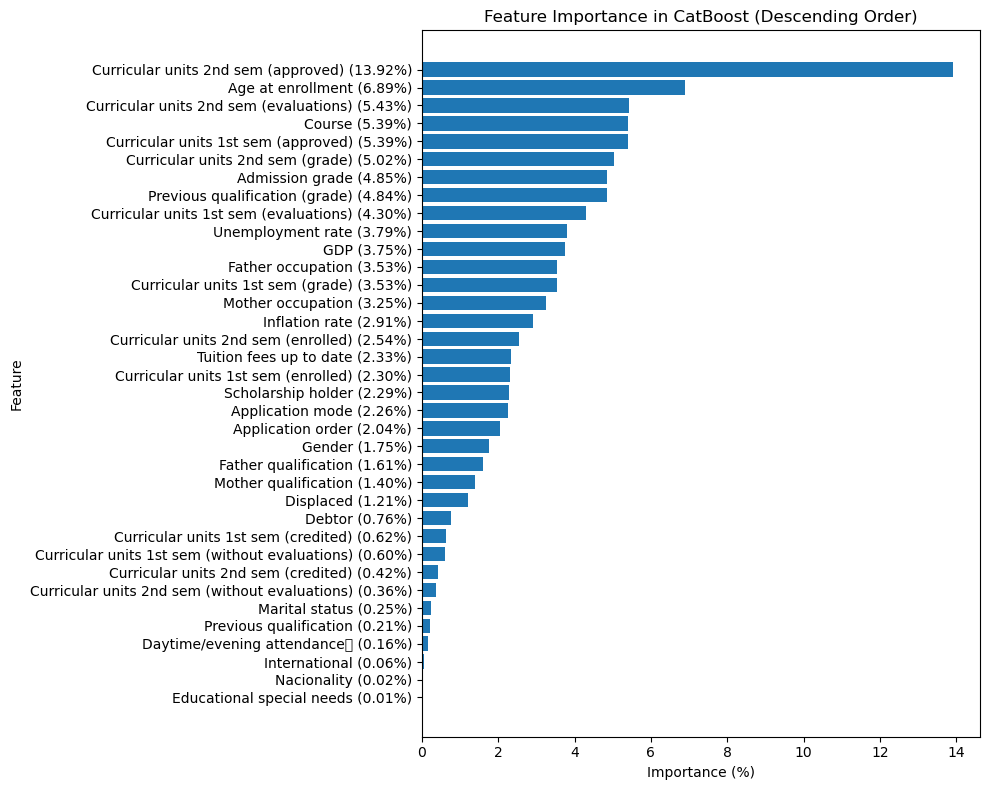

In [200]:
# Create a CatBoost model
catBoo = CatBoostClassifier(random_state=123)

# Fit the model to your data
catBoo.fit(XBal_train, yBal_train)  # Use your training data here

# Get feature importances
feature_importances = catBoo.get_feature_importance()

# Get the corresponding feature names
feature_names = XBal_train.columns  # Use the column names from your feature matrix

# Calculate the total sum of feature importances
total_importance = np.sum(feature_importances)

# Calculate the percentage of importance for each feature
percentage_importances = (feature_importances / total_importance) * 100

# Create a sorted list of feature importance scores and their corresponding names in ascending order
sorted_indices = np.argsort(percentage_importances)
sorted_percentages = percentage_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances as a horizontal bar chart (ascending order) with percentages
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_percentages)), sorted_percentages)
plt.yticks(range(len(sorted_percentages)), [f'{name} ({percentage:.2f}%)' for name, percentage in zip(sorted_feature_names, sorted_percentages)])
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.title('Feature Importance in CatBoost (Descending Order)')
plt.tight_layout()
plt.show()



Learning rate set to 0.086152
0:	learn: 1.0472351	total: 20.4ms	remaining: 20.4s
1:	learn: 1.0050257	total: 39.2ms	remaining: 19.6s
2:	learn: 0.9670206	total: 60.1ms	remaining: 20s
3:	learn: 0.9325329	total: 78.9ms	remaining: 19.6s
4:	learn: 0.9017215	total: 97.2ms	remaining: 19.3s
5:	learn: 0.8780341	total: 115ms	remaining: 19.1s
6:	learn: 0.8544117	total: 134ms	remaining: 19.1s
7:	learn: 0.8350734	total: 154ms	remaining: 19.1s
8:	learn: 0.8190766	total: 172ms	remaining: 18.9s
9:	learn: 0.8056019	total: 196ms	remaining: 19.4s
10:	learn: 0.7896060	total: 217ms	remaining: 19.5s
11:	learn: 0.7745896	total: 238ms	remaining: 19.6s
12:	learn: 0.7638008	total: 257ms	remaining: 19.5s
13:	learn: 0.7530381	total: 278ms	remaining: 19.6s
14:	learn: 0.7420610	total: 298ms	remaining: 19.6s
15:	learn: 0.7318102	total: 314ms	remaining: 19.3s
16:	learn: 0.7231479	total: 331ms	remaining: 19.1s
17:	learn: 0.7150759	total: 347ms	remaining: 18.9s
18:	learn: 0.7064527	total: 363ms	remaining: 18.7s
19:	lear

167:	learn: 0.4245359	total: 3.06s	remaining: 15.1s
168:	learn: 0.4237654	total: 3.07s	remaining: 15.1s
169:	learn: 0.4229177	total: 3.09s	remaining: 15.1s
170:	learn: 0.4223196	total: 3.1s	remaining: 15s
171:	learn: 0.4217811	total: 3.12s	remaining: 15s
172:	learn: 0.4210897	total: 3.14s	remaining: 15s
173:	learn: 0.4201242	total: 3.16s	remaining: 15s
174:	learn: 0.4195630	total: 3.17s	remaining: 15s
175:	learn: 0.4186418	total: 3.19s	remaining: 14.9s
176:	learn: 0.4173474	total: 3.21s	remaining: 14.9s
177:	learn: 0.4168387	total: 3.22s	remaining: 14.9s
178:	learn: 0.4162438	total: 3.24s	remaining: 14.8s
179:	learn: 0.4151248	total: 3.25s	remaining: 14.8s
180:	learn: 0.4143874	total: 3.27s	remaining: 14.8s
181:	learn: 0.4134944	total: 3.29s	remaining: 14.8s
182:	learn: 0.4126551	total: 3.31s	remaining: 14.8s
183:	learn: 0.4122318	total: 3.32s	remaining: 14.7s
184:	learn: 0.4112185	total: 3.34s	remaining: 14.7s
185:	learn: 0.4100661	total: 3.36s	remaining: 14.7s
186:	learn: 0.4090481	t

328:	learn: 0.3156160	total: 5.9s	remaining: 12s
329:	learn: 0.3151436	total: 5.92s	remaining: 12s
330:	learn: 0.3145034	total: 5.93s	remaining: 12s
331:	learn: 0.3138438	total: 5.95s	remaining: 12s
332:	learn: 0.3136104	total: 5.97s	remaining: 12s
333:	learn: 0.3129210	total: 5.99s	remaining: 11.9s
334:	learn: 0.3124207	total: 6s	remaining: 11.9s
335:	learn: 0.3118218	total: 6.02s	remaining: 11.9s
336:	learn: 0.3111226	total: 6.03s	remaining: 11.9s
337:	learn: 0.3106233	total: 6.05s	remaining: 11.8s
338:	learn: 0.3102558	total: 6.07s	remaining: 11.8s
339:	learn: 0.3098365	total: 6.08s	remaining: 11.8s
340:	learn: 0.3094575	total: 6.1s	remaining: 11.8s
341:	learn: 0.3086264	total: 6.12s	remaining: 11.8s
342:	learn: 0.3080893	total: 6.13s	remaining: 11.8s
343:	learn: 0.3076328	total: 6.16s	remaining: 11.7s
344:	learn: 0.3070315	total: 6.17s	remaining: 11.7s
345:	learn: 0.3063846	total: 6.19s	remaining: 11.7s
346:	learn: 0.3059929	total: 6.21s	remaining: 11.7s
347:	learn: 0.3054675	total

492:	learn: 0.2470236	total: 8.7s	remaining: 8.95s
493:	learn: 0.2467745	total: 8.72s	remaining: 8.93s
494:	learn: 0.2465556	total: 8.74s	remaining: 8.92s
495:	learn: 0.2463944	total: 8.76s	remaining: 8.9s
496:	learn: 0.2461446	total: 8.77s	remaining: 8.88s
497:	learn: 0.2458043	total: 8.79s	remaining: 8.86s
498:	learn: 0.2454743	total: 8.8s	remaining: 8.84s
499:	learn: 0.2450903	total: 8.82s	remaining: 8.82s
500:	learn: 0.2448751	total: 8.84s	remaining: 8.8s
501:	learn: 0.2445573	total: 8.85s	remaining: 8.78s
502:	learn: 0.2442851	total: 8.87s	remaining: 8.76s
503:	learn: 0.2439545	total: 8.88s	remaining: 8.74s
504:	learn: 0.2437432	total: 8.9s	remaining: 8.72s
505:	learn: 0.2432963	total: 8.91s	remaining: 8.7s
506:	learn: 0.2429964	total: 8.93s	remaining: 8.68s
507:	learn: 0.2425757	total: 8.95s	remaining: 8.66s
508:	learn: 0.2423665	total: 8.96s	remaining: 8.64s
509:	learn: 0.2421605	total: 8.97s	remaining: 8.62s
510:	learn: 0.2418752	total: 8.99s	remaining: 8.6s
511:	learn: 0.24155

659:	learn: 0.1974059	total: 11.5s	remaining: 5.93s
660:	learn: 0.1972309	total: 11.5s	remaining: 5.91s
661:	learn: 0.1969405	total: 11.5s	remaining: 5.9s
662:	learn: 0.1965985	total: 11.6s	remaining: 5.88s
663:	learn: 0.1963943	total: 11.6s	remaining: 5.86s
664:	learn: 0.1962036	total: 11.6s	remaining: 5.84s
665:	learn: 0.1960747	total: 11.6s	remaining: 5.82s
666:	learn: 0.1958795	total: 11.6s	remaining: 5.81s
667:	learn: 0.1954934	total: 11.6s	remaining: 5.79s
668:	learn: 0.1951625	total: 11.7s	remaining: 5.77s
669:	learn: 0.1947965	total: 11.7s	remaining: 5.75s
670:	learn: 0.1944902	total: 11.7s	remaining: 5.73s
671:	learn: 0.1942331	total: 11.7s	remaining: 5.72s
672:	learn: 0.1938848	total: 11.7s	remaining: 5.7s
673:	learn: 0.1936805	total: 11.7s	remaining: 5.68s
674:	learn: 0.1935492	total: 11.8s	remaining: 5.66s
675:	learn: 0.1933077	total: 11.8s	remaining: 5.64s
676:	learn: 0.1931930	total: 11.8s	remaining: 5.63s
677:	learn: 0.1930513	total: 11.8s	remaining: 5.61s
678:	learn: 0.

828:	learn: 0.1597018	total: 14.4s	remaining: 2.96s
829:	learn: 0.1593943	total: 14.4s	remaining: 2.95s
830:	learn: 0.1592484	total: 14.4s	remaining: 2.93s
831:	learn: 0.1590991	total: 14.4s	remaining: 2.91s
832:	learn: 0.1588345	total: 14.4s	remaining: 2.89s
833:	learn: 0.1586709	total: 14.5s	remaining: 2.88s
834:	learn: 0.1584013	total: 14.5s	remaining: 2.86s
835:	learn: 0.1581992	total: 14.5s	remaining: 2.84s
836:	learn: 0.1580118	total: 14.5s	remaining: 2.82s
837:	learn: 0.1578288	total: 14.5s	remaining: 2.81s
838:	learn: 0.1576047	total: 14.5s	remaining: 2.79s
839:	learn: 0.1575115	total: 14.6s	remaining: 2.77s
840:	learn: 0.1572401	total: 14.6s	remaining: 2.75s
841:	learn: 0.1571920	total: 14.6s	remaining: 2.74s
842:	learn: 0.1570095	total: 14.6s	remaining: 2.72s
843:	learn: 0.1568594	total: 14.6s	remaining: 2.7s
844:	learn: 0.1565078	total: 14.6s	remaining: 2.69s
845:	learn: 0.1563280	total: 14.7s	remaining: 2.67s
846:	learn: 0.1562185	total: 14.7s	remaining: 2.65s
847:	learn: 0

993:	learn: 0.1311550	total: 17.2s	remaining: 104ms
994:	learn: 0.1310377	total: 17.2s	remaining: 86.4ms
995:	learn: 0.1309079	total: 17.2s	remaining: 69.1ms
996:	learn: 0.1307363	total: 17.2s	remaining: 51.8ms
997:	learn: 0.1305504	total: 17.2s	remaining: 34.6ms
998:	learn: 0.1303033	total: 17.3s	remaining: 17.3ms
999:	learn: 0.1302288	total: 17.3s	remaining: 0us


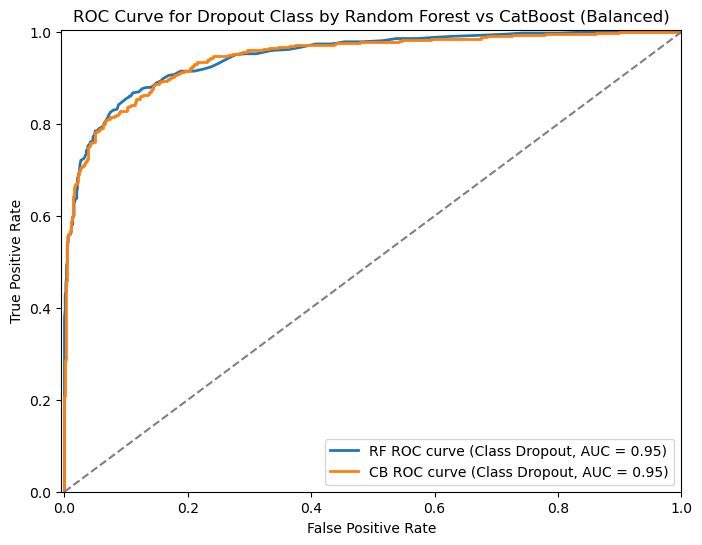

In [203]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Create a Random Forest model
randFor = RandomForestClassifier(random_state=123, **best_params)
catBoo = CatBoostClassifier(random_state=123)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(XBal, yBal, test_size=0.2, random_state=123)

# Train the model
randFor.fit(X_train, y_train)
catBoo.fit(X_train, y_train)

# Get predicted probabilities for the positive class ("Dropout")
y_probs_dropoutRand = randFor.predict_proba(X_test)[:, 0]  # Assuming "Dropout" is now encoded as 0
y_probs_dropoutCat = catBoo.predict_proba(X_test)[:, 0]

# Compute ROC curve and AUC for the positive class ("Dropout")
fprR, tprR, _ = roc_curve(y_test == 0, y_probs_dropoutRand)
fprC, tprC, _ = roc_curve(y_test == 0, y_probs_dropoutCat)

roc_aucR = auc(fprR, tprR)
roc_aucC = auc(fprC, tprC)

# Plot ROC curve for the positive class ("Dropout")
plt.figure(figsize=(8, 6))
plt.plot(fprR, tprR, lw=2, label=f'RF ROC curve (Class Dropout, AUC = {roc_aucR:.2f})')
plt.plot(fprC, tprC, lw=2, label=f'CB ROC curve (Class Dropout, AUC = {roc_aucR:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([-0.005, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Dropout Class by Random Forest vs CatBoost (Balanced)')
plt.legend(loc='lower right')
plt.show()

Learning rate set to 0.084395
0:	learn: 1.0384227	total: 9.2ms	remaining: 9.19s
1:	learn: 0.9861152	total: 19.5ms	remaining: 9.72s
2:	learn: 0.9383668	total: 30.2ms	remaining: 10s
3:	learn: 0.9012890	total: 40.6ms	remaining: 10.1s
4:	learn: 0.8689473	total: 51.2ms	remaining: 10.2s
5:	learn: 0.8429441	total: 63.6ms	remaining: 10.5s
6:	learn: 0.8194551	total: 74.3ms	remaining: 10.5s
7:	learn: 0.7984762	total: 84.9ms	remaining: 10.5s
8:	learn: 0.7794861	total: 97.1ms	remaining: 10.7s
9:	learn: 0.7626945	total: 108ms	remaining: 10.7s
10:	learn: 0.7481319	total: 119ms	remaining: 10.7s
11:	learn: 0.7339593	total: 131ms	remaining: 10.8s
12:	learn: 0.7209252	total: 142ms	remaining: 10.8s
13:	learn: 0.7099627	total: 153ms	remaining: 10.7s
14:	learn: 0.7001452	total: 164ms	remaining: 10.8s
15:	learn: 0.6902414	total: 175ms	remaining: 10.8s
16:	learn: 0.6808073	total: 186ms	remaining: 10.7s
17:	learn: 0.6743072	total: 199ms	remaining: 10.8s
18:	learn: 0.6666046	total: 212ms	remaining: 11s
19:	lea

162:	learn: 0.4399121	total: 2s	remaining: 10.3s
163:	learn: 0.4388818	total: 2.02s	remaining: 10.3s
164:	learn: 0.4382640	total: 2.03s	remaining: 10.3s
165:	learn: 0.4369325	total: 2.04s	remaining: 10.2s
166:	learn: 0.4364348	total: 2.05s	remaining: 10.2s
167:	learn: 0.4355147	total: 2.06s	remaining: 10.2s
168:	learn: 0.4349564	total: 2.07s	remaining: 10.2s
169:	learn: 0.4343410	total: 2.08s	remaining: 10.2s
170:	learn: 0.4332955	total: 2.1s	remaining: 10.2s
171:	learn: 0.4320314	total: 2.11s	remaining: 10.2s
172:	learn: 0.4308216	total: 2.12s	remaining: 10.1s
173:	learn: 0.4302426	total: 2.13s	remaining: 10.1s
174:	learn: 0.4288184	total: 2.14s	remaining: 10.1s
175:	learn: 0.4278303	total: 2.15s	remaining: 10.1s
176:	learn: 0.4272616	total: 2.17s	remaining: 10.1s
177:	learn: 0.4267191	total: 2.18s	remaining: 10.1s
178:	learn: 0.4259527	total: 2.19s	remaining: 10.1s
179:	learn: 0.4253471	total: 2.2s	remaining: 10s
180:	learn: 0.4245764	total: 2.22s	remaining: 10s
181:	learn: 0.4239893

336:	learn: 0.3275631	total: 4.15s	remaining: 8.16s
337:	learn: 0.3269546	total: 4.16s	remaining: 8.15s
338:	learn: 0.3265897	total: 4.17s	remaining: 8.14s
339:	learn: 0.3261942	total: 4.19s	remaining: 8.13s
340:	learn: 0.3256884	total: 4.2s	remaining: 8.12s
341:	learn: 0.3253064	total: 4.21s	remaining: 8.1s
342:	learn: 0.3252393	total: 4.22s	remaining: 8.09s
343:	learn: 0.3246812	total: 4.23s	remaining: 8.07s
344:	learn: 0.3244356	total: 4.25s	remaining: 8.06s
345:	learn: 0.3237834	total: 4.26s	remaining: 8.05s
346:	learn: 0.3231723	total: 4.27s	remaining: 8.04s
347:	learn: 0.3226652	total: 4.29s	remaining: 8.03s
348:	learn: 0.3223084	total: 4.3s	remaining: 8.02s
349:	learn: 0.3220548	total: 4.31s	remaining: 8.01s
350:	learn: 0.3216804	total: 4.32s	remaining: 8s
351:	learn: 0.3211991	total: 4.33s	remaining: 7.98s
352:	learn: 0.3208972	total: 4.35s	remaining: 7.97s
353:	learn: 0.3205360	total: 4.36s	remaining: 7.96s
354:	learn: 0.3203132	total: 4.38s	remaining: 7.96s
355:	learn: 0.3199

499:	learn: 0.2580652	total: 6.13s	remaining: 6.13s
500:	learn: 0.2574260	total: 6.14s	remaining: 6.11s
501:	learn: 0.2569139	total: 6.15s	remaining: 6.1s
502:	learn: 0.2565570	total: 6.16s	remaining: 6.09s
503:	learn: 0.2564318	total: 6.17s	remaining: 6.08s
504:	learn: 0.2560253	total: 6.19s	remaining: 6.06s
505:	learn: 0.2555494	total: 6.2s	remaining: 6.05s
506:	learn: 0.2553587	total: 6.21s	remaining: 6.04s
507:	learn: 0.2548456	total: 6.22s	remaining: 6.02s
508:	learn: 0.2542777	total: 6.23s	remaining: 6.01s
509:	learn: 0.2538504	total: 6.25s	remaining: 6s
510:	learn: 0.2535143	total: 6.26s	remaining: 5.99s
511:	learn: 0.2531696	total: 6.27s	remaining: 5.97s
512:	learn: 0.2527860	total: 6.28s	remaining: 5.96s
513:	learn: 0.2523876	total: 6.29s	remaining: 5.95s
514:	learn: 0.2521686	total: 6.3s	remaining: 5.93s
515:	learn: 0.2518484	total: 6.31s	remaining: 5.92s
516:	learn: 0.2513159	total: 6.33s	remaining: 5.91s
517:	learn: 0.2506977	total: 6.34s	remaining: 5.9s
518:	learn: 0.25047

674:	learn: 0.2018767	total: 8.13s	remaining: 3.91s
675:	learn: 0.2016452	total: 8.14s	remaining: 3.9s
676:	learn: 0.2015312	total: 8.15s	remaining: 3.89s
677:	learn: 0.2012471	total: 8.16s	remaining: 3.87s
678:	learn: 0.2010740	total: 8.17s	remaining: 3.86s
679:	learn: 0.2008419	total: 8.18s	remaining: 3.85s
680:	learn: 0.2007060	total: 8.19s	remaining: 3.84s
681:	learn: 0.2003519	total: 8.2s	remaining: 3.82s
682:	learn: 0.2001298	total: 8.21s	remaining: 3.81s
683:	learn: 0.1997685	total: 8.22s	remaining: 3.8s
684:	learn: 0.1994824	total: 8.23s	remaining: 3.79s
685:	learn: 0.1993995	total: 8.24s	remaining: 3.77s
686:	learn: 0.1991346	total: 8.26s	remaining: 3.76s
687:	learn: 0.1987831	total: 8.27s	remaining: 3.75s
688:	learn: 0.1985651	total: 8.28s	remaining: 3.73s
689:	learn: 0.1983355	total: 8.29s	remaining: 3.72s
690:	learn: 0.1981238	total: 8.3s	remaining: 3.71s
691:	learn: 0.1977979	total: 8.31s	remaining: 3.7s
692:	learn: 0.1974407	total: 8.32s	remaining: 3.69s
693:	learn: 0.197

843:	learn: 0.1613490	total: 10.1s	remaining: 1.86s
844:	learn: 0.1612113	total: 10.1s	remaining: 1.85s
845:	learn: 0.1611268	total: 10.1s	remaining: 1.84s
846:	learn: 0.1606951	total: 10.1s	remaining: 1.83s
847:	learn: 0.1604455	total: 10.1s	remaining: 1.82s
848:	learn: 0.1603047	total: 10.1s	remaining: 1.8s
849:	learn: 0.1600067	total: 10.2s	remaining: 1.79s
850:	learn: 0.1597239	total: 10.2s	remaining: 1.78s
851:	learn: 0.1594988	total: 10.2s	remaining: 1.77s
852:	learn: 0.1593683	total: 10.2s	remaining: 1.76s
853:	learn: 0.1590835	total: 10.2s	remaining: 1.74s
854:	learn: 0.1589157	total: 10.2s	remaining: 1.73s
855:	learn: 0.1587496	total: 10.2s	remaining: 1.72s
856:	learn: 0.1585164	total: 10.2s	remaining: 1.71s
857:	learn: 0.1582284	total: 10.2s	remaining: 1.7s
858:	learn: 0.1580952	total: 10.3s	remaining: 1.68s
859:	learn: 0.1580420	total: 10.3s	remaining: 1.67s
860:	learn: 0.1578574	total: 10.3s	remaining: 1.66s
861:	learn: 0.1577017	total: 10.3s	remaining: 1.65s
862:	learn: 0.

1:	learn: 1.0050257	total: 36.7ms	remaining: 18.3s
2:	learn: 0.9670206	total: 54.3ms	remaining: 18s
3:	learn: 0.9325329	total: 71ms	remaining: 17.7s
4:	learn: 0.9017215	total: 87.1ms	remaining: 17.3s
5:	learn: 0.8780341	total: 105ms	remaining: 17.5s
6:	learn: 0.8544117	total: 125ms	remaining: 17.7s
7:	learn: 0.8350734	total: 145ms	remaining: 18s
8:	learn: 0.8190766	total: 164ms	remaining: 18.1s
9:	learn: 0.8056019	total: 182ms	remaining: 18.1s
10:	learn: 0.7896060	total: 201ms	remaining: 18s
11:	learn: 0.7745896	total: 220ms	remaining: 18.1s
12:	learn: 0.7638008	total: 240ms	remaining: 18.3s
13:	learn: 0.7530381	total: 257ms	remaining: 18.1s
14:	learn: 0.7420610	total: 274ms	remaining: 18s
15:	learn: 0.7318102	total: 291ms	remaining: 17.9s
16:	learn: 0.7231479	total: 307ms	remaining: 17.8s
17:	learn: 0.7150759	total: 324ms	remaining: 17.7s
18:	learn: 0.7064527	total: 341ms	remaining: 17.6s
19:	learn: 0.7003011	total: 358ms	remaining: 17.5s
20:	learn: 0.6935512	total: 375ms	remaining: 1

162:	learn: 0.4296427	total: 2.79s	remaining: 14.3s
163:	learn: 0.4285894	total: 2.81s	remaining: 14.3s
164:	learn: 0.4274406	total: 2.83s	remaining: 14.3s
165:	learn: 0.4268704	total: 2.84s	remaining: 14.3s
166:	learn: 0.4254713	total: 2.86s	remaining: 14.3s
167:	learn: 0.4245359	total: 2.88s	remaining: 14.2s
168:	learn: 0.4237654	total: 2.89s	remaining: 14.2s
169:	learn: 0.4229177	total: 2.91s	remaining: 14.2s
170:	learn: 0.4223196	total: 2.92s	remaining: 14.2s
171:	learn: 0.4217811	total: 2.94s	remaining: 14.1s
172:	learn: 0.4210897	total: 2.96s	remaining: 14.1s
173:	learn: 0.4201242	total: 2.97s	remaining: 14.1s
174:	learn: 0.4195630	total: 2.99s	remaining: 14.1s
175:	learn: 0.4186418	total: 3.01s	remaining: 14.1s
176:	learn: 0.4173474	total: 3.03s	remaining: 14.1s
177:	learn: 0.4168387	total: 3.04s	remaining: 14.1s
178:	learn: 0.4162438	total: 3.06s	remaining: 14s
179:	learn: 0.4151248	total: 3.08s	remaining: 14s
180:	learn: 0.4143874	total: 3.1s	remaining: 14s
181:	learn: 0.41349

322:	learn: 0.3182121	total: 5.44s	remaining: 11.4s
323:	learn: 0.3175306	total: 5.45s	remaining: 11.4s
324:	learn: 0.3172972	total: 5.47s	remaining: 11.4s
325:	learn: 0.3169223	total: 5.49s	remaining: 11.3s
326:	learn: 0.3166684	total: 5.5s	remaining: 11.3s
327:	learn: 0.3161472	total: 5.52s	remaining: 11.3s
328:	learn: 0.3156160	total: 5.54s	remaining: 11.3s
329:	learn: 0.3151436	total: 5.55s	remaining: 11.3s
330:	learn: 0.3145034	total: 5.57s	remaining: 11.3s
331:	learn: 0.3138438	total: 5.59s	remaining: 11.2s
332:	learn: 0.3136104	total: 5.6s	remaining: 11.2s
333:	learn: 0.3129210	total: 5.62s	remaining: 11.2s
334:	learn: 0.3124207	total: 5.64s	remaining: 11.2s
335:	learn: 0.3118218	total: 5.65s	remaining: 11.2s
336:	learn: 0.3111226	total: 5.67s	remaining: 11.2s
337:	learn: 0.3106233	total: 5.69s	remaining: 11.1s
338:	learn: 0.3102558	total: 5.71s	remaining: 11.1s
339:	learn: 0.3098365	total: 5.72s	remaining: 11.1s
340:	learn: 0.3094575	total: 5.74s	remaining: 11.1s
341:	learn: 0.

483:	learn: 0.2503127	total: 8.45s	remaining: 9.01s
484:	learn: 0.2497263	total: 8.47s	remaining: 8.99s
485:	learn: 0.2494653	total: 8.49s	remaining: 8.98s
486:	learn: 0.2490890	total: 8.5s	remaining: 8.96s
487:	learn: 0.2487176	total: 8.52s	remaining: 8.94s
488:	learn: 0.2481315	total: 8.54s	remaining: 8.92s
489:	learn: 0.2478824	total: 8.55s	remaining: 8.9s
490:	learn: 0.2475315	total: 8.57s	remaining: 8.89s
491:	learn: 0.2471842	total: 8.59s	remaining: 8.87s
492:	learn: 0.2470236	total: 8.61s	remaining: 8.85s
493:	learn: 0.2467745	total: 8.63s	remaining: 8.84s
494:	learn: 0.2465556	total: 8.64s	remaining: 8.82s
495:	learn: 0.2463944	total: 8.66s	remaining: 8.8s
496:	learn: 0.2461446	total: 8.68s	remaining: 8.78s
497:	learn: 0.2458043	total: 8.7s	remaining: 8.76s
498:	learn: 0.2454743	total: 8.71s	remaining: 8.75s
499:	learn: 0.2450903	total: 8.73s	remaining: 8.73s
500:	learn: 0.2448751	total: 8.74s	remaining: 8.71s
501:	learn: 0.2445573	total: 8.76s	remaining: 8.69s
502:	learn: 0.24

642:	learn: 0.2018589	total: 11.3s	remaining: 6.28s
643:	learn: 0.2016368	total: 11.3s	remaining: 6.26s
644:	learn: 0.2013448	total: 11.3s	remaining: 6.25s
645:	learn: 0.2010507	total: 11.4s	remaining: 6.23s
646:	learn: 0.2007535	total: 11.4s	remaining: 6.21s
647:	learn: 0.2006767	total: 11.4s	remaining: 6.19s
648:	learn: 0.2004160	total: 11.4s	remaining: 6.17s
649:	learn: 0.2002125	total: 11.4s	remaining: 6.16s
650:	learn: 0.1998527	total: 11.5s	remaining: 6.14s
651:	learn: 0.1995868	total: 11.5s	remaining: 6.12s
652:	learn: 0.1993481	total: 11.5s	remaining: 6.11s
653:	learn: 0.1990549	total: 11.5s	remaining: 6.09s
654:	learn: 0.1989206	total: 11.5s	remaining: 6.07s
655:	learn: 0.1985042	total: 11.5s	remaining: 6.05s
656:	learn: 0.1983563	total: 11.6s	remaining: 6.04s
657:	learn: 0.1979270	total: 11.6s	remaining: 6.02s
658:	learn: 0.1976405	total: 11.6s	remaining: 6s
659:	learn: 0.1974059	total: 11.6s	remaining: 5.99s
660:	learn: 0.1972309	total: 11.6s	remaining: 5.97s
661:	learn: 0.1

806:	learn: 0.1647822	total: 14.3s	remaining: 3.42s
807:	learn: 0.1645915	total: 14.3s	remaining: 3.41s
808:	learn: 0.1642933	total: 14.3s	remaining: 3.39s
809:	learn: 0.1641249	total: 14.4s	remaining: 3.37s
810:	learn: 0.1639195	total: 14.4s	remaining: 3.35s
811:	learn: 0.1636849	total: 14.4s	remaining: 3.33s
812:	learn: 0.1632569	total: 14.4s	remaining: 3.31s
813:	learn: 0.1629993	total: 14.4s	remaining: 3.3s
814:	learn: 0.1628440	total: 14.4s	remaining: 3.28s
815:	learn: 0.1627691	total: 14.5s	remaining: 3.26s
816:	learn: 0.1623480	total: 14.5s	remaining: 3.24s
817:	learn: 0.1621256	total: 14.5s	remaining: 3.22s
818:	learn: 0.1618717	total: 14.5s	remaining: 3.21s
819:	learn: 0.1616110	total: 14.5s	remaining: 3.19s
820:	learn: 0.1613953	total: 14.5s	remaining: 3.17s
821:	learn: 0.1612072	total: 14.6s	remaining: 3.15s
822:	learn: 0.1610452	total: 14.6s	remaining: 3.13s
823:	learn: 0.1609163	total: 14.6s	remaining: 3.12s
824:	learn: 0.1605948	total: 14.6s	remaining: 3.1s
825:	learn: 0.

966:	learn: 0.1353998	total: 17s	remaining: 580ms
967:	learn: 0.1352278	total: 17s	remaining: 562ms
968:	learn: 0.1350893	total: 17s	remaining: 544ms
969:	learn: 0.1347751	total: 17s	remaining: 527ms
970:	learn: 0.1347178	total: 17s	remaining: 509ms
971:	learn: 0.1344735	total: 17.1s	remaining: 492ms
972:	learn: 0.1342707	total: 17.1s	remaining: 474ms
973:	learn: 0.1340970	total: 17.1s	remaining: 456ms
974:	learn: 0.1339076	total: 17.1s	remaining: 439ms
975:	learn: 0.1337641	total: 17.1s	remaining: 421ms
976:	learn: 0.1336476	total: 17.1s	remaining: 404ms
977:	learn: 0.1334560	total: 17.2s	remaining: 386ms
978:	learn: 0.1333882	total: 17.2s	remaining: 368ms
979:	learn: 0.1332723	total: 17.2s	remaining: 351ms
980:	learn: 0.1330557	total: 17.2s	remaining: 333ms
981:	learn: 0.1329054	total: 17.2s	remaining: 316ms
982:	learn: 0.1326628	total: 17.2s	remaining: 298ms
983:	learn: 0.1326242	total: 17.3s	remaining: 281ms
984:	learn: 0.1324881	total: 17.3s	remaining: 263ms
985:	learn: 0.1323126	

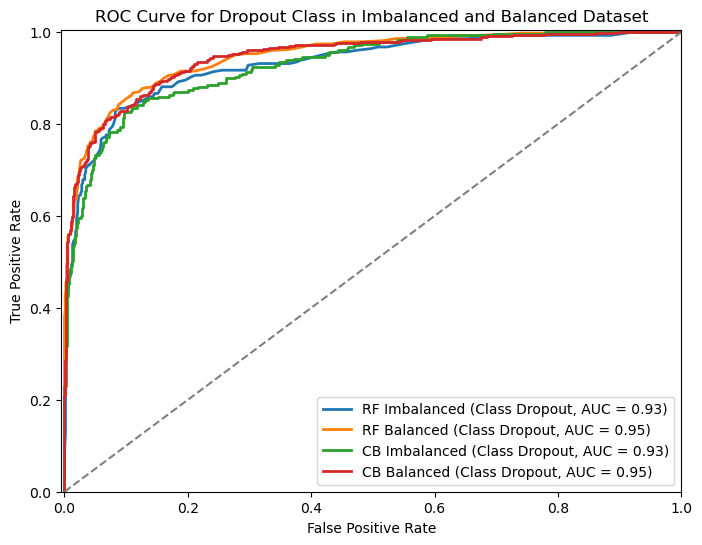

In [204]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Create a Random Forest model
randFor = RandomForestClassifier(random_state=123, **best_params)
randForB = RandomForestClassifier(random_state=123, **best_params)
catBoo = CatBoostClassifier(random_state=123)
catBooB = CatBoostClassifier(random_state=123)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
XBal_train, XBal_test, yBal_train, yBal_test = train_test_split(XBal, yBal, test_size=0.2, random_state=123)

# Train the model
randFor.fit(X_train, y_train)
randForB.fit(XBal_train, yBal_train)
catBoo.fit(X_train, y_train)
catBooB.fit(XBal_train, yBal_train)

# Get predicted probabilities for the positive class ("Dropout")
y_probs_dropoutRand = randFor.predict_proba(X_test)[:, 0]  # Assuming "Dropout" is now encoded as 0
y_probs_dropoutRandB = randForB.predict_proba(XBal_test)[:, 0]  # Assuming "Dropout" is now encoded as 0
y_probs_dropoutCat = catBoo.predict_proba(X_test)[:, 0]  # Assuming "Dropout" is now encoded as 0
y_probs_dropoutCatB = catBooB.predict_proba(XBal_test)[:, 0]  # Assuming "Dropout" is now encoded as 0

# Compute ROC curve and AUC for the positive class ("Dropout")
fprR, tprR, _ = roc_curve(y_test == 0, y_probs_dropoutRand)
fprRB, tprRB, _ = roc_curve(yBal_test == 0, y_probs_dropoutRandB)
fprC, tprC, _ = roc_curve(y_test == 0, y_probs_dropoutCat)
fprCB, tprCB, _ = roc_curve(yBal_test == 0, y_probs_dropoutCatB)


roc_aucR = auc(fprR, tprR)
roc_aucRB = auc(fprRB, tprRB)
roc_aucC = auc(fprC, tprC)
roc_aucCB = auc(fprCB, tprCB)


# Plot ROC curve for the positive class ("Dropout")
plt.figure(figsize=(8, 6))
plt.plot(fprR, tprR, lw=2, label=f'RF Imbalanced (Class Dropout, AUC = {roc_aucR:.2f})')
plt.plot(fprRB, tprRB, lw=2, label=f'RF Balanced (Class Dropout, AUC = {roc_aucRB:.2f})')
plt.plot(fprC, tprC, lw=2, label=f'CB Imbalanced (Class Dropout, AUC = {roc_aucC:.2f})')
plt.plot(fprCB, tprCB, lw=2, label=f'CB Balanced (Class Dropout, AUC = {roc_aucCB:.2f})')

#plt.plot(fprC, tprC, lw=2, label=f'CB ROC curve (Class Dropout, AUC = {roc_aucR:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([-0.005, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Dropout Class in Imbalanced and Balanced Dataset')
plt.legend(loc='lower right')
plt.show()

In [170]:
XLogOHE

NameError: name 'XLogOHE' is not defined

______________________________________________________________________________________________
2.3 Logistic Regression (dont use)

In [127]:
XLog = X.copy()
yLog = y.copy()
yLog = yLog.replace(2,1)

XBalLog = XBal.copy()
yBalLog = yBal.copy()
yBalLog = yBalLog.replace(2,1)

In [128]:
XLogCat = XLog[catVar[:-1]]
XBalLogCat = XBalLog[catVar[:-1]]

In [129]:
dummyVar = unique_value_columns = [col for col in XLogCat.columns if len(XLogCat[col].unique()) > 2]
XLogCatDummy = XLogCat[dummyVar]
XBalLogCatDummy = XBalLog[dummyVar]

In [130]:
XLogCatOH = pd.get_dummies(XLogCatDummy,columns=dummyVar)
XBalLogCatOH = pd.get_dummies(XBalLogCatDummy,columns=dummyVar)

In [131]:
XLogOHE = pd.concat([XLog.drop(columns=dummyVar), XLogCatOH],axis=1)
XBalLogOHE = pd.concat([XBalLog.drop(columns=dummyVar), XBalLogCatOH],axis=1)

In [132]:
print(XLogOHE.shape, yLog.shape)
print(XBalLogOHE.shape, yBalLog.shape)

(4424, 122) (4424,)
(6627, 122) (6627,)


In [133]:
XBalLogOHE_train, XBalLogOHE_test, yBalLog_train, yBalLog_test = train_test_split(XBalLogOHE, yBalLog, test_size=0.2, random_state=123)
XLogOHE_train, XLogOHE_test, yLog_train, yLog_test = train_test_split(XLogOHE, yLog, test_size=0.2, random_state=123)


In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_reg = LogisticRegression(solver='liblinear',random_state=123)

# Define hyperparameters to search over
param_grid = {
    'penalty': ['l1'],  # Regularization type
    'C': [3,4,5,7],  # Inverse of regularization strength
    'max_iter': [2000],  # Maximum number of iterations
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to your data
grid_search.fit(XBalLogOHE_train, yBalLog_train)  # Use your training data here

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on your test data
y_pred = best_model.predict(XBalLogOHE_test)  # Use your test data here
accuracy = accuracy_score(yBalLog_test, y_pred)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'C': 5, 'max_iter': 2000, 'penalty': 'l1'}
Test Accuracy: 0.8491704374057315


In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_reg = LogisticRegression(solver='lbfgs',random_state=123)

# Define hyperparameters to search over
param_grid = {
    'penalty': ['l2'],  # Regularization type
    'C': [0.3,0.35,0.4,0.5],  # Inverse of regularization strength
    'max_iter': [2000],  # Maximum number of iterations
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to your data
grid_search.fit(XBalLogOHE_train, yBalLog_train)  # Use your training data here

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on your test data
y_pred = best_model.predict(XBalLogOHE_test)  # Use your test data here
accuracy = accuracy_score(yBalLog_test, y_pred)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.3, 'max_iter': 2000, 'penalty': 'l2'}
Test Accuracy: 0.8559577677224736


In [136]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression model on unbalanced Data
LogRes = LogisticRegression(random_state=123, **best_params)

# Define the number of folds
num_folds = 5  # You can adjust this value as needed

# Create a StratifiedKFold object for k-fold cross-validation
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Initialize empty lists to store confusion matrices and accuracies for each fold
confusion_matrices = []
accuracies = []

# Perform k-fold cross-validation and compute confusion matrices and accuracies
for train_index, test_index in kfold.split(XLogOHE, yLog):
    X_train, X_test = XLogOHE.iloc[train_index], XLogOHE.iloc[test_index]
    y_train, y_test = yLog.iloc[train_index], yLog.iloc[test_index]
    
    # Train the model using the training data
    LogRes.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = LogRes.predict(X_test)
    
    # Calculate confusion matrix and append to the list
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print confusion matrix and accuracy for each fold
for fold_num, (conf_matrix, accuracy) in enumerate(zip(confusion_matrices, accuracies), start=1):
    print(f'Fold {fold_num}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Accuracy: {accuracy:.2f}\n')


# Calculate and print the mean and standard deviation of accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation Accuracy: {std_accuracy:.4f}')

sensitivity_dropout = []
sensitivity_graduate = []
precision_dropout = []
precision_graduate = []

for i in range(len(confusion_matrices)):
    sensitivity_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i][0]))
    sensitivity_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i][1]))
    precision_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i].T[0]))
    precision_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i].T[1]))

print(f'Mean sensitivity (Dropout): {np.mean(sensitivity_dropout):.4f}')
print(f'Mean sensitivity (Graduate): {np.mean(sensitivity_graduate):.4f}')
print(f'Mean precision (Dropout): {np.mean(precision_dropuout):.4f}')
print(f'Mean precision (Graduate): {np.mean(precision_graduate):.4f}')


Fold 1
Confusion Matrix:
[[200  85]
 [ 32 568]]
Accuracy: 0.87

Fold 2
Confusion Matrix:
[[216  68]
 [ 21 580]]
Accuracy: 0.90

Fold 3
Confusion Matrix:
[[202  82]
 [ 33 568]]
Accuracy: 0.87

Fold 4
Confusion Matrix:
[[211  73]
 [ 39 562]]
Accuracy: 0.87

Fold 5
Confusion Matrix:
[[216  68]
 [ 45 555]]
Accuracy: 0.87

Mean Accuracy: 0.8766
Standard Deviation Accuracy: 0.0116
Mean sensitivity (Dropout): 0.7354
Mean sensitivity (Graduate): 0.9434


In [137]:
# Create a Logistic regression model on balanced Data
LogRes = LogisticRegression(random_state=123, **best_params)

# Define the number of folds
num_folds = 5  # You can adjust this value as needed

# Create a StratifiedKFold object for k-fold cross-validation
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Initialize empty lists to store confusion matrices and accuracies for each fold
confusion_matrices = []
accuracies = []

# Perform k-fold cross-validation and compute confusion matrices and accuracies
for train_index, test_index in kfold.split(XBalLogOHE, yBalLog):
    X_train, X_test = XBalLogOHE.iloc[train_index], XBalLogOHE.iloc[test_index]
    y_train, y_test = yBalLog.iloc[train_index], yBalLog.iloc[test_index]
    
    # Train the model using the training data
    LogRes.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = LogRes.predict(X_test)
    
    # Calculate confusion matrix and append to the list
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print confusion matrix and accuracy for each fold
for fold_num, (conf_matrix, accuracy) in enumerate(zip(confusion_matrices, accuracies), start=1):
    print(f'Fold {fold_num}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Accuracy: {accuracy:.2f}\n')


# Calculate and print the mean and standard deviation of accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation Accuracy: {std_accuracy:.4f}')

sensitivity_dropout = []
sensitivity_graduate = []
precision_dropout = []
precision_graduate = []

for i in range(len(confusion_matrices)):
    sensitivity_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i][0]))
    sensitivity_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i][1]))
    precision_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i].T[0]))
    precision_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i].T[1]))

print(f'Mean sensitivity (Dropout): {np.mean(sensitivity_dropout):.4f}')
print(f'Mean sensitivity (Graduate): {np.mean(sensitivity_graduate):.4f}')
print(f'Mean precision (Dropout): {np.mean(precision_dropuout):.4f}')
print(f'Mean precision (Graduate): {np.mean(precision_graduate):.4f}')

Fold 1
Confusion Matrix:
[[319 123]
 [ 55 829]]
Accuracy: 0.87

Fold 2
Confusion Matrix:
[[314 128]
 [ 52 832]]
Accuracy: 0.86

Fold 3
Confusion Matrix:
[[303 139]
 [ 67 816]]
Accuracy: 0.84

Fold 4
Confusion Matrix:
[[302 140]
 [ 62 821]]
Accuracy: 0.85

Fold 5
Confusion Matrix:
[[327 114]
 [ 37 847]]
Accuracy: 0.89

Mean Accuracy: 0.8616
Standard Deviation Accuracy: 0.0149
Mean sensitivity (Dropout): 0.7085
Mean sensitivity (Graduate): 0.9382


In [138]:
from sklearn.linear_model import LogisticRegression

# Create and fit a Logistic Regression model
logistic_reg = LogisticRegression(random_state=123, **best_params)
logistic_reg.fit(XLogOHE_train, yLog_train)

# Get the coefficients (weights) assigned to each feature
coefficients = logistic_reg.coef_[0]

# Access the feature names (assuming you have stored them)
feature_names = XLogOHE_train.columns

# Create a dictionary to associate feature names with their coefficients
feature_importance = dict(zip(feature_names, coefficients))

# Sort features by absolute coefficient values (importance)
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True))

# Print feature importance
for feature, importance in sorted_feature_importance.items():
    print(f"{feature}: {importance}")


Tuition fees up to date: 2.197734520331194
Curricular units 2nd sem (approved): 1.717371044532133
Curricular units 1st sem (approved): 0.945564810072868
Course_9853: -0.9082762865898105
Curricular units 2nd sem (enrolled): -0.8757440139708784
Course_9130: -0.7062245149321732
Mother occupation_10: -0.6773145238554912
Course_9238: 0.6691377906647169
Application mode_53: 0.6204252263023199
Course_8014: 0.5654316622007922
Mother qualification_8: -0.5617991444000869
Application mode_15: 0.5607377236574801
Father occupation_5: 0.5475146206518439
Mother qualification_6: 0.5085527130807468
Father occupation_3: -0.43237101430126856
Mother occupation_7: -0.4267804547316675
Course_9003: 0.42394822587288794
Father occupation_10: -0.4064349525391889
Scholarship holder: 0.3982803316571198
Application mode_44: 0.3980780691193748
Course_9773: -0.3959414369149171
Course_9991: -0.39401668090636777
Gender: -0.3903765641817883
Course_171: 0.3857178690677884
Application mode_39: -0.35579050080947655
Father

In [171]:
numVar

['Previous qualification (grade)',
 'Admission grade',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [ ]:
XLogOHE['Curricular units 2nd sem (grade)']

In [ ]:
ndmean = df['Curricular units 2nd sem (grade)'].mean()
ndstd = df['Curricular units 2nd sem (grade)'].std()

ndmean,ndstd

In [ ]:
#increase of one standardized df['Curricular units 2nd sem (grade)'] constribute to 0.24611129724808092 odd-lod
#one standardized df['Curricular units 2nd sem (grade)'] = 15.441013677377772
( 0.659562 * ndstd) + ndmean

In [172]:
df['Curricular units 2nd sem (grade)']

0        0.000000
1       13.666667
2        0.000000
3       12.400000
4       13.000000
          ...    
4419    12.666667
4420    11.000000
4421    13.500000
4422    12.000000
4423    13.000000
Name: Curricular units 2nd sem (grade), Length: 4424, dtype: float64

________________________________________________________________________________________________

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


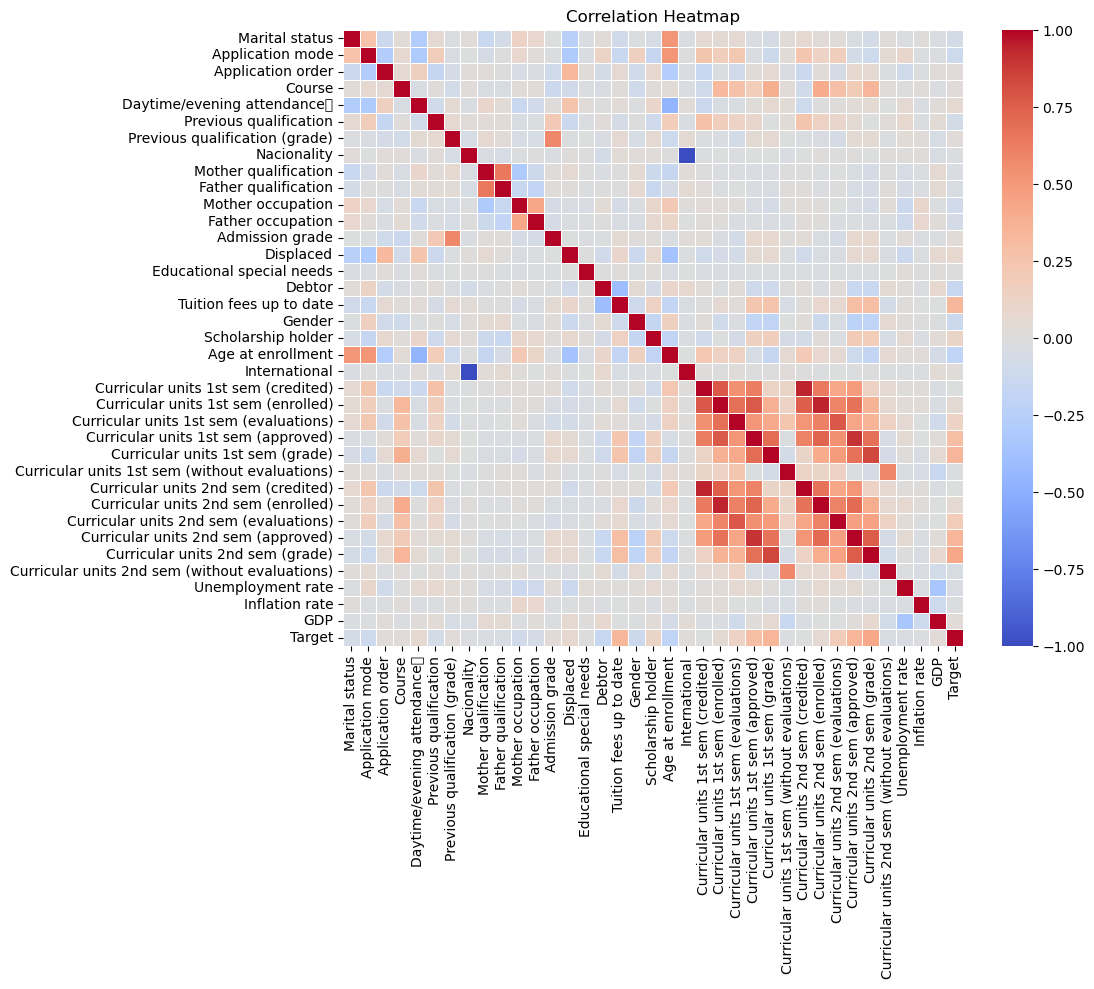

In [209]:
corrMatrix = dfFinal.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corrMatrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


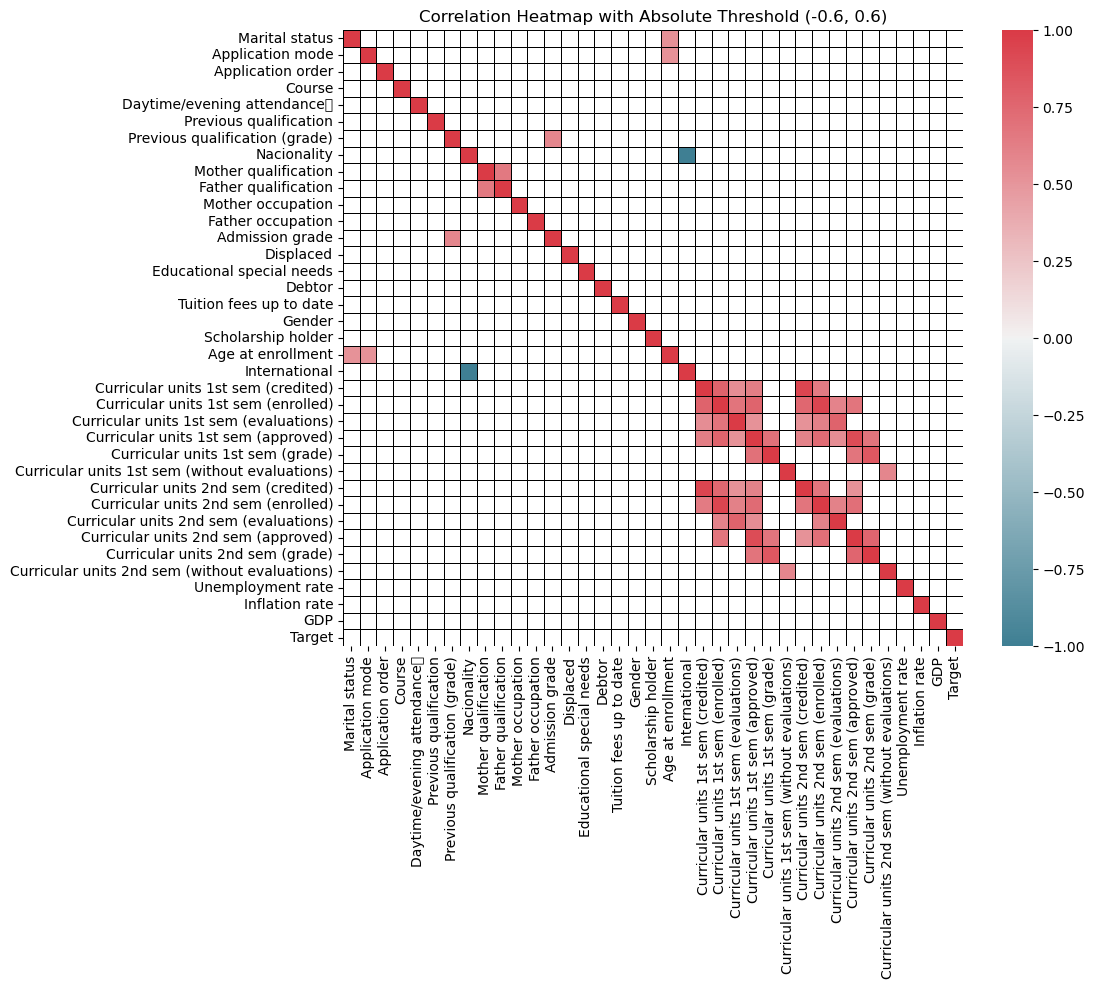

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation heatmap
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix
correlation_matrix = dfFinal.corr()

# Create a mask for values below the absolute threshold (0.6 in this case)
mask = (abs(correlation_matrix) <= 0.5) & (correlation_matrix != 0.5) & (correlation_matrix != -0.5)

# Define a custom color palette to highlight values above the threshold
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the correlation heatmap with the mask and custom color palette
sns.heatmap(correlation_matrix, annot=False, cmap=cmap, linewidths=0.5, linecolor='black', mask=mask)
plt.title('Correlation Heatmap with Absolute Threshold (-0.5, 0.5)')
plt.show()




In [39]:
dfFinal.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality', 'Mother qualification',
       'Father qualification', 'Mother occupation', 'Father occupation',
       'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',


In [123]:
varRemove = ['Educational special needs',
 'Nacionality',
 'International',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Marital status',
 'Curricular units 2nd sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 1st sem (credited)',
 'Debtor','Application mode',
 'Previous qualification (grade)']

In [124]:
dfSelection = dfFinal.copy()
dfSelection = dfSelection.drop(varRemove, axis=1)

In [164]:
catVarSel = [i for i in catVar[:-1] if i not in varRemove]

In [165]:
#SMOTENC for balancing dataset
from imblearn.over_sampling import SMOTENC

categorical_feature_indices = [dfSelection.columns.get_loc(col) for col in dfSelection[catVarSel].columns][:-1]
categorical_feature_indices

smote_nc = SMOTENC(sampling_strategy='auto', categorical_features=categorical_feature_indices, random_state=123)

XSelBal, ySelBal = smote_nc.fit_resample(XSel, ySel)
print(f'Class distribution after SMOTE: {Counter(ySelBal)}')

Class distribution after SMOTE: Counter({0: 2209, 1: 2209, 2: 2209})


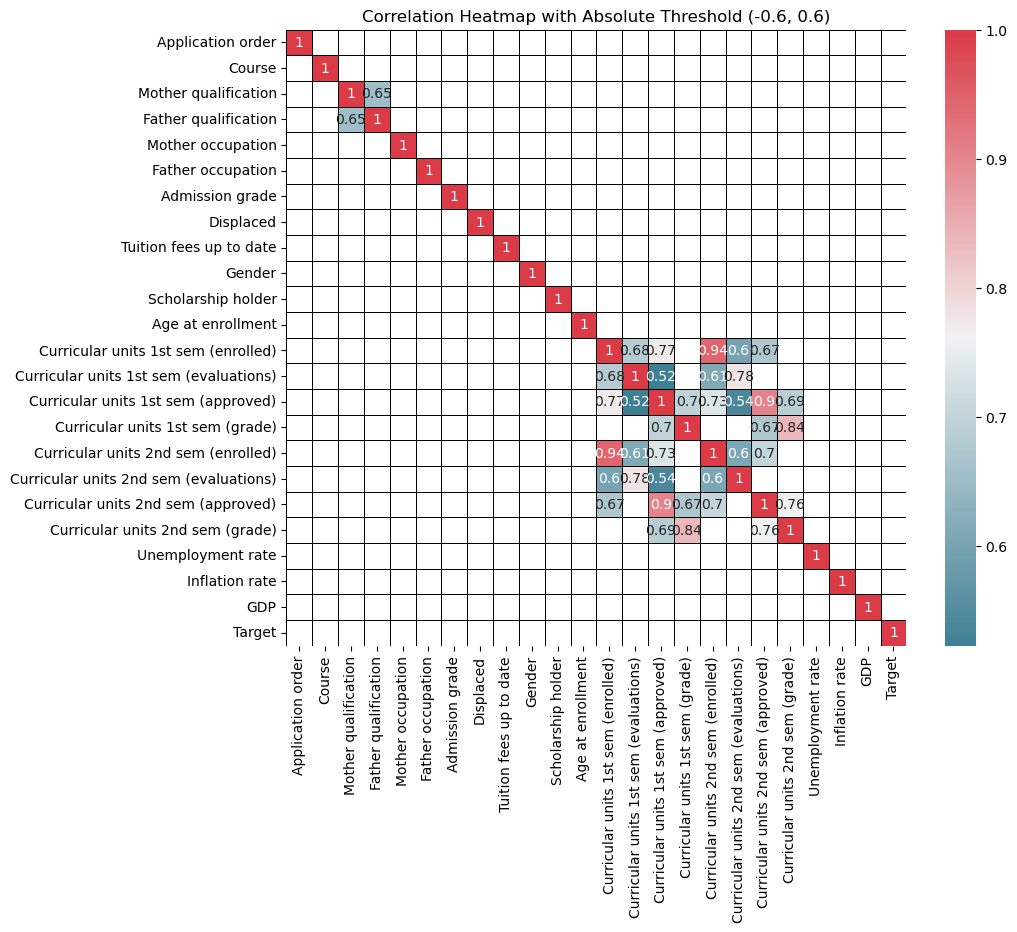

In [125]:
corrMatrixSel = dfSelection.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation heatmap
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix
correlation_matrix = dfSelection.corr()

# Create a mask for values below the absolute threshold (0.6 in this case)
mask = (abs(correlation_matrix) <= 0.5) & (correlation_matrix != 0.5) & (correlation_matrix != -0.5)

# Define a custom color palette to highlight values above the threshold
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the correlation heatmap with the mask and custom color palette
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, linewidths=0.5, linecolor='black', mask=mask)
plt.title('Correlation Heatmap with Absolute Threshold (-0.6, 0.6)')
plt.show()




In [126]:
XSel = dfSelection.drop(['Target'], axis=1)
ySel = dfSelection['Target']

In [127]:
XSel_train, XSel_test, ySel_train, ySel_test = train_test_split(XSel, ySel, test_size=0.2, random_state=123)

In [131]:
# Create a Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
randFor = RandomForestClassifier(random_state=123)

# Define hyperparameters to search over
param_grid = {
    'n_estimators': [160,170,180],
    'max_depth': [20,30,40],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [1,2,3]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=randFor, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to your data
grid_search.fit(XSel_train, ySel_train)  # Use your training data here

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on your test data
ySel_pred = best_model.predict(XSel_test)  # Use your test data here
accuracy = accuracy_score(ySel_test, ySel_pred)
print("Test Accuracy:", accuracy)


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\ASUS\anaconda3\lib\site-packages\joblib\parallel.py", line 1855, in __call__
    return output if self.return_generator else list(output)
  File "C:\Users\ASUS\anaconda3\lib

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 170}
Test Accuracy: 0.7954802259887006


In [138]:
# Create a Random Forest model on unbalanced Data
randFor = RandomForestClassifier(random_state=123, **best_params)

# Define the number of folds
num_folds = 5  # You can adjust this value as needed

# Create a StratifiedKFold object for k-fold cross-validation
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Initialize empty lists to store confusion matrices and accuracies for each fold
confusion_matrices = []
accuracies = []

# Perform k-fold cross-validation and compute confusion matrices and accuracies
for train_index, test_index in kfold.split(XSel, ySel):
    X_train, X_test = XSel.iloc[train_index], XSel.iloc[test_index]
    y_train, y_test = ySel.iloc[train_index], ySel.iloc[test_index]
    
    # Train the model using the training data
    randFor.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = randFor.predict(X_test)
    
    # Calculate confusion matrix and append to the list
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print confusion matrix and accuracy for each fold
for fold_num, (conf_matrix, accuracy) in enumerate(zip(confusion_matrices, accuracies), start=1):
    print(f'Fold {fold_num}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Accuracy: {accuracy:.2f}\n')


# Calculate and print the mean and standard deviation of accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation Accuracy: {std_accuracy:.4f}')

sensitivity_dropout = []
sensitivity_graduate = []
precision_dropout = []
precision_graduate = []

for i in range(len(confusion_matrices)):
    sensitivity_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i][0]))
    sensitivity_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i][1]))
    precision_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i].T[0]))
    precision_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i].T[1]))

print(f'Mean sensitivity (Dropout): {np.mean(sensitivity_dropout):.4f}')
print(f'Mean sensitivity (Graduate): {np.mean(sensitivity_graduate):.4f}')
print(f'Mean precision (Dropout): {np.mean(precision_dropout):.4f}')
print(f'Mean precision (Graduate): {np.mean(precision_graduate):.4f}')


[1 0 0 1 1 1 2 0 1 0 1 2 1 1 0 1 2 1 2 0 1 0 0 1 0 1 0 1 2 0 1 1 1 2 1 1 1
 1 1 2 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 2 1 0 1 0 0 1 1 0 1 0 2 1 0 0 1 1 1
 1 2 1 1 1 0 0 0 0 0 1 0 2 2 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 2 1 1 2 1 2 1 0
 0 1 1 1 0 2 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 2 1 1 1 0 2 0 2 2 1 1
 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 2 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 2 1 1 1 0 1 0 1 1 0 1 1
 1 0 1 0 0 1 2 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 2 2 0 1 1 1 0 1 0 0
 1 1 1 1 1 0 0 0 0 0 1 1 0 2 2 2 2 1 0 0 1 2 0 1 1 1 0 1 2 1 2 1 0 2 2 2 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 2 1 1 2 1 1 1 1 0 1 1 1 1 0 1 1 1 1 2 2 1 2 1 0
 1 1 1 2 1 1 1 1 1 0 1 1 0 0 1 2 0 2 0 1 1 0 0 1 2 1 2 0 1 2 1 1 1 0 2 1 1
 1 1 0 0 0 1 0 1 0 0 0 1 2 1 1 1 1 1 1 1 1 0 0 2 0 1 1 2 1 1 1 1 1 1 1 2 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1 0 2 1 0 1 1 0 0 1 0 0 2 0 1 0
 1 2 0 1 1 1 0 0 2 1 1 0 1 0 0 1 1 1 2 0 0 0 0 0 1 2 1 0 0 0 0 1 1 0 2 1 1
 1 0 1 1 0 0 2 1 1 1 0 1 

In [166]:
randFor = RandomForestClassifier(random_state=123, **best_params)

# Define the number of folds
num_folds = 5  # You can adjust this value as needed

# Create a StratifiedKFold object for k-fold cross-validation
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Initialize empty lists to store confusion matrices and accuracies for each fold
confusion_matrices = []
accuracies = []

# Perform k-fold cross-validation and compute confusion matrices and accuracies
for train_index, test_index in kfold.split(XSelBal, ySelBal):
    X_train, X_test = XSelBal.iloc[train_index], XSelBal.iloc[test_index]
    y_train, y_test = ySelBal.iloc[train_index], ySelBal.iloc[test_index]
    
    # Train the model using the training data
    randFor.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = randFor.predict(X_test)
    
    # Calculate confusion matrix and append to the list
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print confusion matrix and accuracy for each fold
for fold_num, (conf_matrix, accuracy) in enumerate(zip(confusion_matrices, accuracies), start=1):
    print(f'Fold {fold_num}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Accuracy: {accuracy:.2f}\n')


# Calculate and print the mean and standard deviation of accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation Accuracy: {std_accuracy:.4f}')

sensitivity_dropout = []
sensitivity_graduate = []
precision_dropout = []
precision_graduate = []

for i in range(len(confusion_matrices)):
    sensitivity_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i][0]))
    sensitivity_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i][1]))
    precision_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i].T[0]))
    precision_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i].T[1]))

print(f'Mean sensitivity (Dropout): {np.mean(sensitivity_dropout):.4f}')
print(f'Mean sensitivity (Graduate): {np.mean(sensitivity_graduate):.4f}')
print(f'Mean precision (Dropout): {np.mean(precision_dropout):.4f}')
print(f'Mean precision (Graduate): {np.mean(precision_graduate):.4f}')


Fold 1
Confusion Matrix:
[[351  40  51]
 [ 16 388  38]
 [ 20  42 380]]
Accuracy: 0.84

Fold 2
Confusion Matrix:
[[347  38  57]
 [ 13 397  32]
 [ 28  49 365]]
Accuracy: 0.84

Fold 3
Confusion Matrix:
[[338  40  64]
 [ 15 389  38]
 [ 33  43 365]]
Accuracy: 0.82

Fold 4
Confusion Matrix:
[[350  36  56]
 [ 12 384  45]
 [ 34  50 358]]
Accuracy: 0.82

Fold 5
Confusion Matrix:
[[358  45  38]
 [ 15 391  36]
 [ 29  37 376]]
Accuracy: 0.85

Mean Accuracy: 0.8355
Standard Deviation Accuracy: 0.0101
Mean sensitivity (Dropout): 0.7895
Mean sensitivity (Graduate): 0.8823
Mean precision (Dropout): 0.8903
Mean precision (Graduate): 0.8227


In [168]:
XSelBal_train, XSelBal_test, ySelBal_train, ySelBal_test = train_test_split(XSelBal, ySelBal, test_size=0.2, random_state=123)

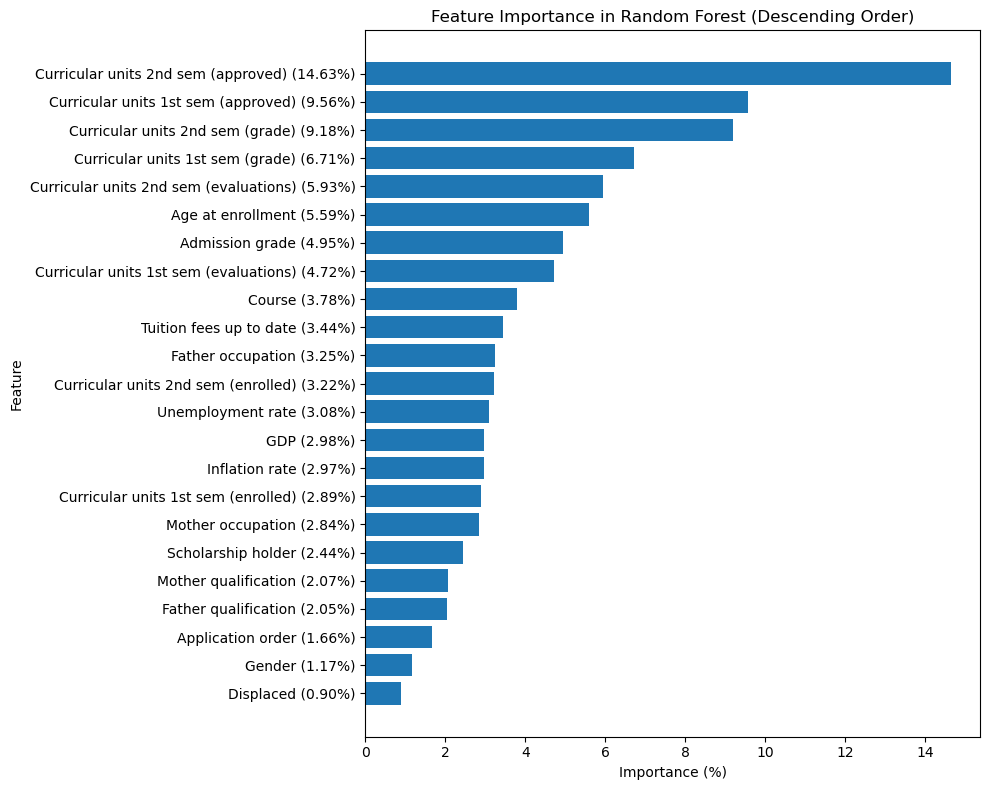

In [169]:
# Create a Random Forest model
randFor = RandomForestClassifier(random_state=123, **best_params)

# Fit the model to your data
randFor.fit(XSelBal_train, ySelBal_train)  # Use your training data here

# Get feature importances
feature_importances = randFor.feature_importances_

# Get the corresponding feature names
feature_names = XSelBal_train.columns  # Use the column names from your feature matrix

# Calculate the total sum of feature importances
total_importance = np.sum(feature_importances)

# Calculate the percentage of importance for each feature
percentage_importances = (feature_importances / total_importance) * 100

# Create a sorted list of feature importance scores and their corresponding names in ascending order
sorted_indices = np.argsort(percentage_importances)
sorted_percentages = percentage_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances as a horizontal bar chart (ascending order) with percentages
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_percentages)), sorted_percentages)
plt.yticks(range(len(sorted_percentages)), [f'{name} ({percentage:.2f}%)' for name, percentage in zip(sorted_feature_names, sorted_percentages)])
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest (Descending Order)')
plt.tight_layout()
plt.show()

In [ ]:
sensitivity_dropout = []
sensitivity_graduate = []
for i in range(len(confusion_matrices)):
    sensitivity_dropout.append(confusion_matrices[i][0][0]/sum(confusion_matrices[i][0]))
    sensitivity_graduate.append(confusion_matrices[i][1][1]/sum(confusion_matrices[i][1]))

In [ ]:
sensitivity_dropout

In [ ]:
sensitivity_graduate

In [ ]:
confusion_matrices[0][1][1]/sum(confusion_matrices[0][1])

In [ ]:
sum(confusion_matrices[0][1])

In [ ]:
sum(confusion_matrices[2][0])

In [ ]:
'''
{'Dropout': 0, 'Graduate': 1,'Enrolled': 2}
dfFinal.Target.value_counts()

#from unbalanced
[[209  56  20]
 [ 22 399  20]
 [ 45  69  45]]

sensitivity = TP / TP + FN
sensitivity dropout = 209 / 209 + 56 + 20 = 0.7333
sensitivity graduate = 399 / (22 + 399 + 20) = 0.905

#from balanced
[356  36  50]
 [ 14 388  40]
 [ 27  51 364]]
sensitivity dropout balance = 356 / 356 + 36 + 50 = 0.805 (better at classify dropout in balance dataset)
sensitivity graduate balance = 388 / (14 + 388 + 40) = 0.878
'''

In [ ]:
len(dc.dictOcu)

In [ ]:
for i in numVar:
    print(i)
    print(dfMapped[i].min(),dfMapped[i].max())
    print("")